# Bushcraft vs Witchcraft
## Problem Statement

 RitualCravt, a Metaphysical & Witchy Wares business has seen a decline in their online sales. 
   
   After investigating, they have discovered that their online ads have been targeted towards Bushcraft enthusiasts instead of Witchcraft devotees.
   
   I have been hired to create a model that will ensure their Reddit ads will be directed towards the correct user base. 
   
   I will accomplish this by collecting and differentiating posts from the subreddit’s Spells and Survival.

In [1]:
import pandas as pd  
import nltk
import string
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re
import numpy as np
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 3000
pd.options.display.max_colwidth = 400

#### Loading Data

In [2]:
df = pd.read_csv('data/all_subreddits.csv')

## Pre-Processing

In [3]:
#df['body']

#### Remove null values

In [4]:
import missingno as msno

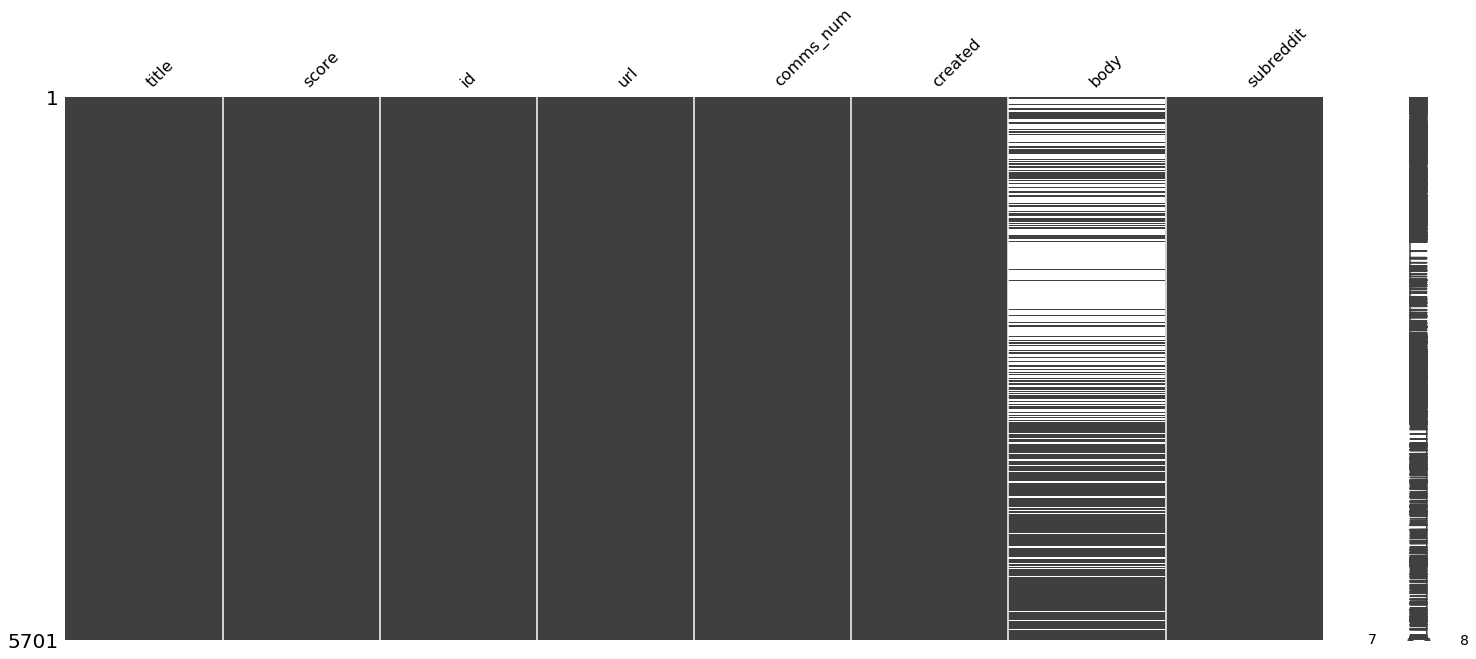

In [5]:
msno.matrix(df);

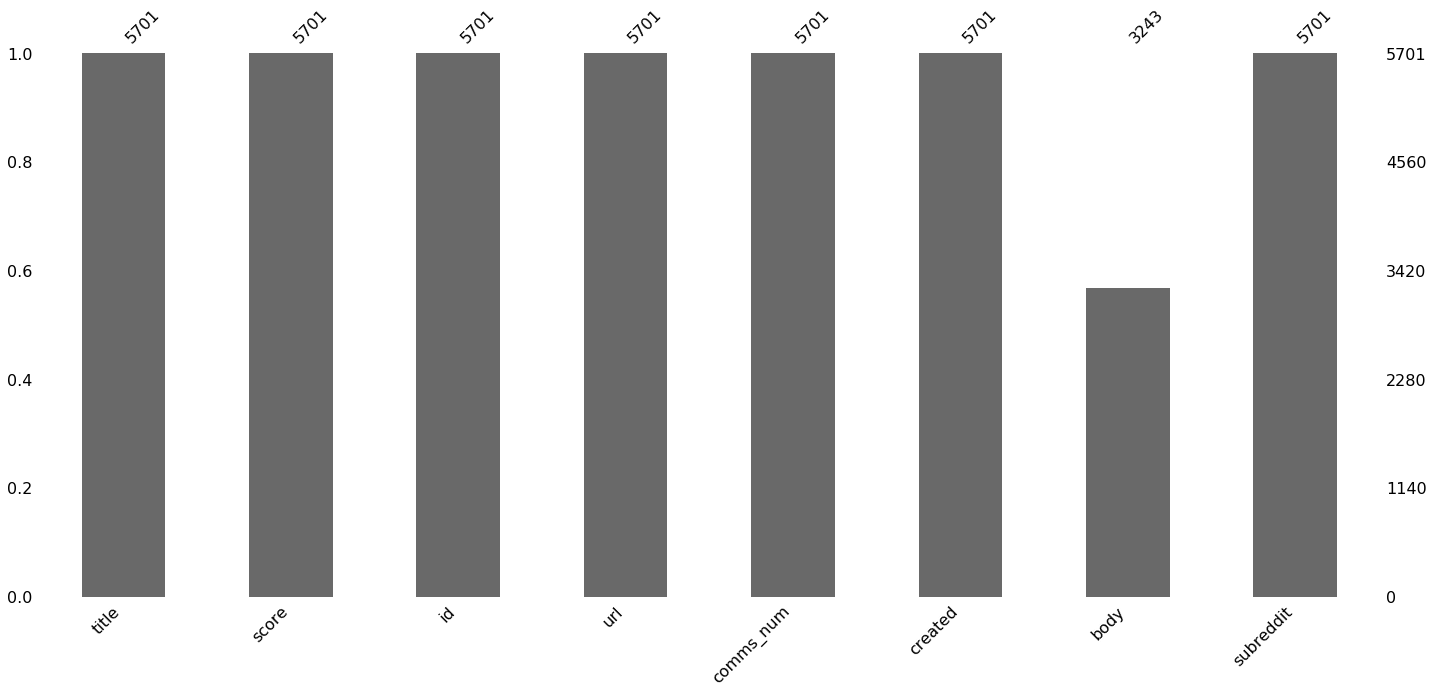

In [6]:
msno.bar(df);

#### Combining title and body columns

In [7]:
df['body'].isnull().sum()

2458

In [8]:
df.replace({'body': np.nan}, {'body': '.'}, inplace = True)

In [9]:
df['body'].isnull().sum()

0

In [10]:
df['title_body'] = df[['title', 'body']].astype(str).agg('-'.join, axis=1)

#### Deleting columns that arent needed

In [11]:
df.drop(columns=['score', 'url', 'comms_num'], inplace=True)

#### Remove special characters

In [12]:
def remove_punctuation(text):
    lower = text.lower()  
    exclude = string.punctuation  
    return "".join(ch for ch in lower if ch not in exclude)

#Code inspiration from:
#Exploratory Data Analysis on a Natural Language Processing Task starter code

#### Remove special characters on title_body

In [13]:
df['title_body_no_punc'] = df['title_body'].astype(str)

In [14]:
df['title_body_no_punc'] = df['title_body_no_punc'].apply(remove_punctuation)

In [15]:
df['title_body_no_punc'] = df['title_body_no_punc'].replace('\nhttp\S+', '', regex=True).replace('http\S+', '', regex=True).replace('www\S+', '', regex=True).replace('\n\n\S+', '', regex=True).replace('\n\S+', '', regex=True).replace('#\S+','', regex = True).replace('@\S+', '', regex=True)

#Code inspiration from: 
#NLP_Tweets_sols

In [16]:
df['title_body_no_punc'] = df['title_body_no_punc'].str.replace('[^\w\s]','')

#### Cleaning body

In [17]:
#df['body'] = df['body'].astype(str)
#df['body'] = df['body'].apply(remove_punctuation)
#df['body'] = df['body'].replace('\nhttp\S+', '', regex=True).replace('http\S+', '', regex=True).replace('www\S+', '', regex=True).replace('\n\n\S+', '', regex=True).replace('\n\S+', '', regex=True).replace('#\S+','', regex = True).replace('@\S+', '', regex=True)
#df['body'] = df['body'].str.replace('[^\w\s]','')
##df['body'] = df.apply(lambda row: nltk.word_tokenize(row['cbody']), axis=1)

#### Cleaning title

In [22]:
#df['title'] = df['title'].astype(str)
#df['title'] = df['title'].apply(remove_punctuation)
#df['title'] = df['title'].replace('\nhttp\S+', '', regex=True).replace('http\S+', '', regex=True).replace('www\S+', '', regex=True).replace('\n\n\S+', '', regex=True).replace('\n\S+', '', regex=True).replace('#\S+','', regex = True).replace('@\S+', '', regex=True)
#df['title'] = df['title'].str.replace('[^\w\s]','')
#df['title'] = df.apply(lambda row: nltk.word_tokenize(row['ctitle']), axis=1)

#### Tokenizing

In [27]:
df['title_body_no_punc'] = df.apply(lambda row: nltk.word_tokenize(row['title_body_no_punc']), axis=1)

#Code inspiration from:
##https://stackoverflow.com/questions/33098040/how-to-use-word-tokenize-in-data-frame

#### Stop word removal

In [28]:
stop = stopwords.words("english") 

new_words=('hello', 'hi', 'hey', 'ill', 'im', 'id', 'ive', 'u'
          'someone', 'yet', 'empty', 'becoming', 'quite', 'unless', 
           'she', 'ever', 'that', "'ll", 'seeming', 'below', 'really', 
           'our', 'if', 'has', 'each', 'any', 'two', 'many', 'may', 'he',
           'becomes', 'him', 'anyhow', 'after', 'whereafter', 'every', 
           'amount', 'whose', 'whatever', 'before', 'third', 'ours', 
           'eleven', 'four', 'six', 'not', 'hereafter', 'where', 'only',
           'in', 'take', 'get', 'here', 'because', 'became', 'hereby', 
           'others', 'of', 'also', 'is', 'sometimes', 'been', 'everyone',
           'anyway', 'to', 'forty', 'did', 'something', 'various', 
           'yourselves', 'used', 'by', 'i', 'whereby', 'latterly', 
           'other', 'neither', 'just', 'make', 'her', 'nobody', 'nine', 
           'even', 'go', 'will', 'and', 'was', 'say', 'ourselves', 
           'towards', 'you', 'namely', 'else', 'herein', 'whom', 'their',
           'across', 'full', 'front', 'beside', 'a', 'against', 
           'regarding', 'yourself', 'within', 'can', 'fifty', 'whence',
           'otherwise', 'due', 'around', 'itself', 'some', 'noone', 
           'seems', 're', 'well', 'themselves', 'mine', 'until', 'next', 
           'does', 'call', 'further', 'none', 'into', 'see', 'when', 
           'beyond', "'re", 'among', 'however', 'doing', 'thus', 'hers',
           'nowhere', 'so', 'most', 'alone', 'your', 'being', 'indeed',
           'me', 'please', 'part', 'moreover', 'how', 'they', 'his', 
           'never', 'twenty', 'might', 'either', 'give', 'its', 'always',
           'become', 'first', 'enough', 'would', 'whether', 'perhaps', 
           'though', 'himself', 'latter', 'for', 'ten', 'whenever', "n't",
           'besides', 'we', 'why', 'amongst', 'yours', 'eight', 'already',
           'nevertheless', 'while', 'under', 'sixty', 'everywhere', 
           'move', 'as', 'throughout', 'too', 'except', 'am', 'mostly',
           'afterwards', 'at', 'thereafter', 'without', 'anywhere', 
           'elsewhere', 'or', "'s", 'whereas', 'much', "'d", 'were', 
           'do', 'several', 'put', 'the', 'hundred', 'those', 'which',
           'whither', 'about', 'wherein', 'three', 'off', 'side', 'thru', 
           'almost', 'with', 'this', 'via', 'but', 'per', 'once', 
           'anyone', 'seemed', 'nothing', 'behind', "'ve", 'since', 
           'who', 'these', 'than', 'thereby', 'along', 'together',
           'everything', 'through', 'wherever', 'anything', 'from', 
           'up', 'thereupon', "'m", 'myself', 'us', 'upon', 'again', 
           'rather', 'very', 'ca', 'keep', 'cannot', 'down', 'hereupon',
           'then', 'therefore', 'whoever', 'have', 'name', 'whereupon', 
           'seem', 'few', 'somehow', 'onto', 'done', 'now', 'no', 'show',
           'top', 'could', 'one', 'nor', 'back', 'less', 'made', 'somewhere',
           'beforehand', 'all', 'be', 'must', 'twelve', 'an', 'still', 
           'another', 'serious', 'same', 'sometime', 'there', 'what', 
           'therein', 'on', 'five', 'both', 'such', 'meanwhile', 'my', 
           'it', 'last', 'although', 'hence', 'toward', 'herself', 
           'during', 'had', 'between', 'own', 'thence', 'often', 
           'formerly', 'whole', 'are', 'fifteen', 'former', 'above',
           'over', 'them', 'using', 'least', 'more', 'out', 'bottom', 'should', '2', 'andor')

for i in new_words:
    stop.append(i)


#Code inspiration from:
#https://medium.com/@tusharsri/remove-add-stop-words-7e2994c19c67

In [29]:
def stopw(words):
    
    stop_words = [item for item in words if item not in stop]
    
    return stop_words

df['title_body_stop']= df['title_body_no_punc'].apply(stopw)

#df['cbodyST']= df['cbody'].apply(stopw)
#df['ctitleST']= df['ctitle'].apply(stopw)

#### Lemmatizing/Stemming

In [30]:
lemmatizer = WordNetLemmatizer()

def lemmatization(words):

    lem_words = [lemmatizer.lemmatize(x) for x in words]

    return lem_words

df['title_body_lem']= df['title_body_stop'].apply(lemmatization)

#df['lembody']= df['cbodyST'].apply(lemmatization)
#df['lemtitle']= df['ctitleST'].apply(lemmatization)

In [31]:
# p_stemmer = PorterStemmer()

# def stemming(words):

#     stem_words = [p_stemmer.stem(x) for x in words]

#     return stem_words

# df['title_body_stem']= df['title_body_stop'].map(stemming)
# df['stembody']= df['cbodyST'].map(stemming)
# df['stemtitle']= df['ctitleST'].map(stemming)

In [32]:
#df[['title_body_stop', 'title_body_lem', 'title_body_stem']]

#Stembody is too crude. Will not use

In [33]:
df.head(1)

title      id       created  \
0  Waterproofing matches  jeww70  1.603251e+09   

                                                                                                                                                                                                                                                                                                                                                                                                              body  \
0  I have a very small youtube channel that revolves around three topics, one of them being survival/ outdoors. I recently did a video taking about how to make matches water resistant using wax.\n\nYou have to melt the wax and submerge the match tip in it. Once you are ready to strike it, you have to peel of the wax layer.\n\nMaybe you would also enjoy the video:\n\n[https://youtu.be/M97PWBPVwxk]...   

  subreddit  \
0  survival   

                                                                                                                                                                                                                                                                                                                                                                                                        title_body  \
0  Waterproofing matches-I have a very small youtube channel that revolves around three topics, one of them being survival/ outdoors. I recently did a video taking about how to make matches water resistant using wax.\n\nYou have to melt the wax and submerge the match tip in it. Once you are ready to strike it, you have to peel of the wax layer.\n\nMaybe you would also enjoy the video:\n\n[https:/...   

                                                                                                                                                                                                                                                                                                                                                                                                title_body_no_punc  \
0  [waterproofing, matchesi, have, a, very, small, youtube, channel, that, revolves, around, three, topics, one, of, them, being, survival, outdoors, i, recently, did, a, video, taking, about, how, to, make, matches, water, resistant, using, wax, have, to, melt, the, wax, and, submerge, the, match, tip, in, it, once, you, are, ready, to, strike, it, you, have, to, peel, of, the, wax, layer, you, ...   

                                                                                                                                                                                                                     title_body_stop  \
0  [waterproofing, matchesi, small, youtube, channel, revolves, topics, survival, outdoors, recently, video, taking, matches, water, resistant, wax, melt, wax, submerge, match, tip, ready, strike, peel, wax, layer, enjoy, video]   

                                                                                                                                                                                                                   title_body_lem  
0  [waterproofing, matchesi, small, youtube, channel, revolves, topic, survival, outdoors, recently, video, taking, match, water, resistant, wax, melt, wax, submerge, match, tip, ready, strike, peel, wax, layer, enjoy, video]

In [34]:
df.drop(columns=['title_body_stop', 'title_body'], inplace=True)
df.rename(columns={'title_body_lem': 'cleaned_title_body_list', 
                   'title_body_no_punc':'title_body_no_punc_list'}, inplace=True)

#### Binary Labels

In [35]:
df['num_subreddit'] = df ['subreddit'].map({'spells':0, 'survival':1})

#### Creating Beneficial Columns

In [36]:
#string columns of full text without punctuation
#string columns of fully cleaned text

df['cleaned_title_body_str'] = df['cleaned_title_body_list'].apply(lambda x: ','.join(map(str, x)))
df['cleaned_title_body_str'] = df['cleaned_title_body_str'].str.replace(","," ")


# df['title_str'] = df['ctitle'].apply(lambda x: ','.join(map(str, x)))
# df['title_str'] = df['title_str'].str.replace(","," ")
# df['body_str'] = df['cbody'].apply(lambda x: ','.join(map(str, x)))
# df['body_str'] = df['body_str'].str.replace(","," ")

#Code inspiration from:
##https://stackoverflow.com/questions/45306988/column-of-lists-convert-list-to-string-as-a-new-column

In [37]:
#string columns of full text without punctuation

df['title_body_no_punc_str'] = df['title_body_no_punc_list'].apply(lambda x: ','.join(map(str, x)))
df['title_body_no_punc_str'] = df['title_body_no_punc_str'].str.replace(","," ")


# df['cleaned_title_str'] = df['cleaned_title'].apply(lambda x: ','.join(map(str, x)))
# df['cleaned_title_str'] = df['cleaned_title_str'].str.replace(","," ")
# df['cleaned_body_str'] = df['cleaned_body'].apply(lambda x: ','.join(map(str, x)))
# df['cleaned_body_str'] = df['cleaned_body_str'].str.replace(","," ")

In [38]:
#length of full text without punctuation

df['title_body_length'] = df['title_body_no_punc_str'].map(len)


# df['title_length'] = df['title_str'].map(len)
# df['body_length'] = df['body_str'].map(len)

In [39]:
#word count on cleaned

df['title_body_word_count'] = df['title_body_no_punc_str'].str.split().str.len()
df['title_body_clean_word_count'] = df['cleaned_title_body_str'].str.split().str.len()


# df['title_word_count'] = df['title_str'].str.split().str.len()
# df['body_word_count'] = df['body_str'].str.split().str.len()

In [40]:
#splitting df by witchcraft & bushcraft
dfwitch = df[df['num_subreddit'] == 0]
dfbush = df[df['num_subreddit'] == 1]

### Distribute bushcraft and witchcraft evenly
### Identifying and addressing outliers

In [41]:
df['subreddit'].value_counts()
#Eventhough survival has more posts, spells has more words 
# wait on sampling
# survival 3441
# spells 2260

survival    3441
spells      2260
Name: subreddit, dtype: int64

In [42]:
dfbush['title_body_clean_word_count'].sum()

81835

In [43]:
dfwitch['title_body_clean_word_count'].sum()

95993

In [44]:
dfbush['title_body_word_count'].sum()

177159

In [45]:
dfwitch['title_body_word_count'].sum()

230095

In [46]:
df['subreddit'].value_counts()

survival    3441
spells      2260
Name: subreddit, dtype: int64

In [47]:
df.shape

(5701, 13)

In [48]:
#deleting bush that has cleaned word counts 0-6

indexNames = df[(df['subreddit'] == 'survival') & (df['title_body_clean_word_count'] == 0)].index

In [49]:
df.drop(indexNames, inplace=True)

In [50]:
indexNames = df[(df['subreddit'] == 'survival') & (df['title_body_clean_word_count'] == 1)].index

In [51]:
df.drop(indexNames, inplace=True)

In [52]:
indexNames = df[(df['subreddit'] == 'survival') & (df['title_body_clean_word_count'] == 2)].index

In [53]:
df.drop(indexNames, inplace=True)

In [54]:
indexNames = df[(df['subreddit'] == 'survival') & (df['title_body_clean_word_count'] == 3)].index

In [55]:
df.drop(indexNames, inplace=True)

In [56]:
indexNames = df[(df['subreddit'] == 'survival') & (df['title_body_clean_word_count'] == 4)].index

In [57]:
df.drop(indexNames, inplace=True)

In [58]:
indexNames = df[(df['subreddit'] == 'survival') & (df['title_body_clean_word_count'] == 5)].index

In [59]:
df.drop(indexNames, inplace=True)

In [60]:
indexNames = df[(df['subreddit'] == 'survival') & (df['title_body_clean_word_count'] == 6)].index

In [61]:
len(indexNames)

228

In [62]:
df.drop(indexNames, inplace=True)

In [63]:
df['subreddit'].value_counts()

spells      2260
survival    2193
Name: subreddit, dtype: int64

In [64]:
indexNames = df[(df['subreddit'] == 'spells') & (df['title_body_clean_word_count'] == 1)].index

In [65]:
df.drop(indexNames, inplace=True)

In [66]:
indexNames = df[(df['subreddit'] == 'spells') & (df['title_body_clean_word_count'] == 2)].index

In [67]:
df.drop(indexNames, inplace=True)

In [68]:
#resaving seperate df
dfwitch = df[df['num_subreddit'] == 0]
dfbush = df[df['num_subreddit'] == 1]

In [69]:
#oversample bush ~50%
# df_b = df[df['subreddit'] == 'Survival']
# df_b = df_b.sample(223)
# df = pd.concat([df,df_b], axis = 0)

# #code inspiration from: NLP_Tweets Starter Code

In [70]:
# #undersample witch ~30%
# df_w = df[df['subreddit'] == 'Spells']      
# df_subset = df_w.sample(138)           
# df.drop(df_subset.index, inplace = True) 

#code inspiration from:
##https://stackoverflow.com/questions/39835021/pandas-random-sample-with-remove/39835133

## EDA Witches

#### Most & Least Frequent Witch Words
Code inspiration from :
https://medium.com/datadriveninvestor/unsupervised-outlier-detection-in-text-corpus-using-deep-learning-41d4284a04c8

In [71]:
df.tail(1)

title      id       created  \
5700  Easy Protection Spells for Beginners  fzqlmo  1.586697e+09   

                                                                                                                                body  \
5700  Anyone who could share PROTECTION spells for beginners like me 😅 From black magic, curses, hexes, evil and/or negative energy?   

     subreddit  \
5700    spells   

                                                                                                                                                                  title_body_no_punc_list  \
5700  [easy, protection, spells, for, beginnersanyone, who, could, share, protection, spells, for, beginners, like, me, from, black, magic, curses, hexes, evil, andor, negative, energy]   

                                                                                                                     cleaned_title_body_list  \
5700  [easy, protection, spell, beginnersanyone, share, protection, spell, beginner, like, black, magic, curse, hex, evil, negative, energy]   

      num_subreddit  \
5700              0   

                                                                                                     cleaned_title_body_str  \
5700  easy protection spell beginnersanyone share protection spell beginner like black magic curse hex evil negative energy   

                                                                                                                                           title_body_no_punc_str  \
5700  easy protection spells for beginnersanyone who could share protection spells for beginners like me from black magic curses hexes evil andor negative energy   

      title_body_length  title_body_word_count  title_body_clean_word_count  
5700                155                     23                           16

In [72]:
aggregate_counter = Counter()
for row_index,row in dfwitch.iterrows():
    c = Counter(row['cleaned_title_body_str'].split())
    aggregate_counter += c

common_words = [word[0] for word in aggregate_counter.most_common(50)]
common_words_counts = [word[1] for word in aggregate_counter.most_common(50)]

In [73]:
def barplot(words, words_counts, title, gpallet):
    
    plt.rcParams['figure.dpi'] = 360
    
    fig = plt.figure(figsize=(20,20))
    bar_plot = sns.barplot(x=words_counts, y=words, palette= gpallet) 
    
    plt.xlabel('')
    plt.title(title, size=18)
    plt.xticks(size=14)
    plt.yticks(size=14)
    sns.despine();
    plt.show()
    
#https://seaborn.pydata.org/tutorial/color_palettes.html#qualitative-color-palettes

In [74]:
df['subreddit'].value_counts()

spells      2220
survival    2193
Name: subreddit, dtype: int64

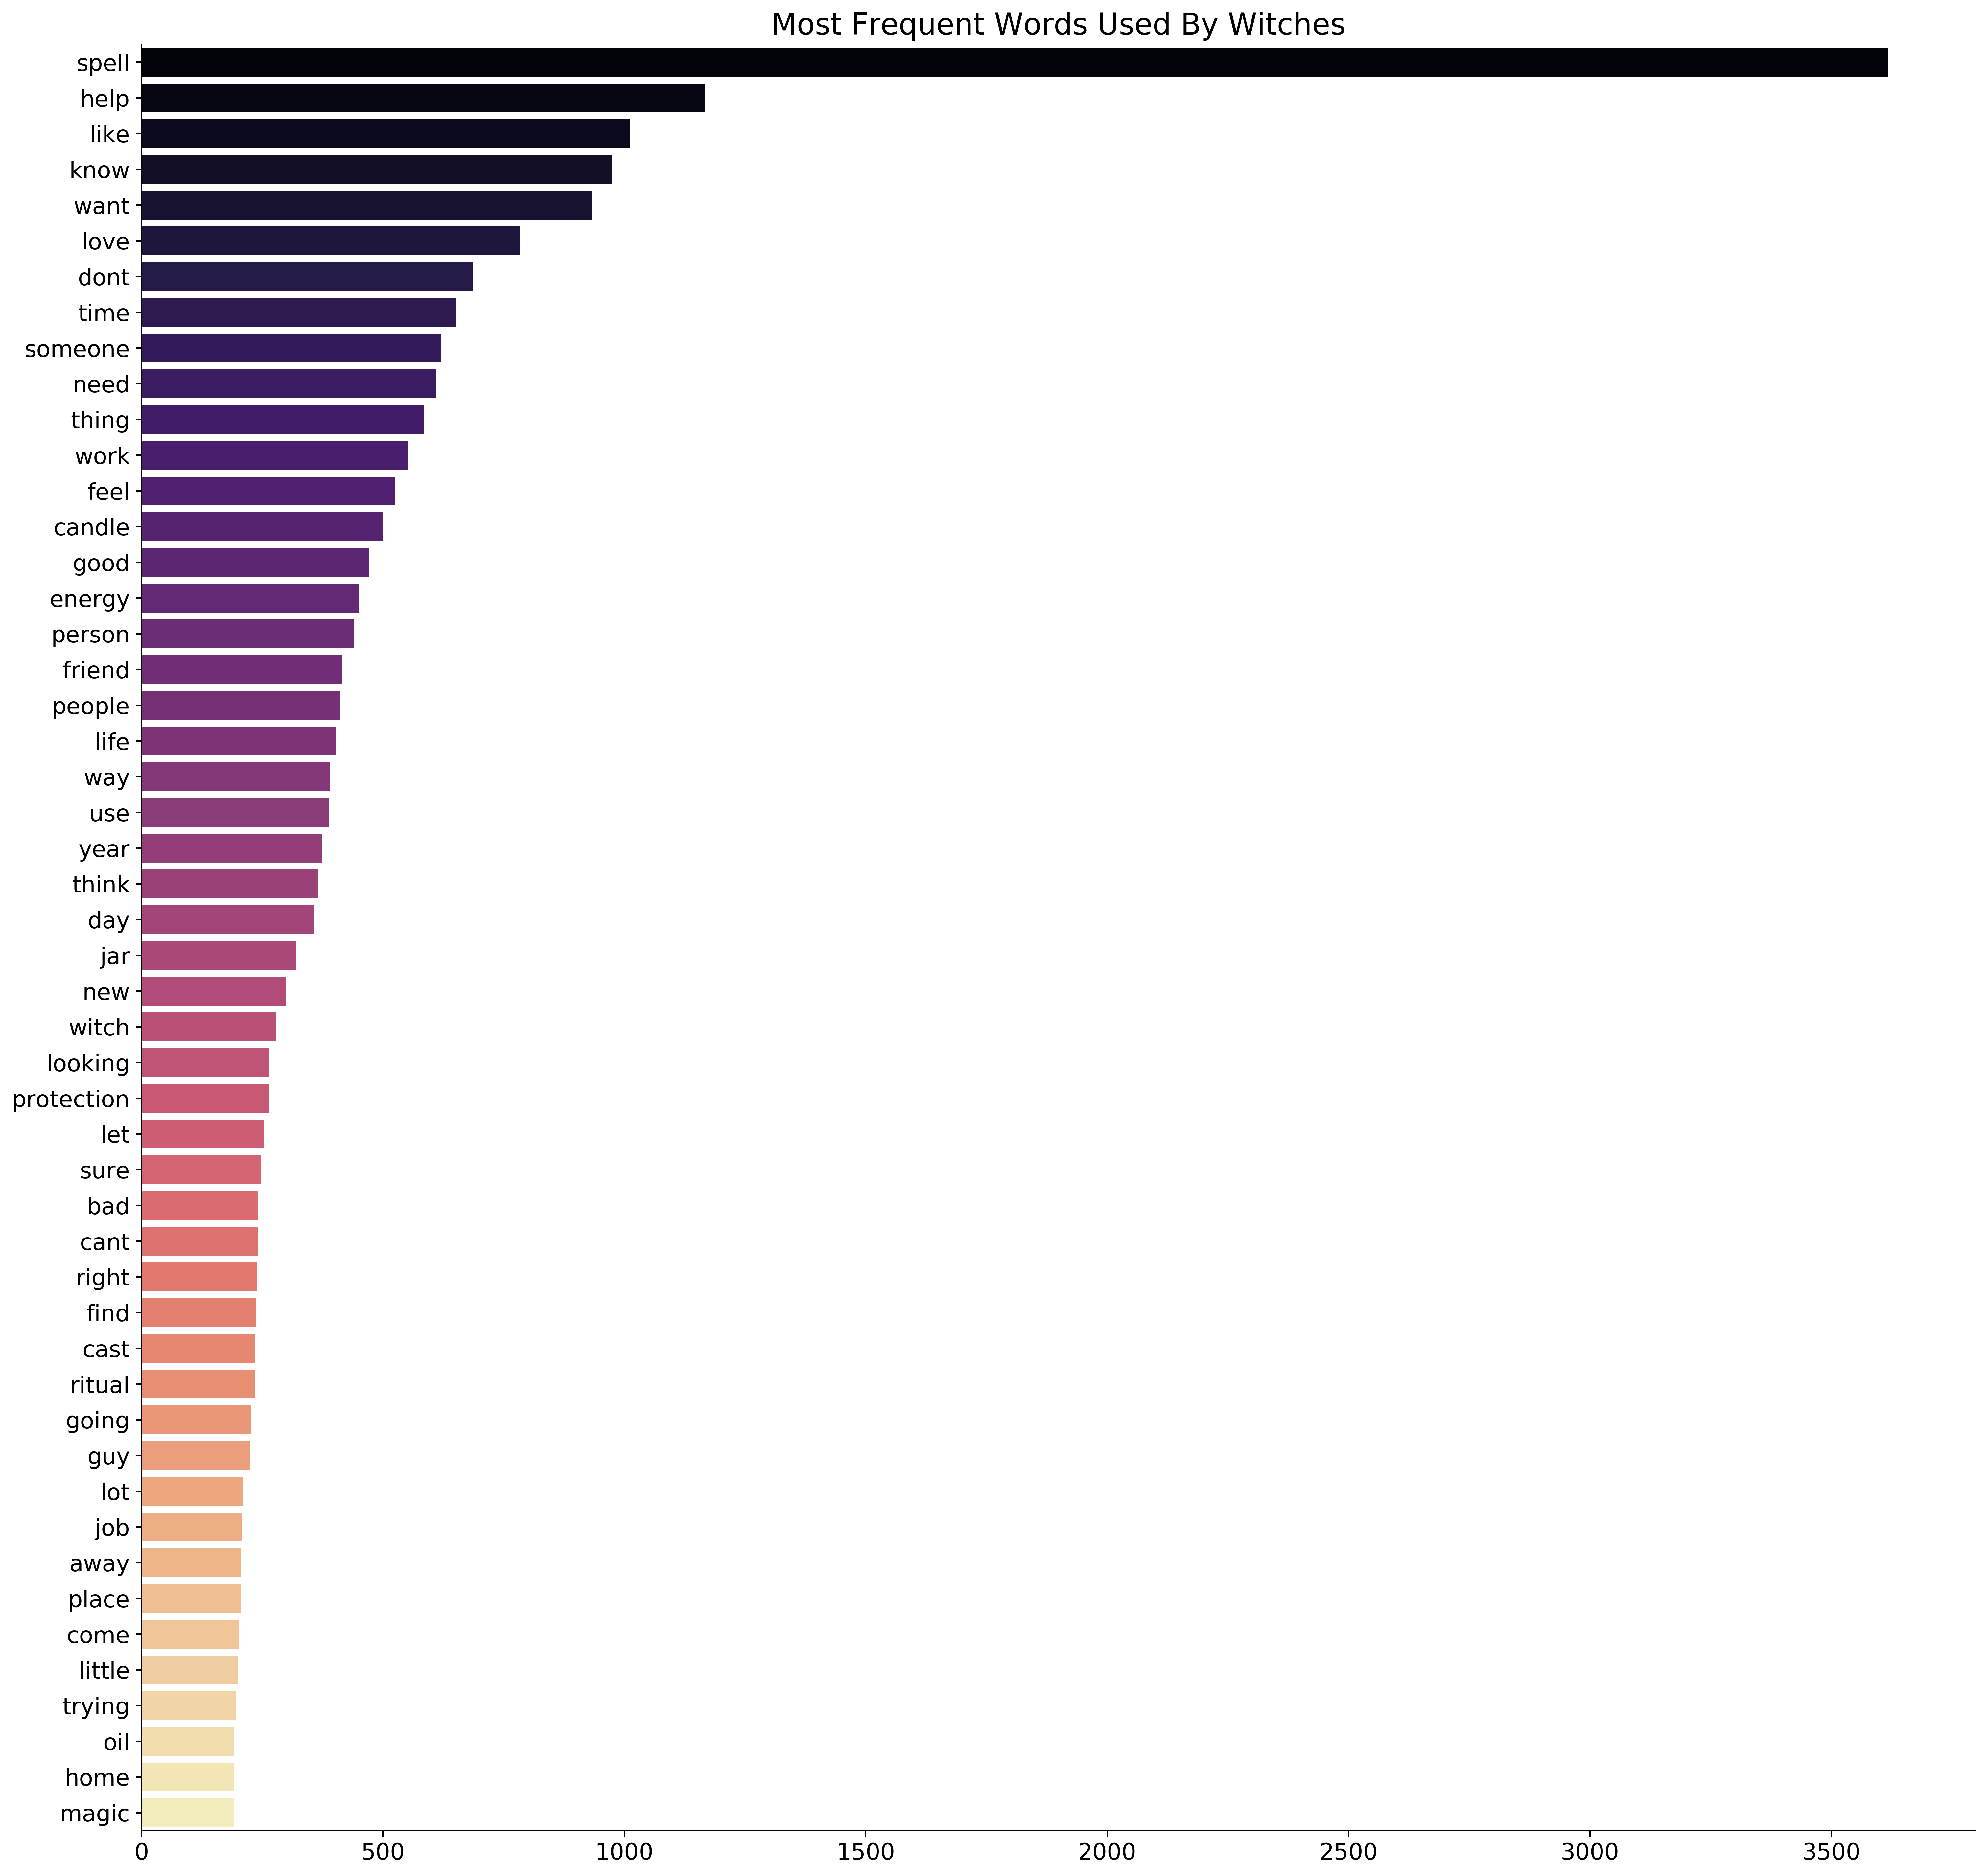

In [76]:
barplot(words=common_words, words_counts=common_words_counts, title='Most Frequent Words Used By Witches', gpallet ="magma") 

In [77]:
from itertools import islice

def key_word_counter(tupple):
    return tupple[1]

all_word_counts = sorted(aggregate_counter.items(), key=key_word_counter)
uncommon_words = [word[0] for word in islice(all_word_counts, 50)]
uncommon_word_counts = [word[1] for word in islice(all_word_counts, 50)]   

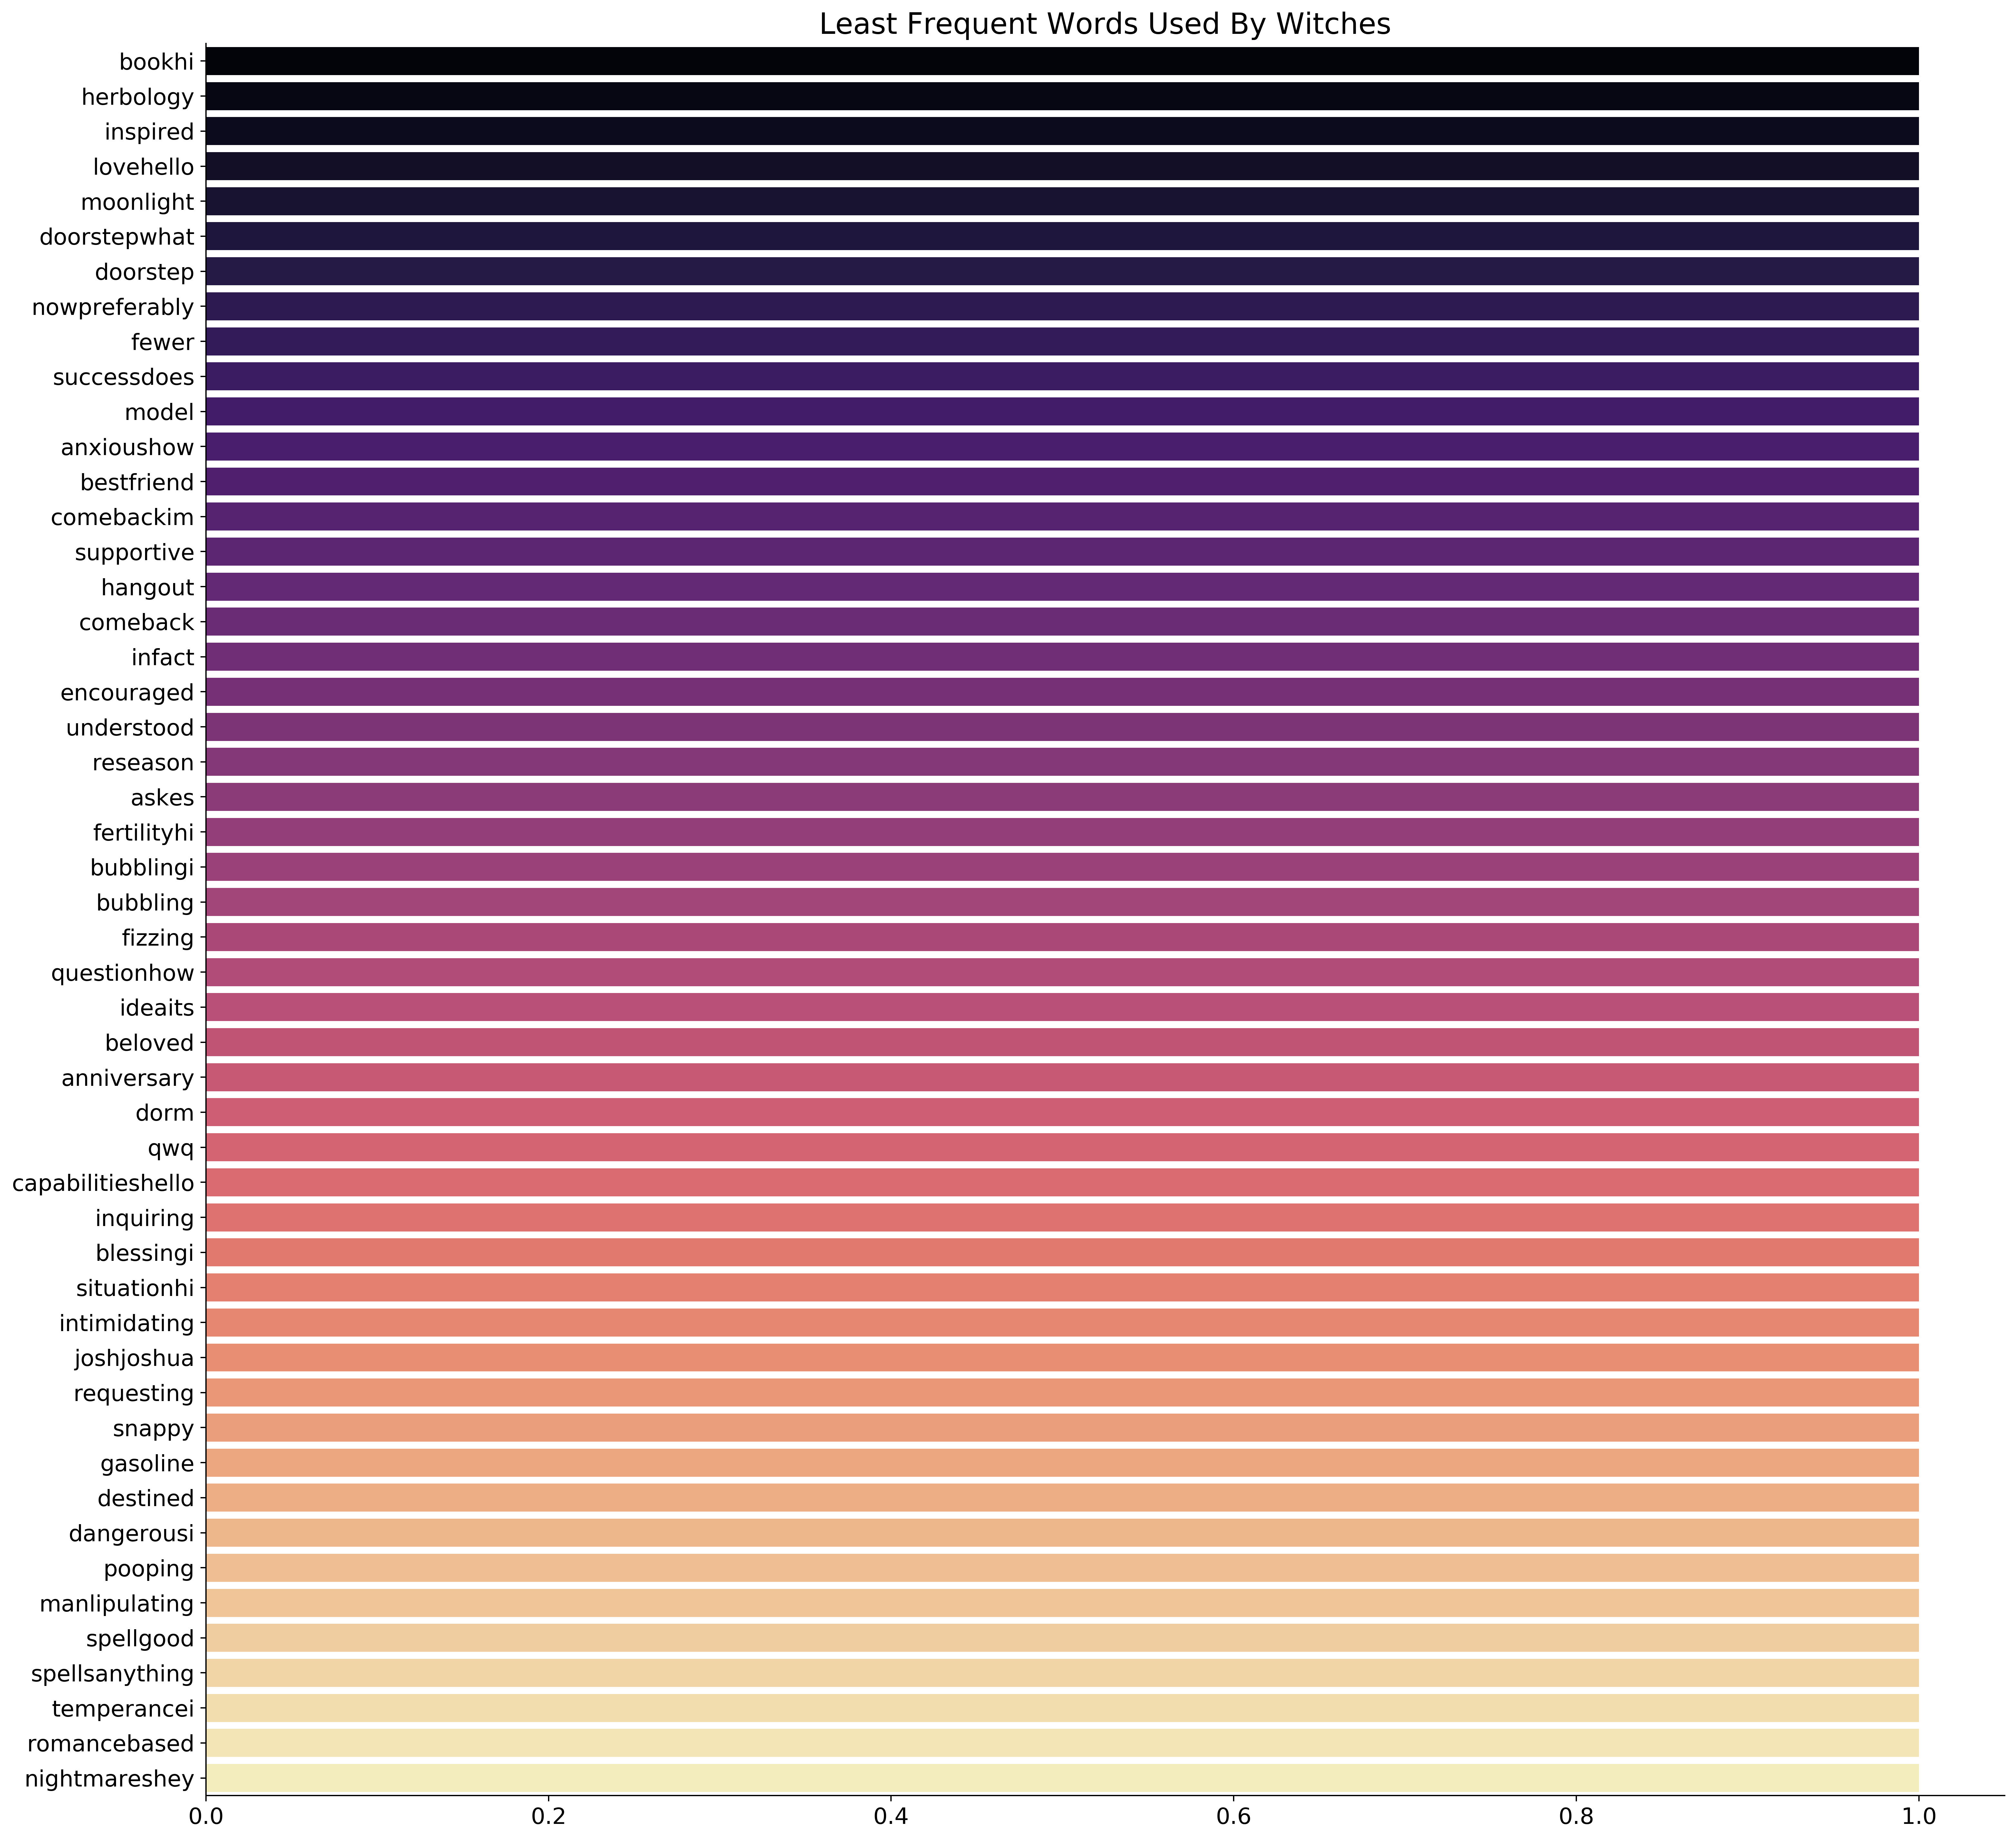

In [78]:
barplot(words=uncommon_words, words_counts=uncommon_word_counts, title='Least Frequent Words Used By Witches', gpallet ="magma")

#### Longest and shortest statuses

In [79]:
#5 Smallest
dfwitch.nsmallest(5, ['title_body_length'])

title      id       created body subreddit  \
3641         Self love spell?  icr03g  1.597883e+09    .    spells   
4952      Self love spell. :)  crss5d  1.566109e+09    .    spells   
4336     Dragon’s Blood Uses?  ffi2xe  1.583726e+09    .    spells   
5480    Simple I want spell..  8jnsmc  1.526437e+09    .    spells   
5292  Selenite Lamp Benefits.  dw2tln  1.573727e+09    .    spells   

         title_body_no_punc_list    cleaned_title_body_list  num_subreddit  \
3641         [self, love, spell]        [self, love, spell]              0   
4952         [self, love, spell]        [self, love, spell]              0   
4336      [dragons, blood, uses]        [dragon, blood, us]              0   
5480    [simple, i, want, spell]      [simple, want, spell]              0   
5292  [selenite, lamp, benefits]  [selenite, lamp, benefit]              0   

     cleaned_title_body_str  title_body_no_punc_str  title_body_length  \
3641        self love spell         self love spell                 15   
4952        self love spell         self love spell                 15   
4336        dragon blood us      dragons blood uses                 18   
5480      simple want spell     simple i want spell                 19   
5292  selenite lamp benefit  selenite lamp benefits                 22   

      title_body_word_count  title_body_clean_word_count  
3641                      3                            3  
4952                      3                            3  
4336                      3                            3  
5480                      4                            3  
5292                      3                            3

In [80]:
#5 largest
dfwitch.nlargest(5, ['title_body_length'])

title      id       created  \
4970      Powerful Ritual for Physical Healing  acz7yz  1.546757e+09   
5092  The Egyptian Opening of the Mouth Ritual  bbzvca  1.555018e+09   
4922                         Spell for Justice  axu55u  1.551872e+09   
5014        Low Resource Spell to Attract Lust  bh9b5w  1.556231e+09   
4308              Ritual of Self-Actualisation  fmai81  1.584800e+09   

                                                                                                                                                                                                                                                                                                                                                                                                                 body  \
4970  This is an approximation of the spell I used to heal my deathly ill dog. It is an approximation because I performed this spell in the mid-90’s, I do not have a photographic memory, and I write down magickal theory in my BoS, not individual spells. But I very much believe if I were to use the following spell today under the same circumstances, I would get the same results.\n\nAlso, there is no ...   
5092  The following is a modified rendition of the ancient spell Egyptians used to infuse the statues of their gods with the *ka* (loosely, soul essence) of that god, thus making it not just a representation of their god but actually making their god physically present--able to look out through the statue's eyes, hear with the statue's ears, etc.  (The same ritual was used to place the *ka* of the d...   
4922  When I feel the need to balance the scales because I feel strongly that someone has wronged me, I will use the following spell to summon justice to the situation.\n\nThe main benefit to this spell is that it is not a curse.  You aren't slinging negative mojo at someone in a fit of anger, you're just making sure all the parties involved get what they deserve, whatever that may be.  It's not wro...   
5014  Reproduced with permission.  Original by u/sitSTILLdamnit in answer to  [Help a low resource witch to cast a spell to attract lust](https://www.reddit.com/r/witchcraft/comments/bgtwpy/help_a_low_resource_witch_to_cast_a_spell_to/).\n\n&#x200B;\n\nOK YOU ASKED FOR IT: TL:DR- long, detailed, and totally customizable ritual, with a list of further correspondences and suggestions at the very end.\...   
4308  RITUAL OF SEIZING THE MORN/RITUAL OF SELF-ACTUALISATION\n\nThis is a Ritual I have created and use daily, the Ritual took a little bit of structural inspiration from the Lesser Banishing Ritual of the Pentagram, however it must be made clear; \n\n\tTHIS IS NOT A BANISHING RITUAL. THIS IS NOT AN ADAPTATION OF THE LBRP, SIMILAR ONLY IN STRUCTURE. \n\nThis Ritual is designed for daily use, its pu...   

     subreddit  \
4970    spells   
5092    spells   
4922    spells   
5014    spells   
4308    spells   

                                                                                                                                                                                                                                                                                                                                                                                              title_body_no_punc_list  \
4970  [powerful, ritual, for, physical, healingthis, is, an, approximation, of, the, spell, i, used, to, heal, my, deathly, ill, dog, it, is, an, approximation, because, i, performed, this, spell, in, the, mid90s, i, do, not, have, a, photographic, memory, and, i, write, down, magickal, theory, in, my, bos, not, individual, spells, but, i, very, much, believe, if, i, were, to, use, the, following, s...   
5092  [the, egyptian, opening, of, the, mouth, ritualthe, following, is, a, modified, rendition, of, the, ancient, spell, egyptians, used, to, infuse, the, statues, of, their, gods, with, the, ka, loosely, soul, essence, of, t

#### Distribution of word count

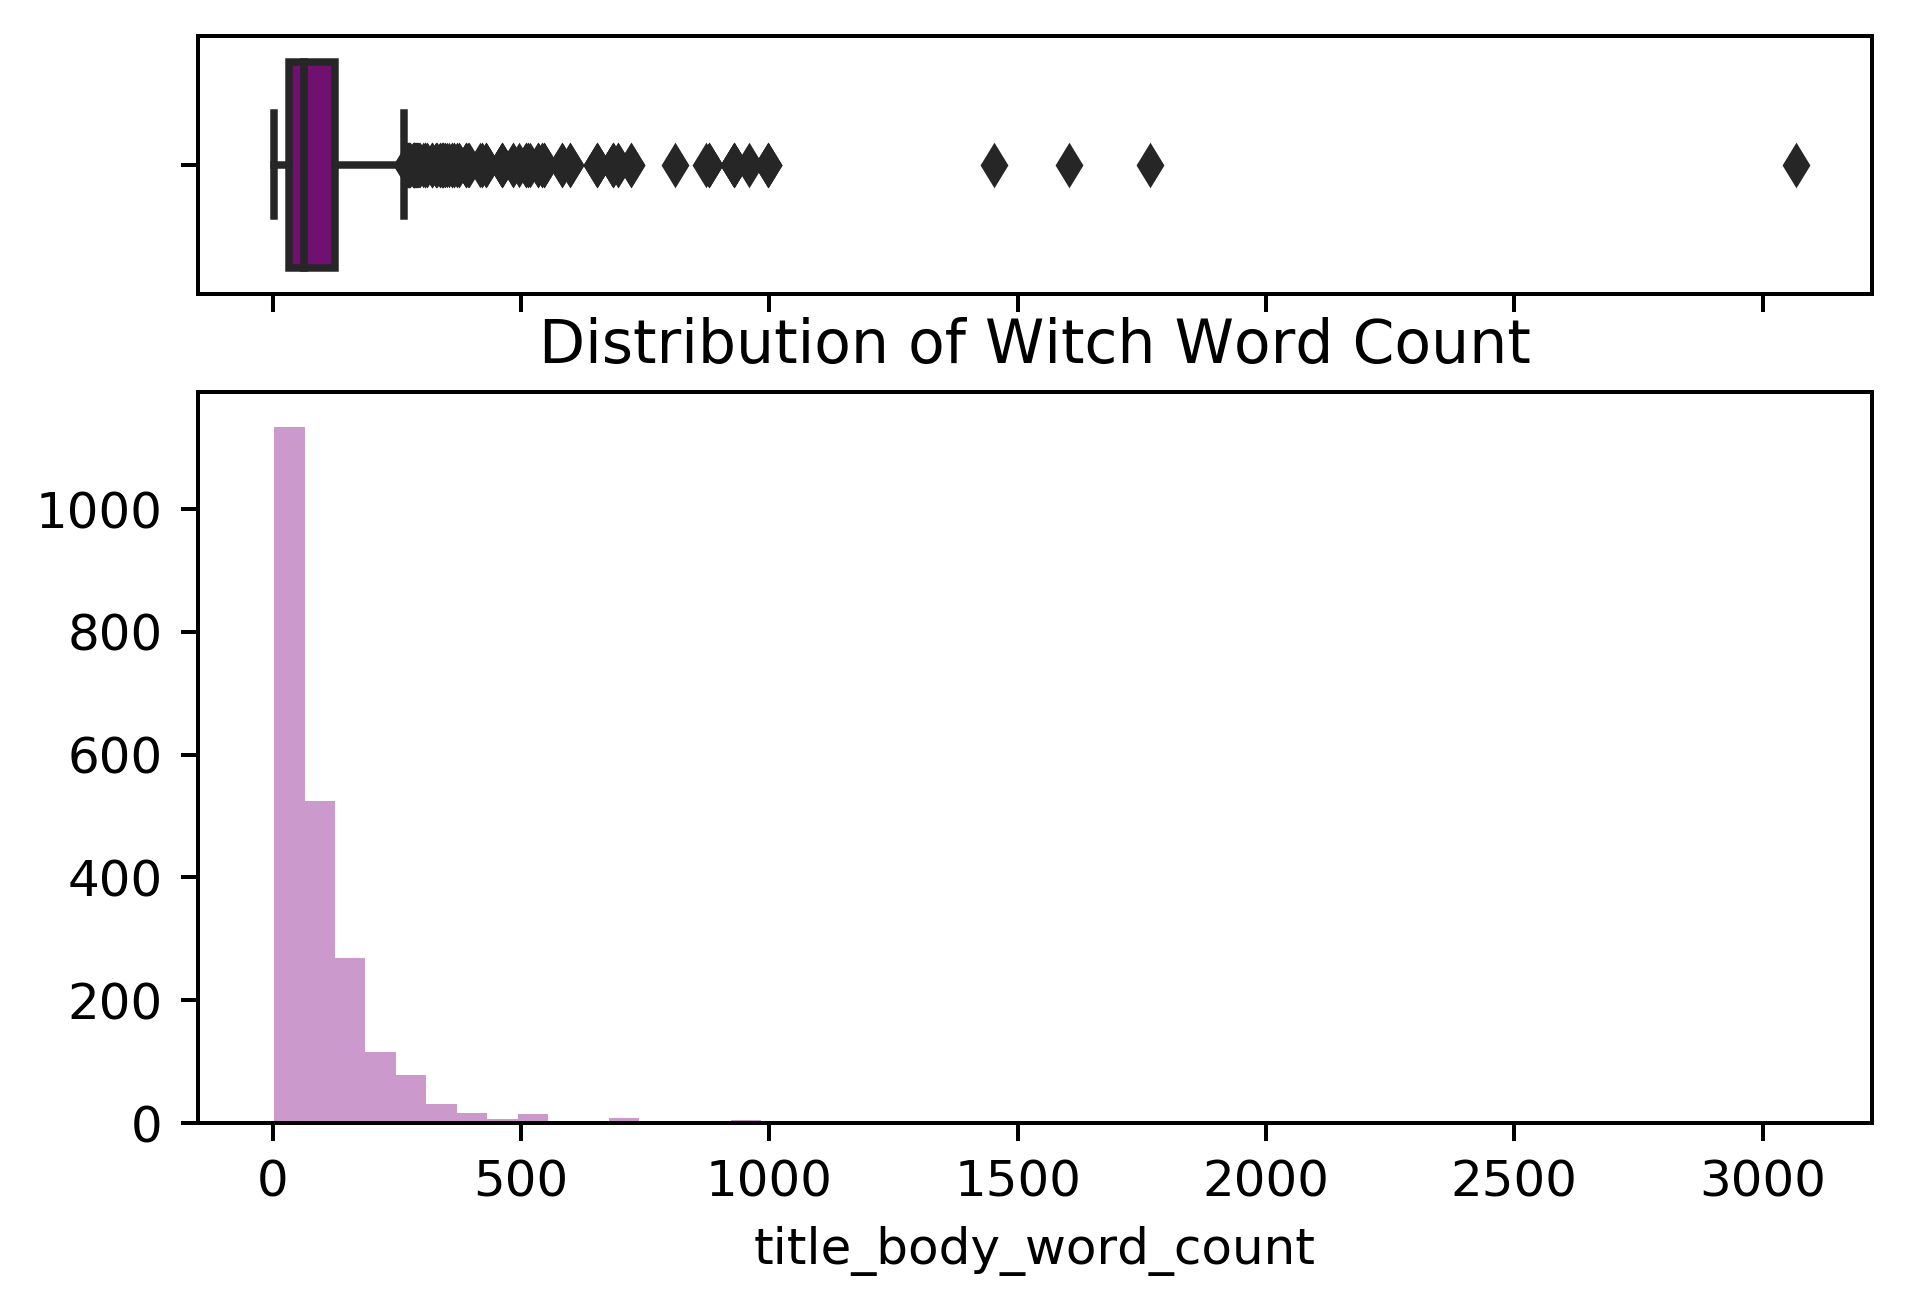

In [81]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.30, .85)})
 
sns.boxplot(dfwitch['title_body_word_count'], ax=ax_box, color = 'purple')
sns.distplot(dfwitch['title_body_word_count'],ax=ax_hist, color = 'purple', kde=False)

plt.title('Distribution of Witch Word Count')
ax_box.set(xlabel='');

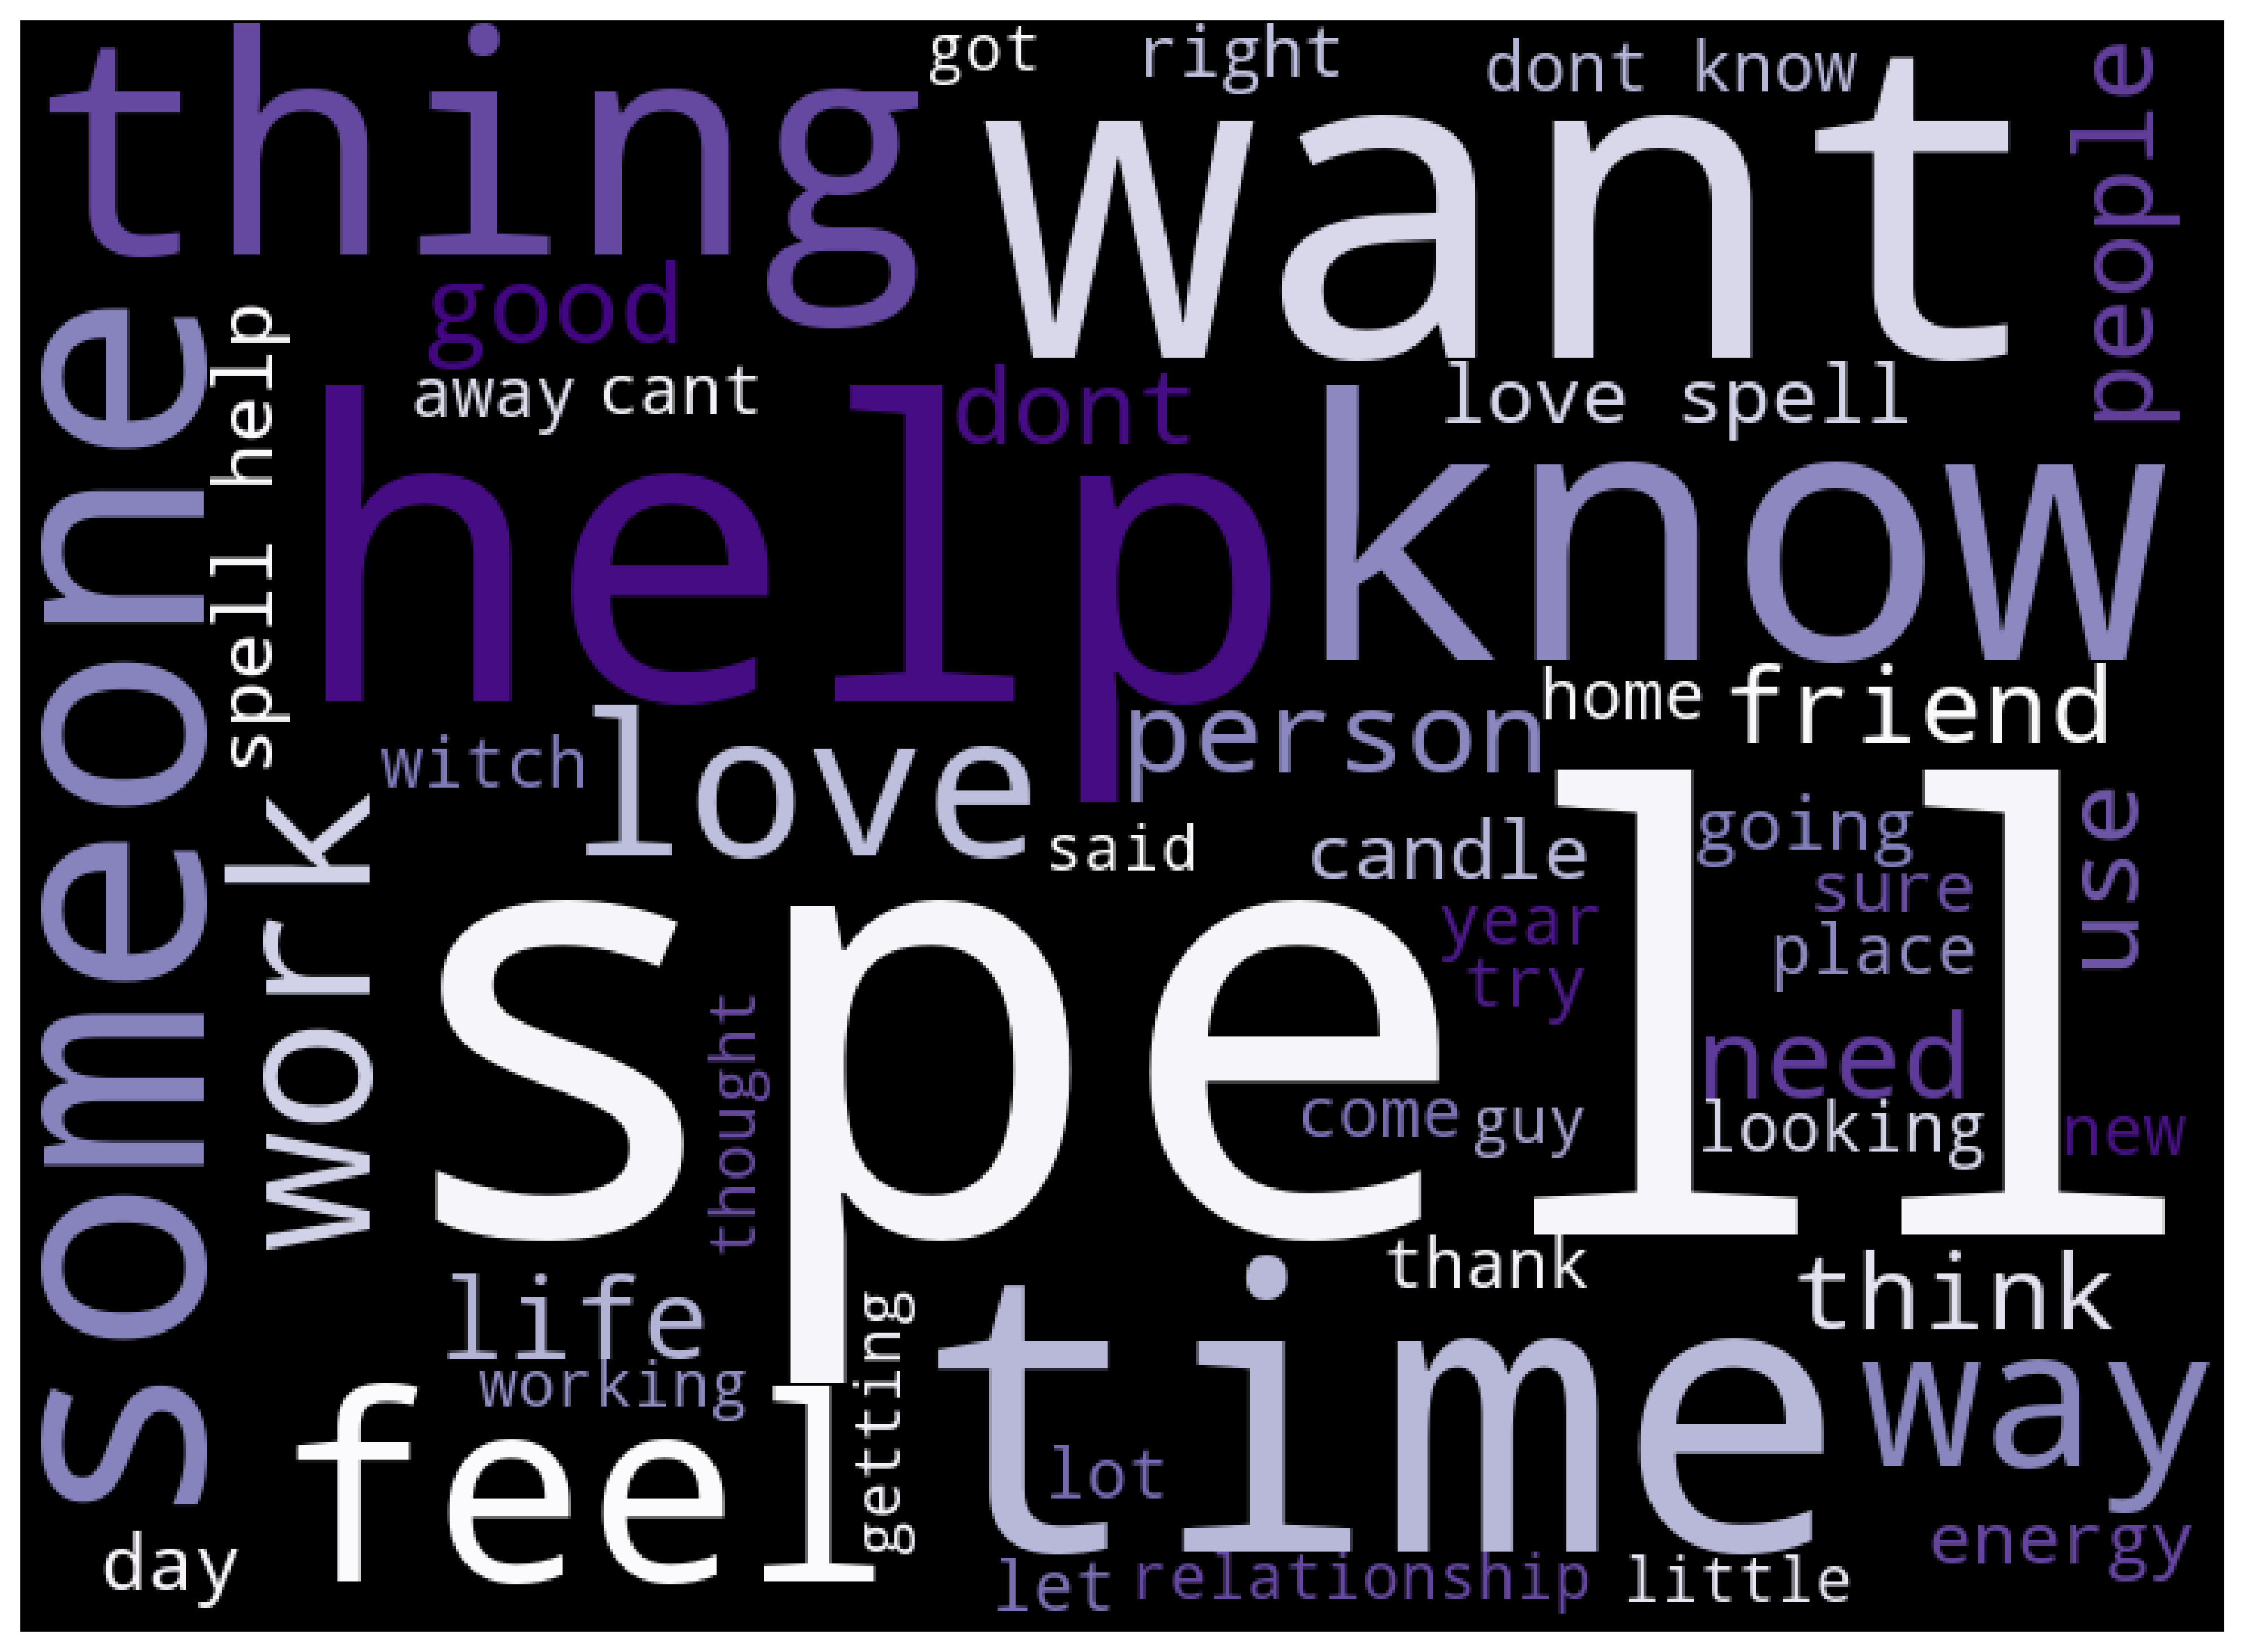

In [82]:
wc = WordCloud(max_words= 50,
                      width = 744, 
                      height = 544,
                      background_color ='black', 
                      contour_width=3, 
                      colormap= 'Purples',
                      min_font_size = 10).generate(' '.join(dfwitch['cleaned_title_body_str'])) 
                      
plt.figure(figsize = (14, 14)) 
plt.imshow(wc, interpolation="bilinear")
plt.imshow(wc) 
plt.axis("off");

#Code inspiration from:
#https://stackoverflow.com/questions/43606339/generate-word-cloud-from-single-column-pandas-dataframe

#### Unique User Count

In [83]:
dfwitch['id'].nunique()

1283

In [84]:
(dfwitch['id'].value_counts() == 1).sum()

654

In [85]:
(dfwitch['id'].value_counts() == 2).sum()

357

In [86]:
(dfwitch['id'].value_counts() == 3).sum()

236

## EDA Survivalists

#### Most & Least Frequent Survivalist Words
Code inspiration from :
https://medium.com/datadriveninvestor/unsupervised-outlier-detection-in-text-corpus-using-deep-learning-41d4284a04c8

In [87]:
aggregate_counter = Counter()
for row_index,row in dfbush.iterrows():
    c = Counter(row['cleaned_title_body_str'].split())
    aggregate_counter += c

common_words_sur = [word[0] for word in aggregate_counter.most_common(50)]
common_words_counts_sur = [word[1] for word in aggregate_counter.most_common(50)]

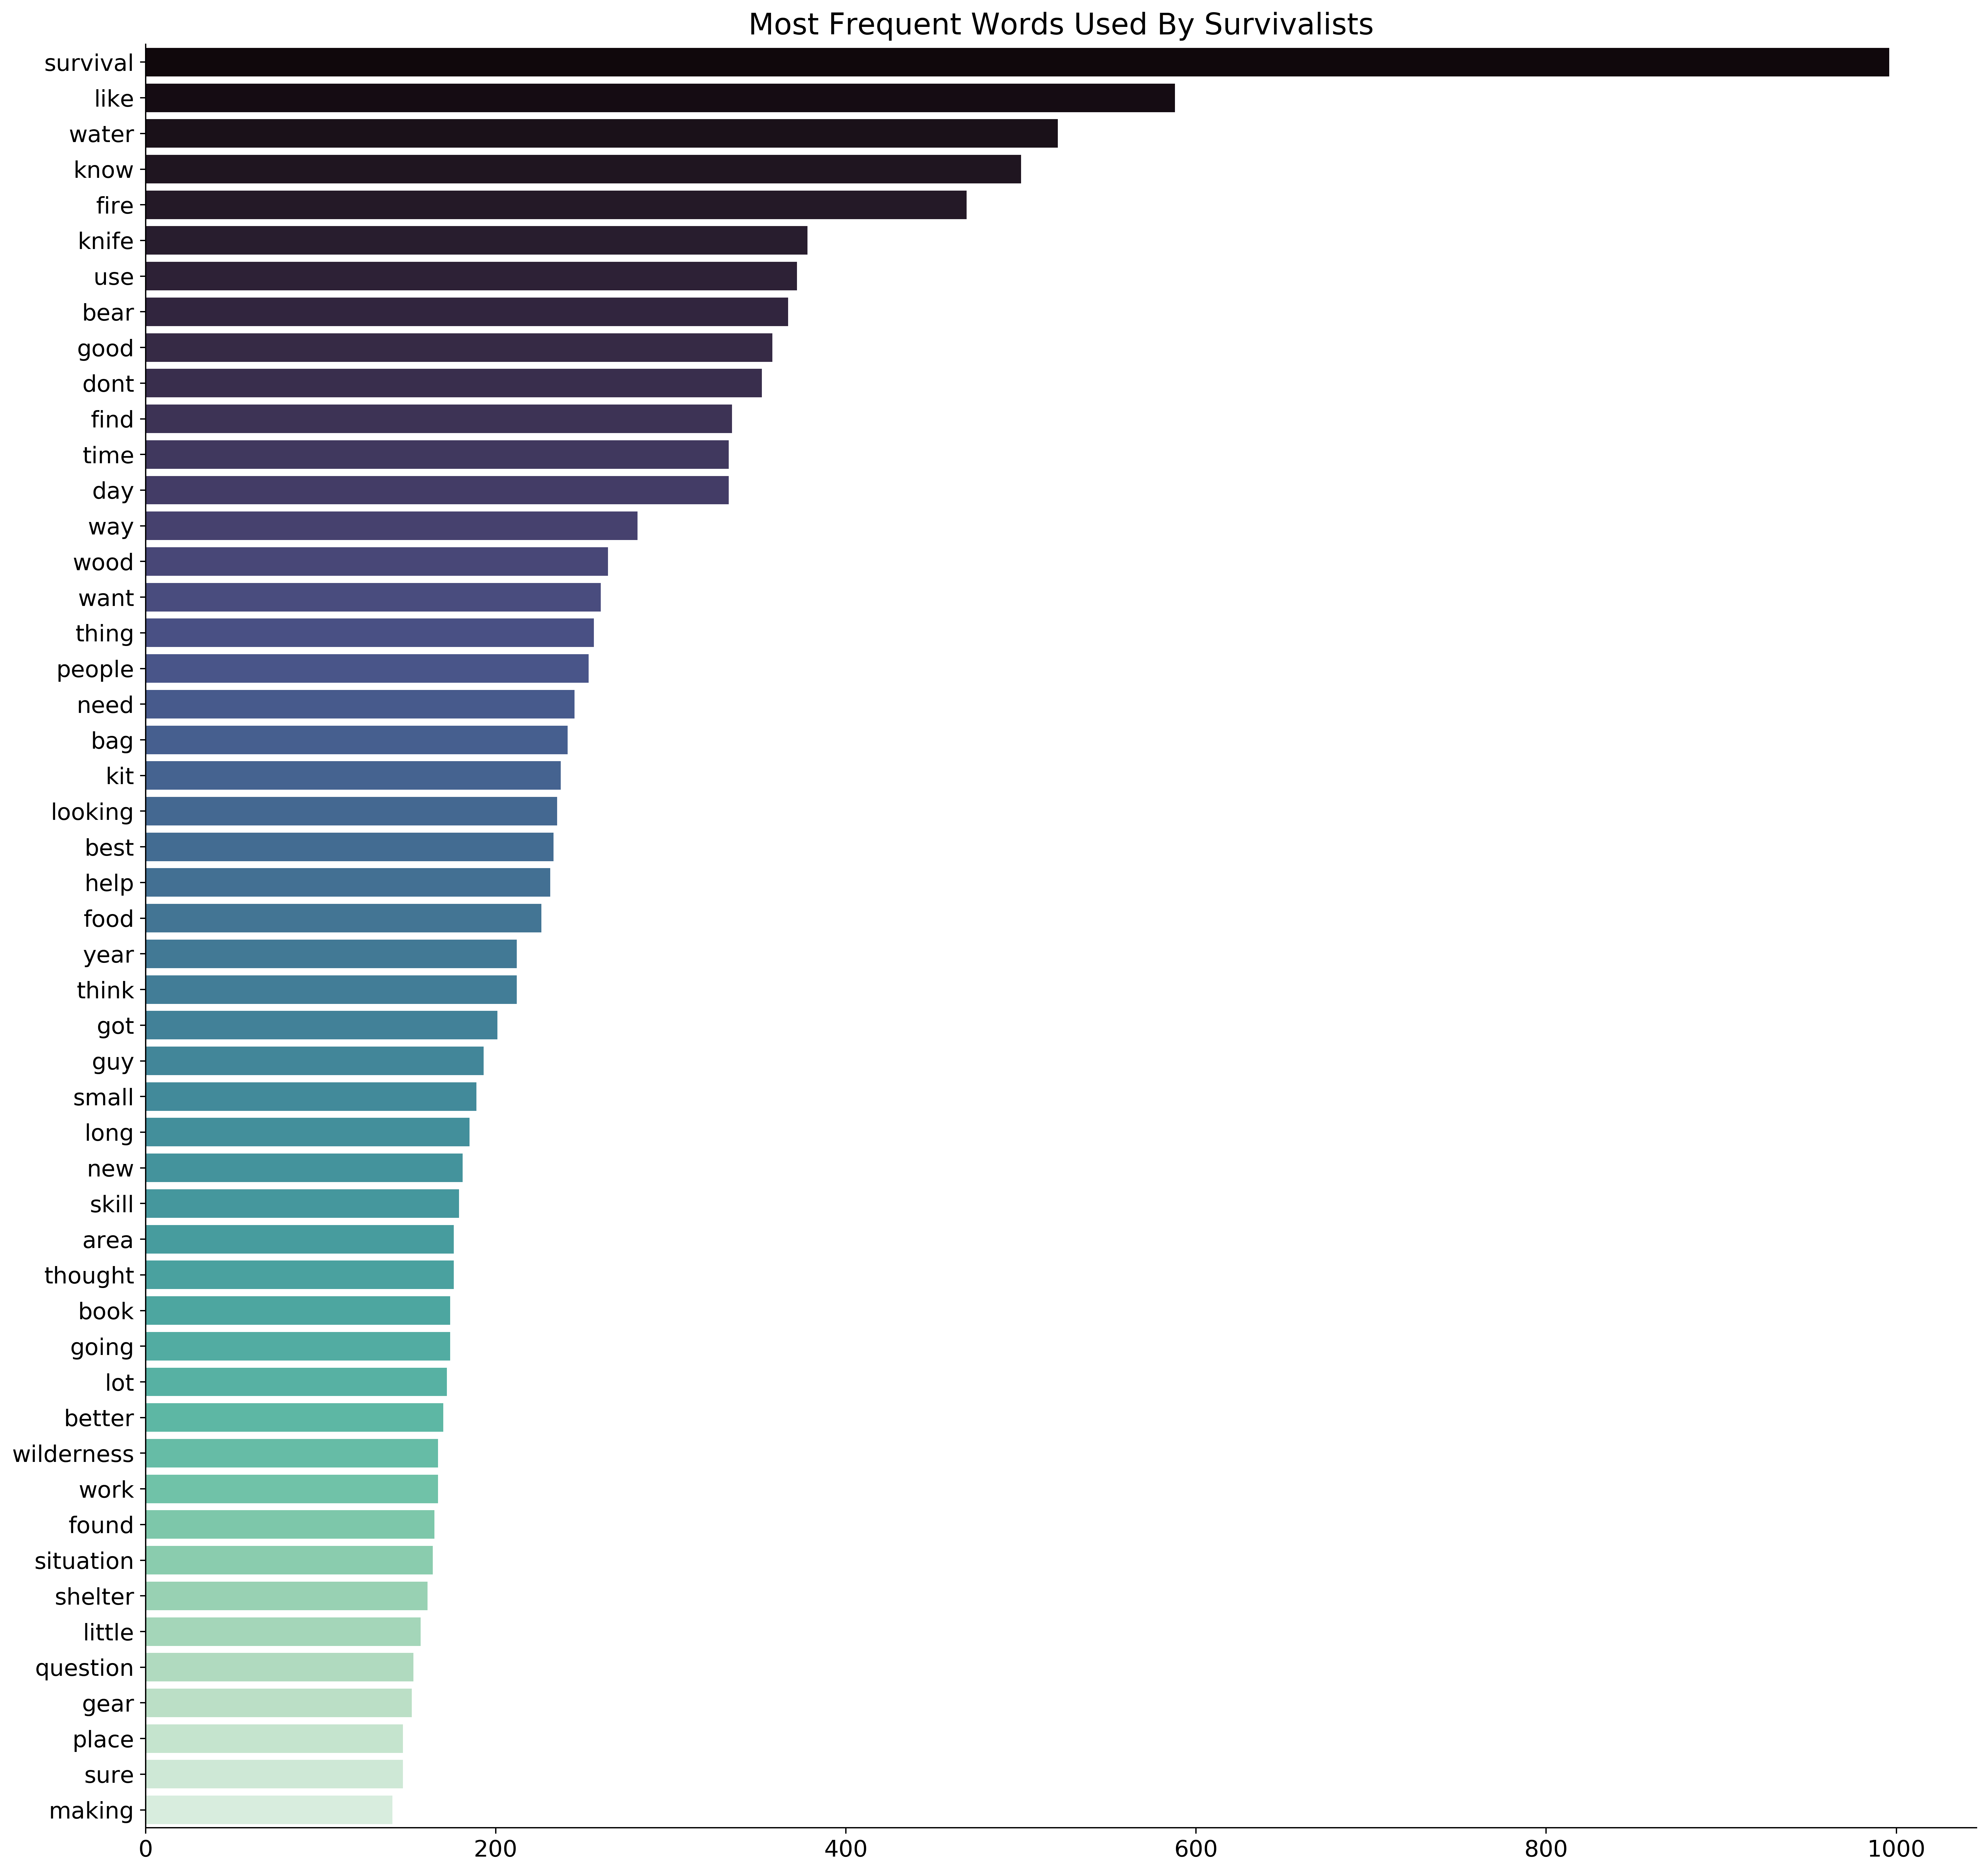

In [88]:
barplot(words=common_words_sur, words_counts=common_words_counts_sur, title='Most Frequent Words Used By Survivalists', gpallet = "mako")

In [89]:
def key_word_counter(tupple):
    return tupple[1]

all_word_counts = sorted(aggregate_counter.items(), key=key_word_counter)
uncommon_words = [word[0] for word in islice(all_word_counts, 50)]
uncommon_word_counts = [word[1] for word in islice(all_word_counts, 50)]  

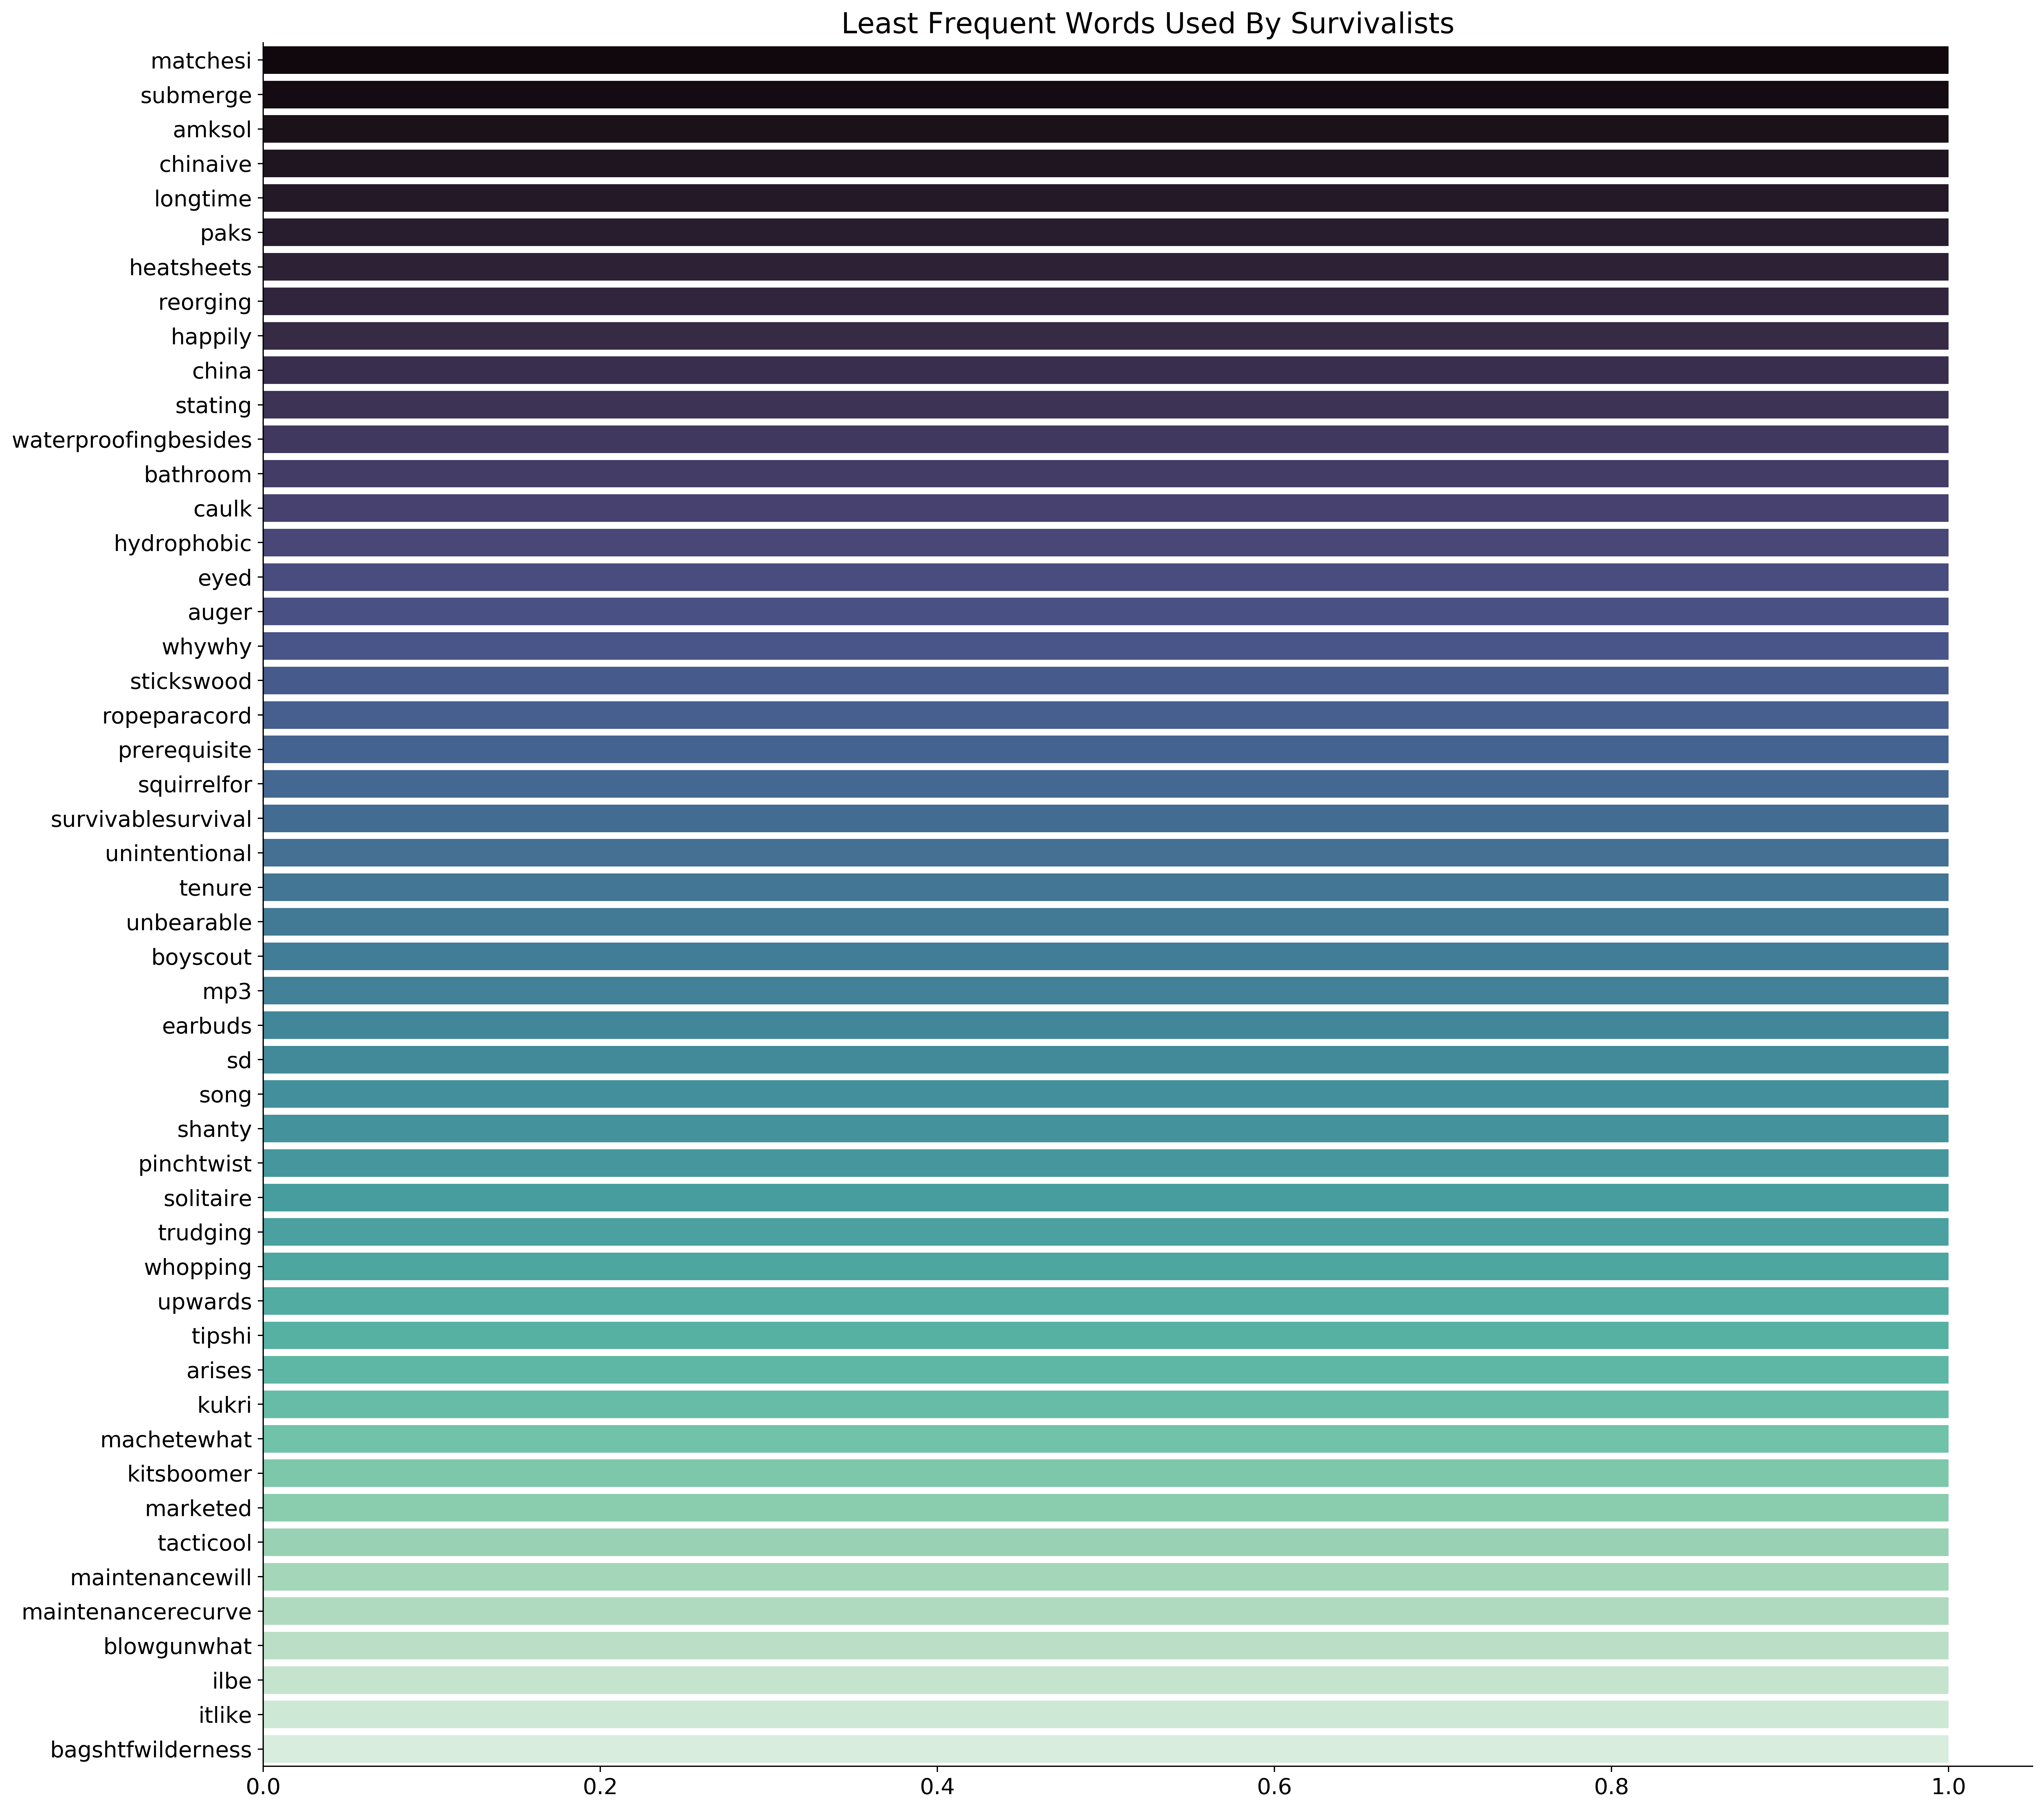

In [90]:
barplot(words=uncommon_words, words_counts=uncommon_word_counts, title='Least Frequent Words Used By Survivalists',gpallet = "mako")

### Longest and shortest statuses

In [91]:
#5 Smallest
dfbush.nsmallest(5, ['title_body_length'])

title      id       created body  \
1900      ESEE 6 & Becker BK-7 with TKC G-10 grips  ch0rnr  1.563956e+09    .   
2284   Guy makes great videos, e.g. "$5 DIY Kayak"  a2ddy8  1.543788e+09    .   
458      30 pcs (250 pcs) Indian Survival Fire Kit  i7mdup  1.597155e+09    .   
1199     30 pcs (250 pcs) Indian Survival Fire Kit  i7mdup  1.597155e+09    .   
3281  "Dead Doctors Don't Lie" by Dr. Joel Wallach   7pyjk  1.232066e+09    .   

     subreddit                            title_body_no_punc_list  \
1900  survival      [esee, 6, becker, bk7, with, tkc, g10, grips]   
2284  survival     [guy, makes, great, videos, eg, 5, diy, kayak]   
458   survival   [30, pcs, 250, pcs, indian, survival, fire, kit]   
1199  survival   [30, pcs, 250, pcs, indian, survival, fire, kit]   
3281  survival  [dead, doctors, dont, lie, by, dr, joel, wallach]   

                             cleaned_title_body_list  num_subreddit  \
1900          [esee, 6, becker, bk7, tkc, g10, grip]              1   
2284    [guy, make, great, video, eg, 5, diy, kayak]              1   
458   [30, pc, 250, pc, indian, survival, fire, kit]              1   
1199  [30, pc, 250, pc, indian, survival, fire, kit]              1   
3281    [dead, doctor, dont, lie, dr, joel, wallach]              1   

                     cleaned_title_body_str  \
1900         esee 6 becker bk7 tkc g10 grip   
2284    guy make great video eg 5 diy kayak   
458   30 pc 250 pc indian survival fire kit   
1199  30 pc 250 pc indian survival fire kit   
3281   dead doctor dont lie dr joel wallach   

                        title_body_no_punc_str  title_body_length  \
1900      esee 6 becker bk7 with tkc g10 grips                 36   
2284     guy makes great videos eg 5 diy kayak                 37   
458    30 pcs 250 pcs indian survival fire kit                 39   
1199   30 pcs 250 pcs indian survival fire kit                 39   
3281  dead doctors dont lie by dr joel wallach                 40   

      title_body_word_count  title_body_clean_word_count  
1900                      8                            7  
2284                      8                            8  
458                       8                            8  
1199                      8                            8  
3281                      8                            7

In [92]:
#5 largest
dfbush.nlargest(5, ['title_body_length'])

title      id  \
3048  37 survival tips and tricks for the wilderness [my list]  3hjr9z   
390                                           “Survival” story  ifrozt   
2628   My 5 day survival course experiance in South Australia.  2msx3j   
772        Trip Report -- Backpacking in Arizona's Rim Country  h02sn4   
1393       Trip Report -- Backpacking in Arizona's Rim Country  h02sn4   

           created  \
3048  1.439991e+09   
390   1.598313e+09   
2628  1.416457e+09   
772   1.591788e+09   
1393  1.591788e+09   

                                                                                                                                                                                                                                                                                                                                                                                                                 body  \
3048  When it comes to survival, the more you know, the better. While you can't possibly prepare for every single thing that is out there, you can try your best to be as aware of many of them as you can. Sometimes these bits and pieces of knowledge can seem quite like useless trivia at times, but don't be fooled. The knowledge is there not to be useful ALL the time, but rather to be there when you n...   
390   \nSo here’s a little survival story from last year. It is a story of failure and success. Like with everything in the woods there were many teaching moments but I do believe that the most important thing for me that I learned is that in the end the most important tool you posses is your mind.\n\nIn May last year I took off in my kayak alone for about 5 days on Delaware River. I was planning to...   
2628  \nWas lucky enough to experience a week in the bush (as the Aussies call it) in South Australia. This course was in preparation for our "team" that would be spending the next 2 months in less than desirable conditions in several different locations in Thailand. Most of the week had more of an emphasis on teamwork, confidence building and problem solving than actual survival skills, although th...   
772   https://reddit.com/link/h02sn4/video/pewmd96l40451/player\n\nI backpacked into a remote area of Arizona, planning "about" seven to nine days, starting the Memorial Day Weekend. As it turned out, the trip was six days, and it was an example of knowing when to nope out that I'll get into in a bit.\n\nI'm being deliberately vague about the location of this canyon. It's remote enough, and challeng...   
1393  https://reddit.com/link/h02sn4/video/pewmd96l40451/player\n\nI backpacked into a remote area of Arizona, planning "about" seven to nine days, starting the Memorial Day Weekend. As it turned out, the trip was six days, and it was an example of knowing when to nope out that I'll get into in a bit.\n\nI'm being deliberately vague about the location of this canyon. It's remote enough, and challeng...   

     subreddit  \
3048  survival   
390   survival   
2628  survival   
772   survival   
1393  survival   

                                                                                                                                                                                                                                                                                                                                                                                              title_body_no_punc_list  \
3048  [37, survival, tips, and, tricks, for, the, wilderness, my, listwhen, it, comes, to, survival, the, more, you, know, the, better, while, you, cant, possibly, prepare, for, every, single, thing, that, is, out, there, you, can, try, your, best, to, be, as, aware, of, many, of, them, as, you, can, sometimes, these, bits, and, pieces, of, knowledge, can, seem, quite, like, useless, trivia, at, tim...   
390   [survival, story, heres, a, little, survival, story, from, last, year, it, is, a, story, of

####  Distribution of word count

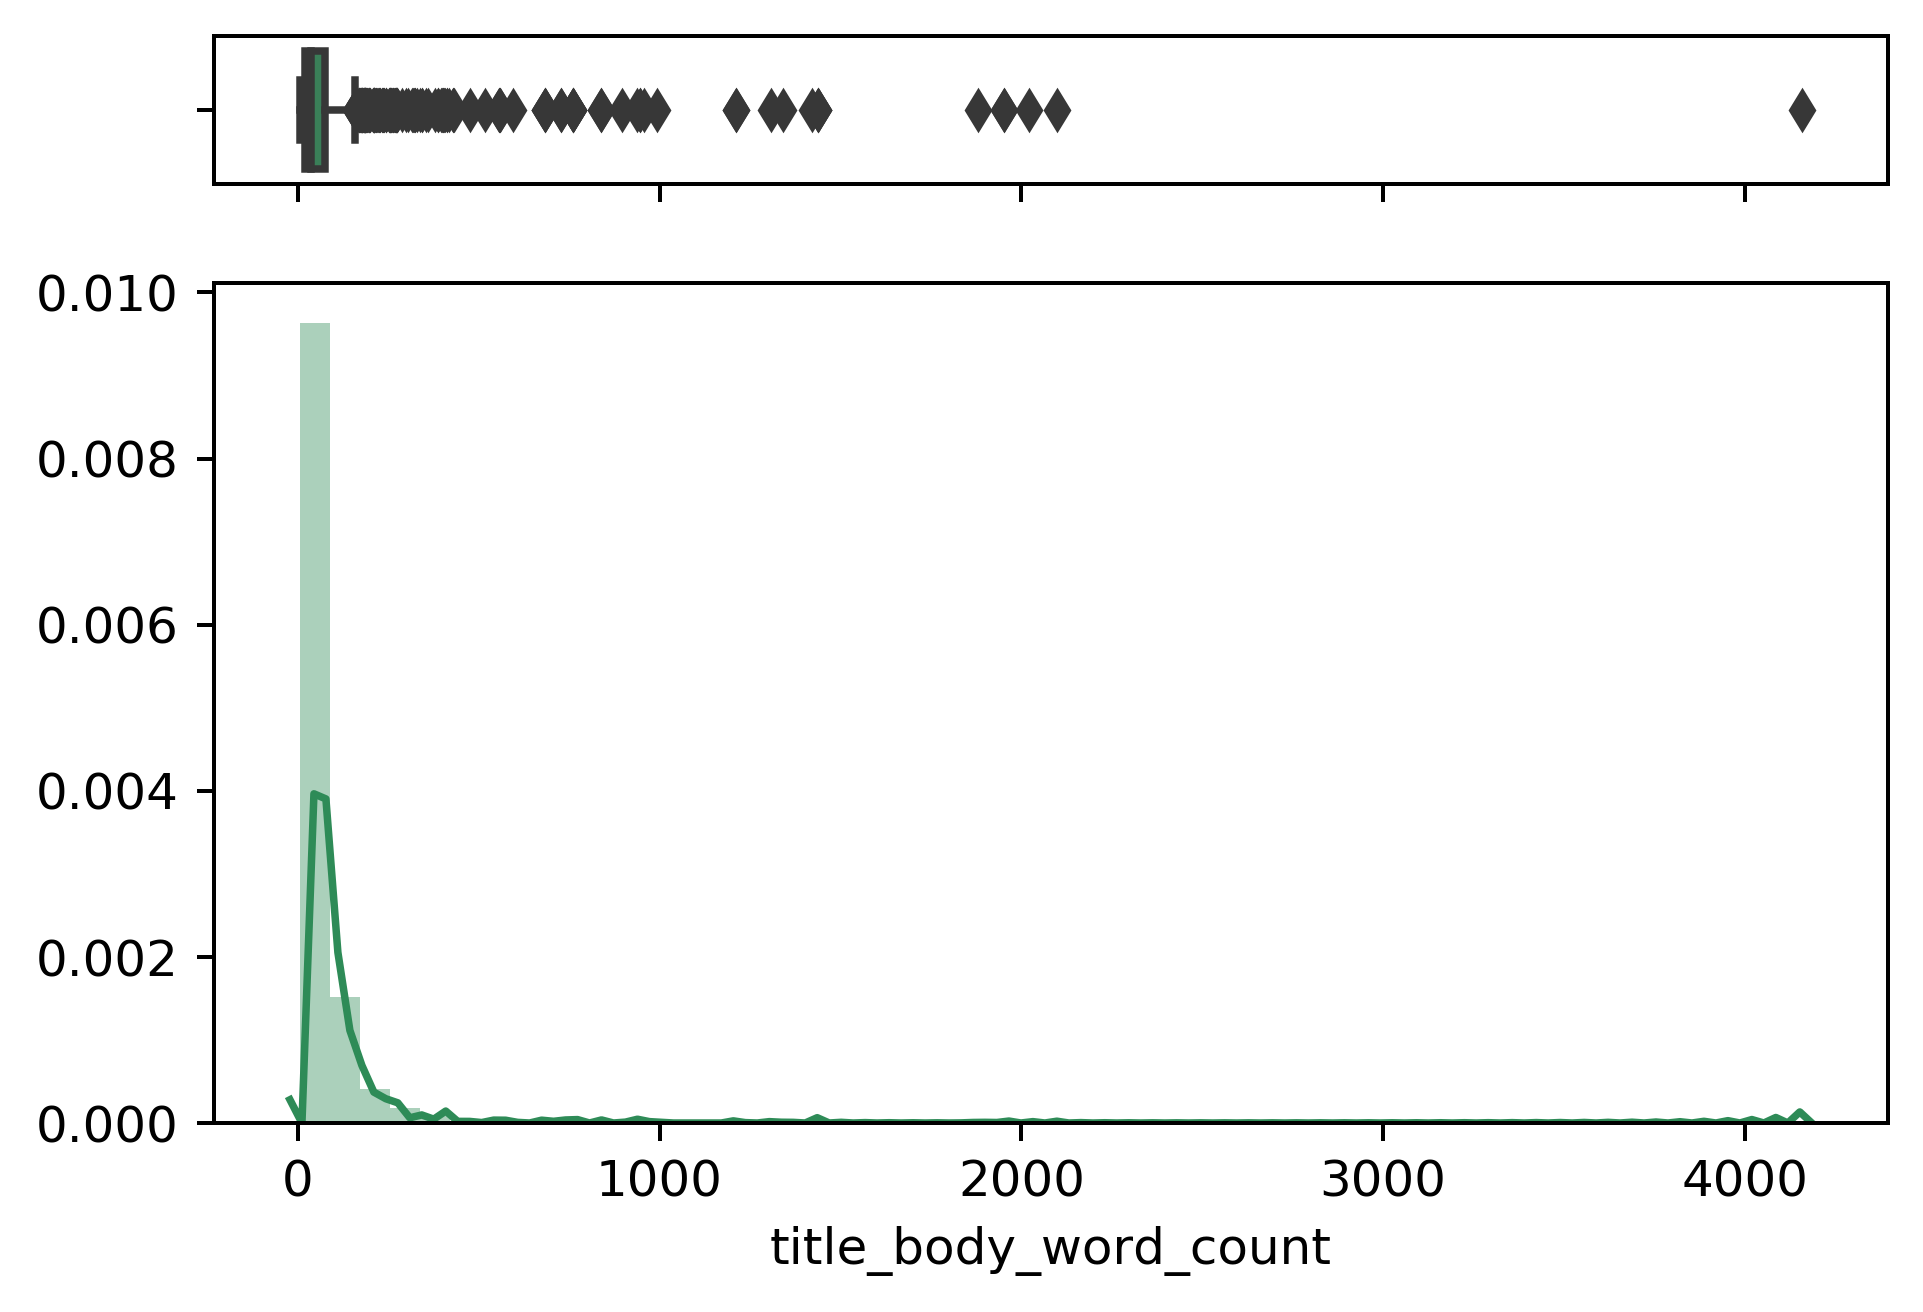

In [93]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
sns.boxplot(dfbush['title_body_word_count'], ax=ax_box, color = 'seagreen')
sns.distplot(dfbush['title_body_word_count'], ax=ax_hist, color = 'seagreen')
 
ax_box.set(xlabel='');

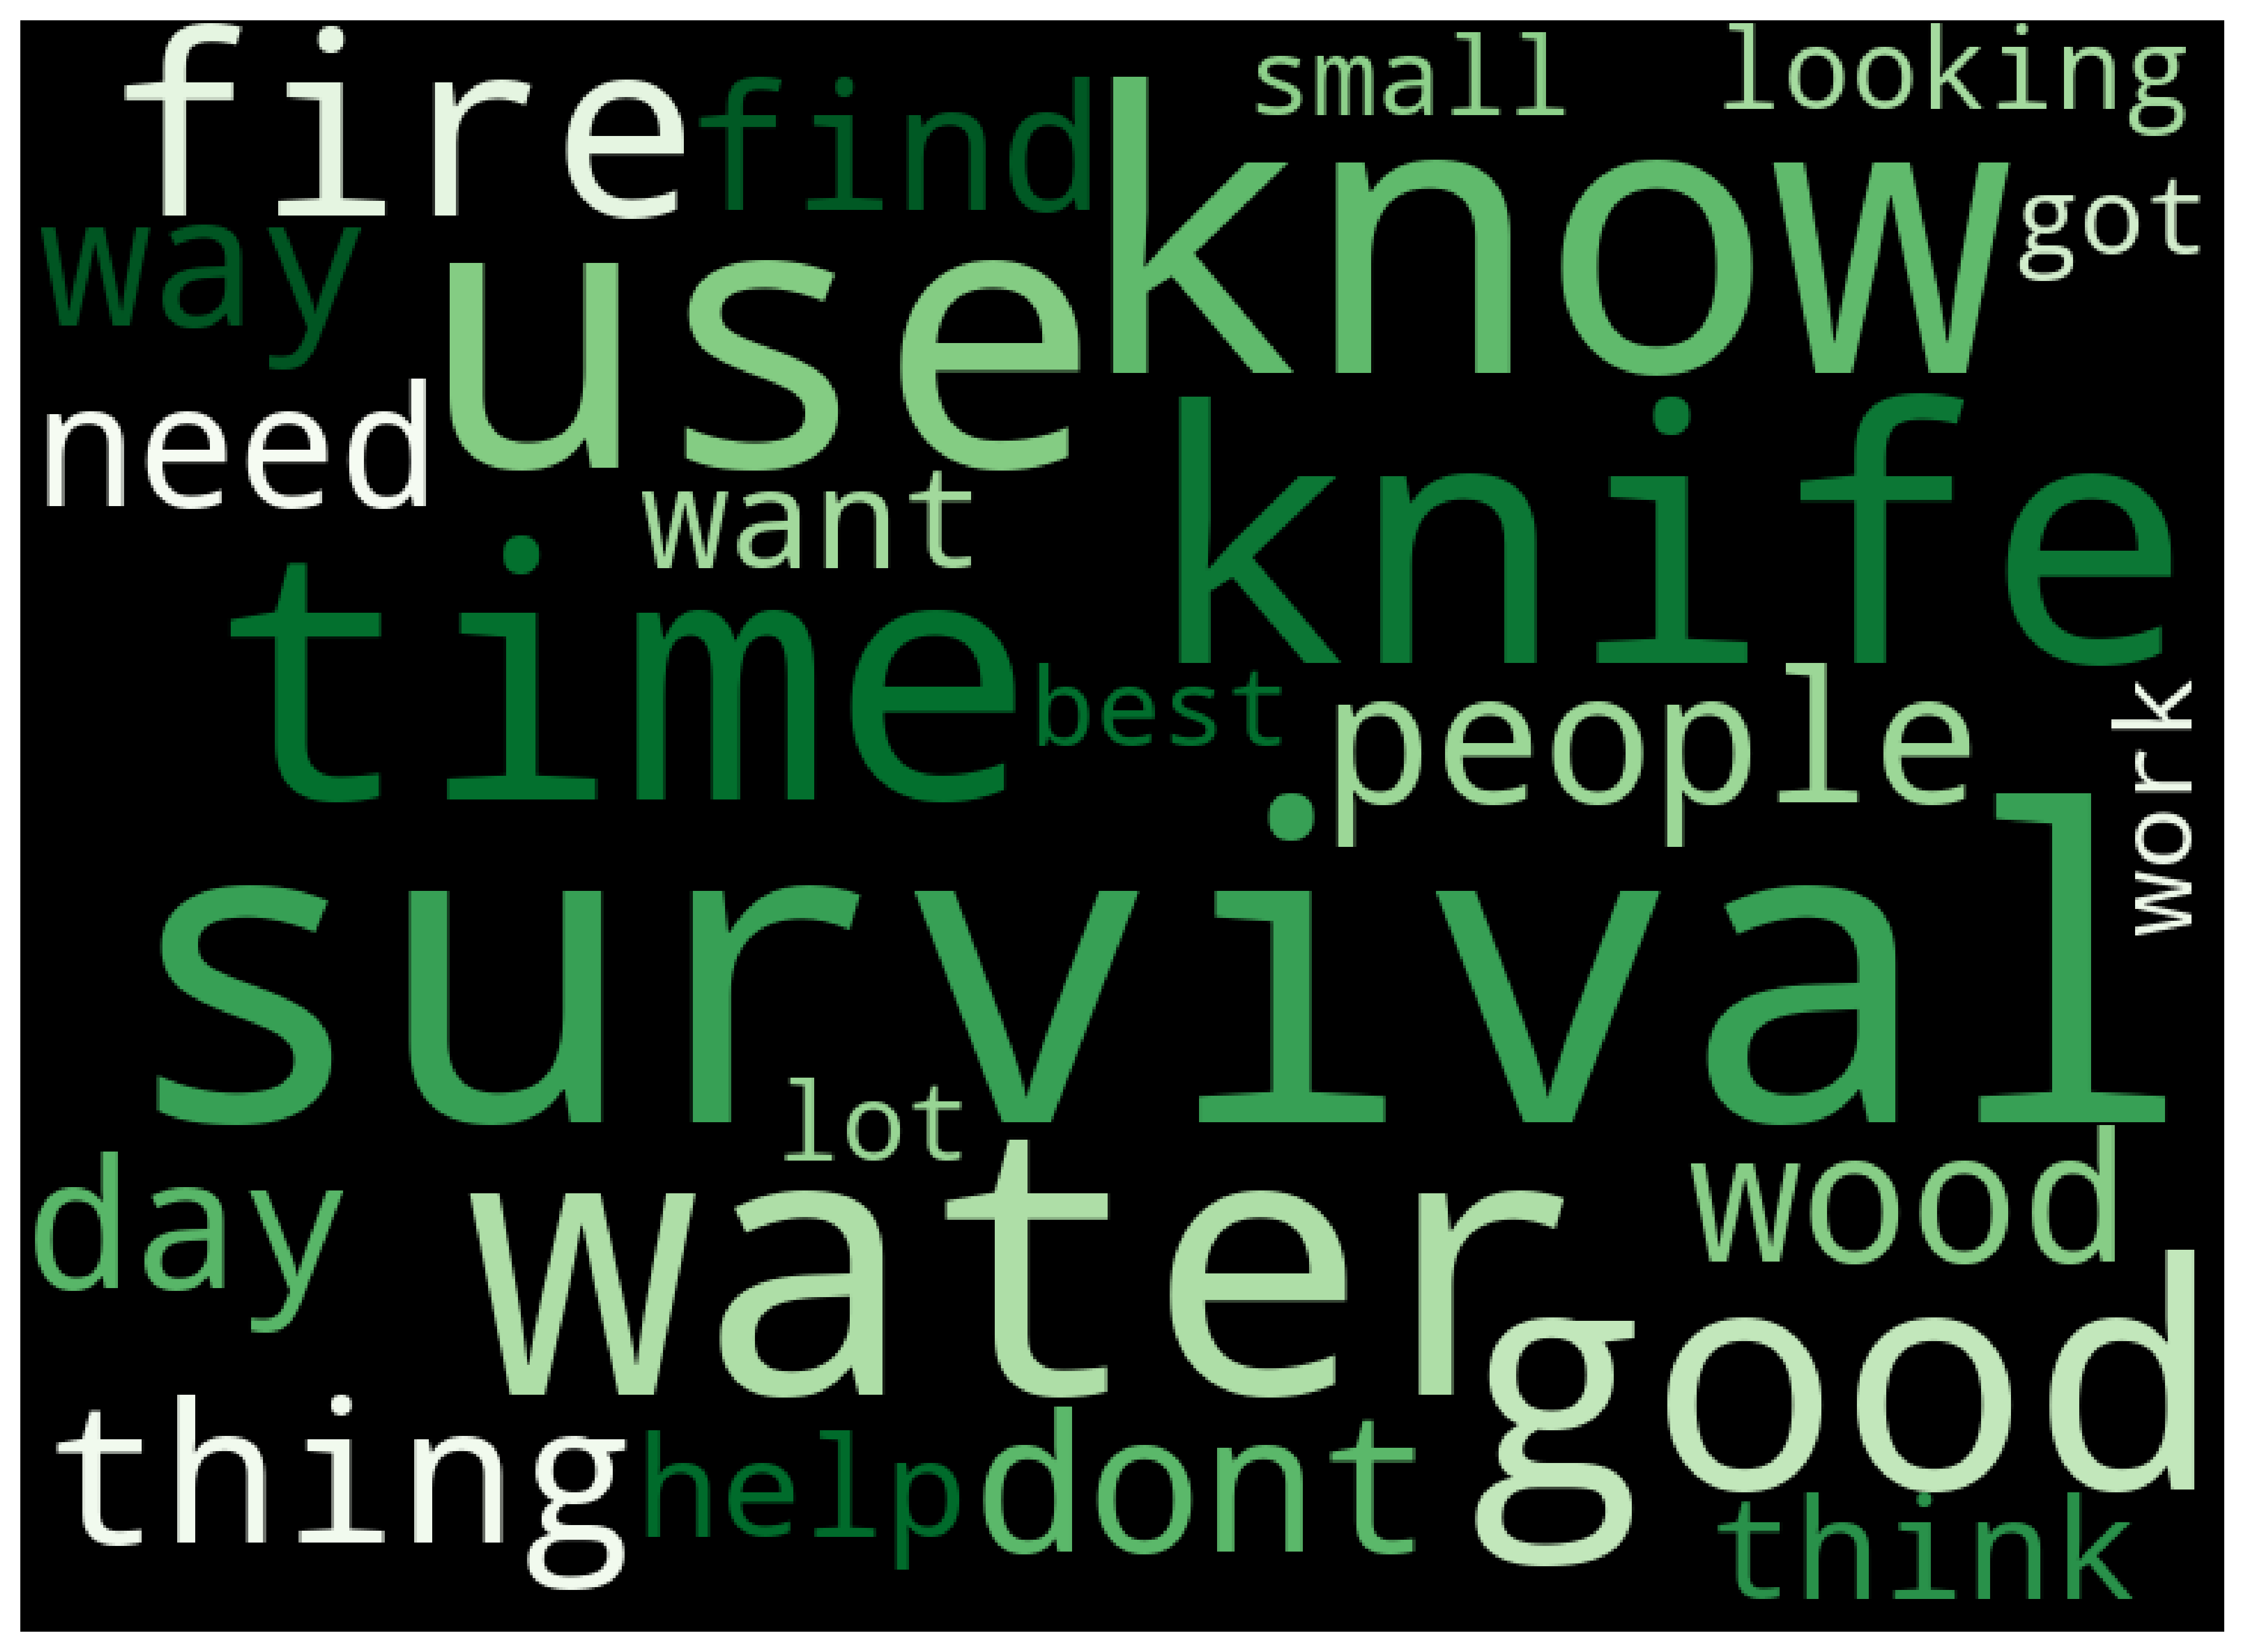

In [94]:
wc = WordCloud(max_words= 25,
                      width = 744, 
                      height = 544,
                      background_color ='black', 
                      contour_width=3, 
                      colormap= 'Greens',
                      min_font_size = 10).generate(' '.join(dfbush['cleaned_title_body_str'])) 
                
plt.figure(figsize = (14, 14)) 
plt.imshow(wc, interpolation="bilinear")
plt.imshow(wc) 
plt.axis("off");

#### Unique User Count

In [95]:
dfbush['id'].nunique()

1738

In [96]:
(dfbush['id'].value_counts() == 1).sum()
#2135 users have posted once

1353

In [97]:
(dfbush['id'].value_counts() == 2).sum()
#444 users have posted twice

315

## EDA Witches & Survivalists

In [98]:
df.dtypes

title                           object
id                              object
created                        float64
body                            object
subreddit                       object
title_body_no_punc_list         object
cleaned_title_body_list         object
num_subreddit                    int64
cleaned_title_body_str          object
title_body_no_punc_str          object
title_body_length                int64
title_body_word_count            int64
title_body_clean_word_count      int64
dtype: object

In [99]:
df[['body','subreddit','cleaned_title_body_str','title_body_no_punc_str']] \
    .describe(include=np.object) 

body subreddit  \
count   4413      4413   
unique  2085         2   
top        .    spells   
freq    1207      2220   

                                                                                                                                                                                                                   cleaned_title_body_str  \
count                                                                                                                                                                                                                                4413   
unique                                                                                                                                                                                                                               3016   
top     discord server spell magick𝓢𝓮𝓻𝓹𝓮𝓷𝓽𝓼 𝓟𝓪𝓼𝓼 platform people create apart community created spiritual community lenient moderation ton different channel communicate server talk spirituality astrology divination paganism link join   
freq                                                                                                                                                                                                                                    6   

                                                                                                                                                                                                                                                                                                                     title_body_no_punc_str  
count                                                                                                                                                                                                                                                                                                                                  4413  
unique                                                                                                                                                                                                                                                                                                                                 3017  
top     discord server for spells and magick𝓢𝓮𝓻𝓹𝓮𝓷𝓽𝓼 𝓟𝓪𝓼𝓼 is a platform where people can create and be apart of communities ive created a spiritual community with lenient moderation and tons of different channels to communicate in in my server we talk about spirituality astrology divination paganism and much more the link to join  
freq                                                                                                                                                                                                                                                                                                                                      6

In [100]:
df.describe()

created  num_subreddit  title_body_length  title_body_word_count  \
count  4.413000e+03    4413.000000        4413.000000            4413.000000   
mean   1.566830e+09       0.496941         470.225697              90.146159   
std    5.786514e+07       0.500047         847.289274             161.472195   
min    1.232066e+09       0.000000          15.000000               3.000000   
25%    1.572858e+09       0.000000         126.000000              24.000000   
50%    1.590839e+09       0.000000         260.000000              50.000000   
75%    1.596620e+09       1.000000         525.000000             101.000000   
max    1.603251e+09       1.000000       22419.000000            4156.000000   

       title_body_clean_word_count  
count                  4413.000000  
mean                     39.152731  
std                      71.204682  
min                       3.000000  
25%                      11.000000  
50%                      22.000000  
75%                      42.000000  
max                    1915.000000

#### Vectorizing text

In [101]:
from sklearn.feature_extraction.text import CountVectorizer

In [102]:
body = df['cleaned_title_body_str']

cv = CountVectorizer()

body_cv = cv.fit_transform(body)

print(cv.get_feature_names()[:10])

['000', '001', '015', '01oct2016', '025', '030', '041', '046', '060', '0600']


In [103]:
body_df = pd.DataFrame(body_cv.todense(), columns=cv.get_feature_names())

#### Most common words

In [104]:
body_df.sum().sort_values(ascending=False).head(50)

spell       3617
like        1600
know        1475
help        1398
want        1192
dont        1039
survival    1001
time         984
love         879
need         856
thing        841
good         829
use          760
work         719
someone      717
water        701
day          690
way          671
people       665
feel         606
year         587
think        578
find         572
fire         559
life         527
candle       520
person       511
looking      500
friend       499
new          480
energy       472
guy          418
going        402
sure         395
knife        386
best         386
lot          382
got          380
bear         373
cant         368
right        358
little       356
place        352
thought      349
let          345
away         343
long         336
jar          327
come         322
trying       313
dtype: int64

In [105]:
body_df.sum().sort_values(ascending=False).head(50)

spell       3617
like        1600
know        1475
help        1398
want        1192
dont        1039
survival    1001
time         984
love         879
need         856
thing        841
good         829
use          760
work         719
someone      717
water        701
day          690
way          671
people       665
feel         606
year         587
think        578
find         572
fire         559
life         527
candle       520
person       511
looking      500
friend       499
new          480
energy       472
guy          418
going        402
sure         395
knife        386
best         386
lot          382
got          380
bear         373
cant         368
right        358
little       356
place        352
thought      349
let          345
away         343
long         336
jar          327
come         322
trying       313
dtype: int64

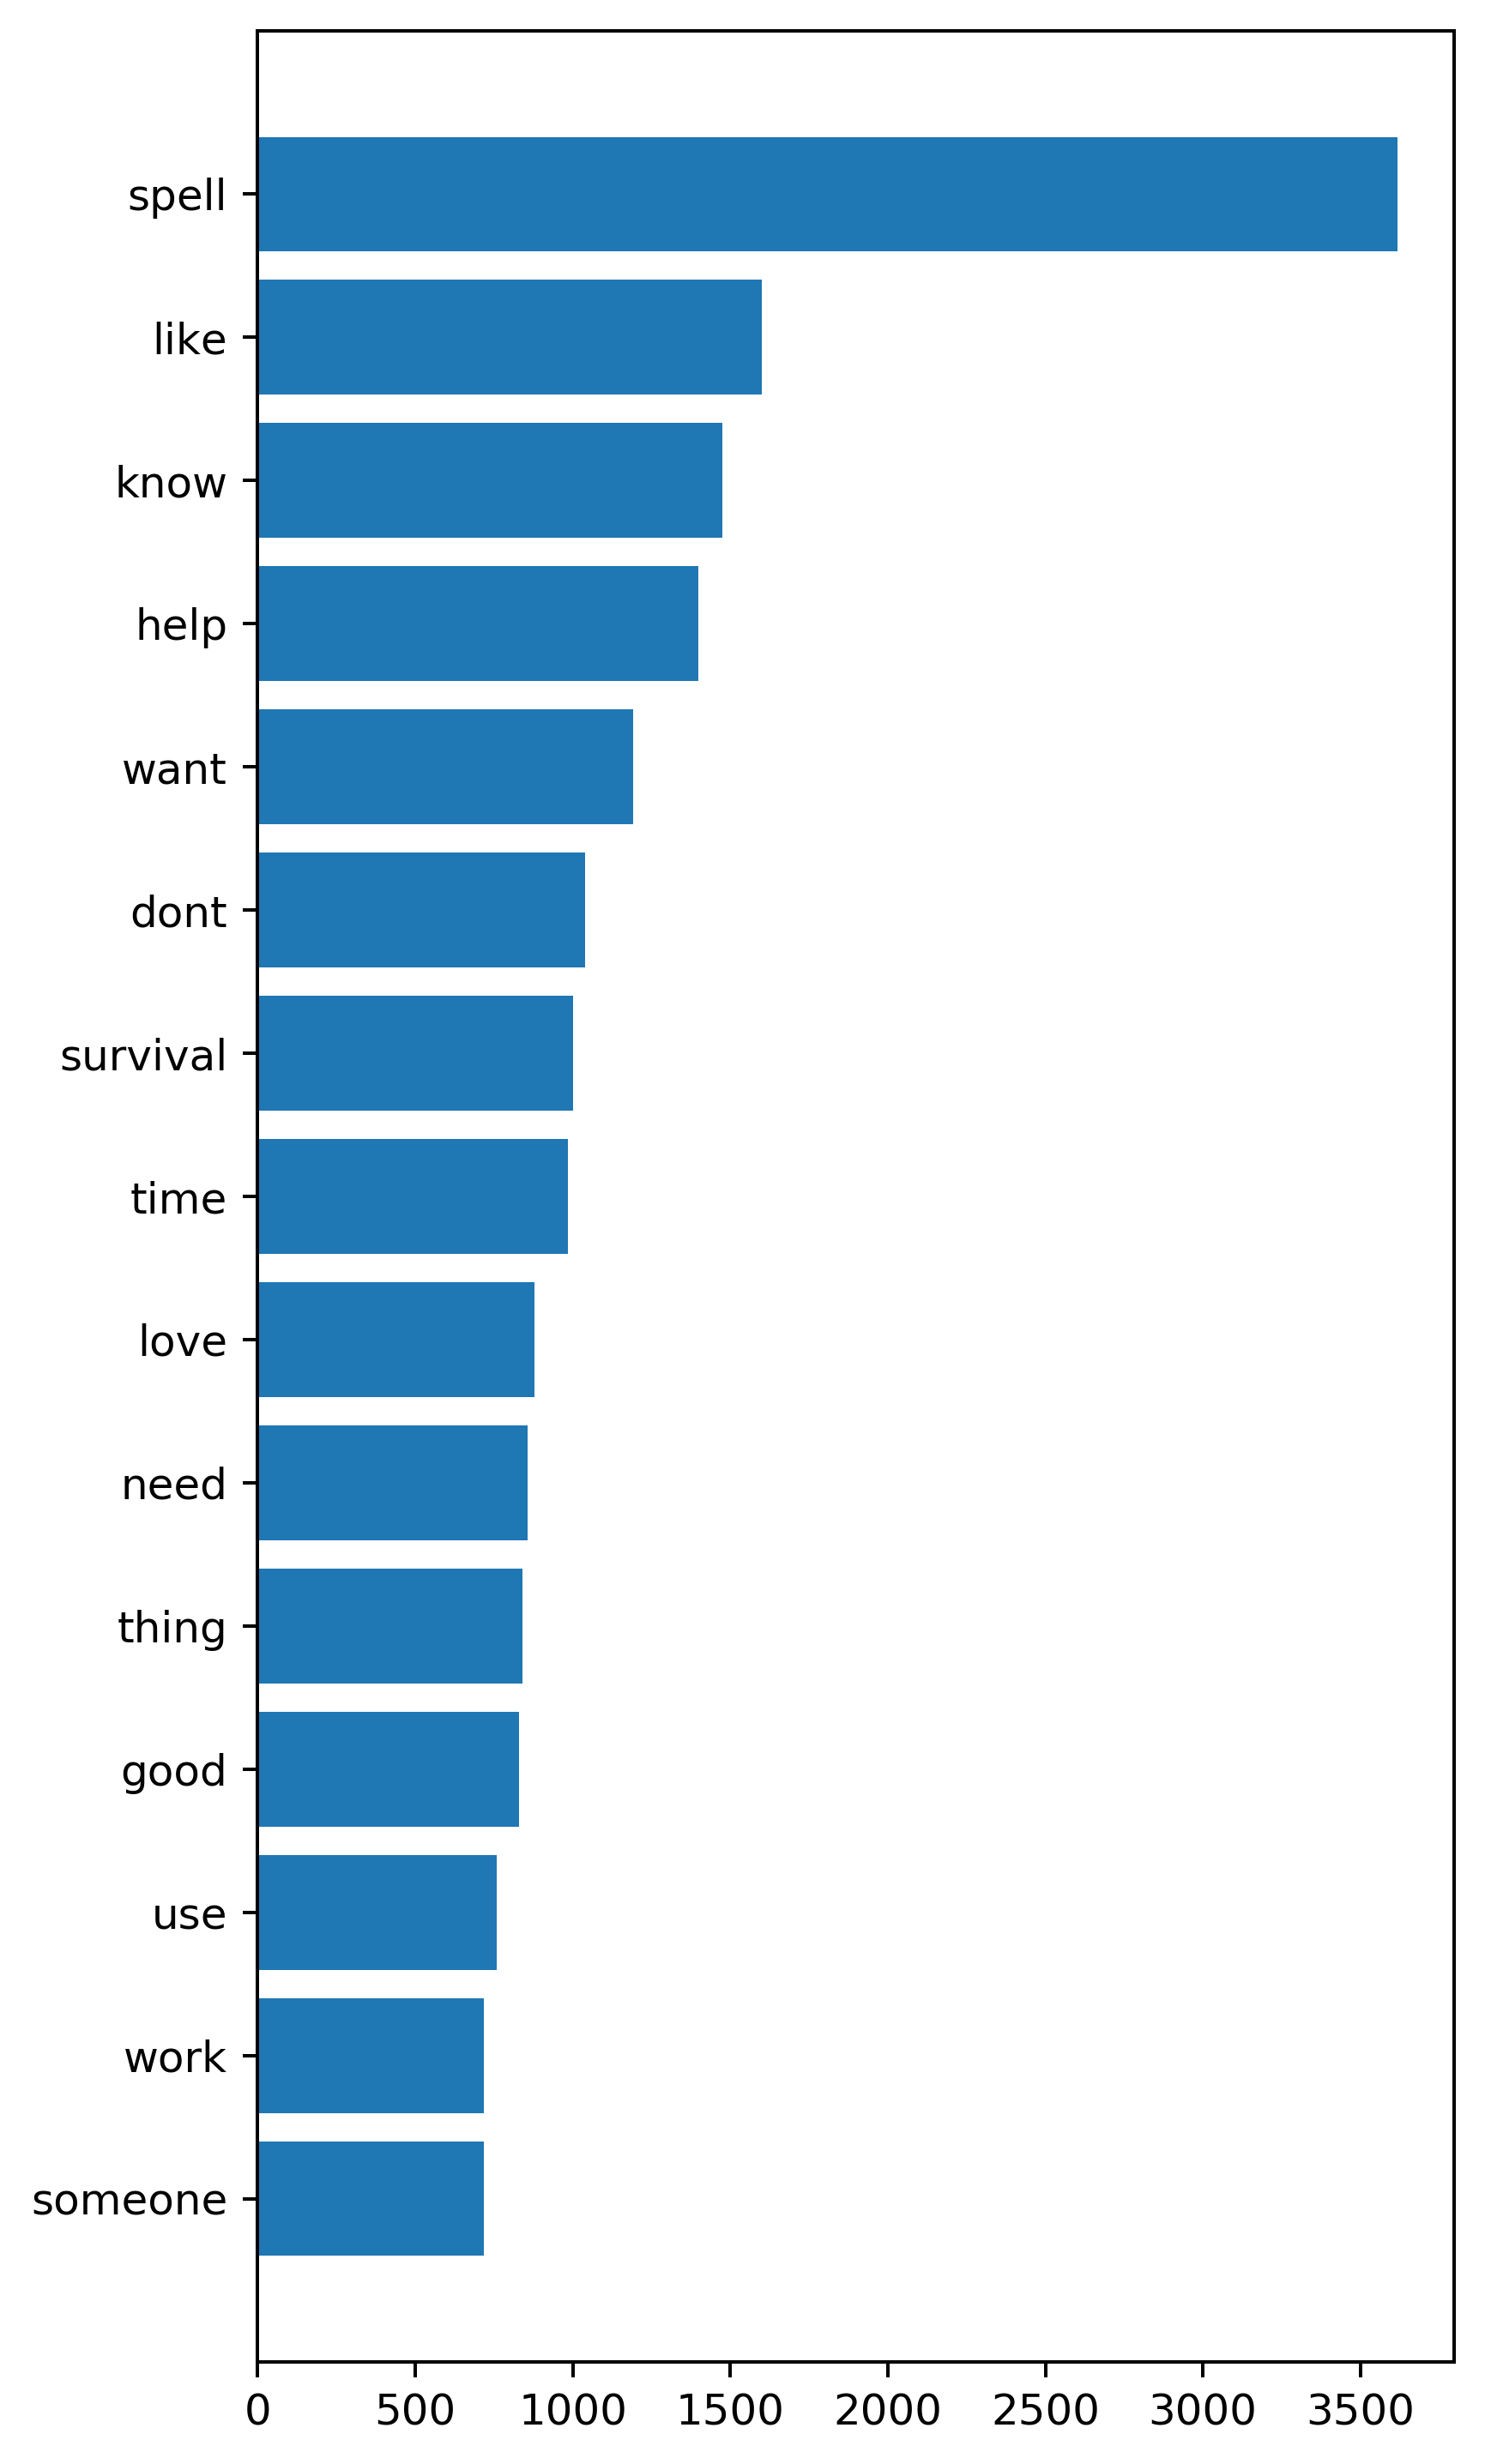

In [106]:
features_rank = list(zip(cv.get_feature_names(), [x[0] for x in body_cv.sum(axis=0).T.tolist()]))

features_rank = np.array(sorted(features_rank, key=lambda x:x[1], reverse=True))

n = 15
plt.figure(figsize=(5, 10))
plt.barh(-np.arange(n), features_rank[:n, 1].astype(float), height=.8)
plt.yticks(ticks=-np.arange(n), labels=features_rank[:n, 0]);

#https://stackoverflow.com/questions/59340203/how-to-draw-bar-plot-of-30-most-common-words-found-in-fake-news-in-jupyter-noteb

In [107]:
aggregate_counter = Counter()
for row_index,row in df.iterrows():
    c = Counter(row['cleaned_title_body_str'].split())
    aggregate_counter += c

common_words_all = [word[0] for word in aggregate_counter.most_common(50)]
common_words_counts_all = [word[1] for word in aggregate_counter.most_common(50)]

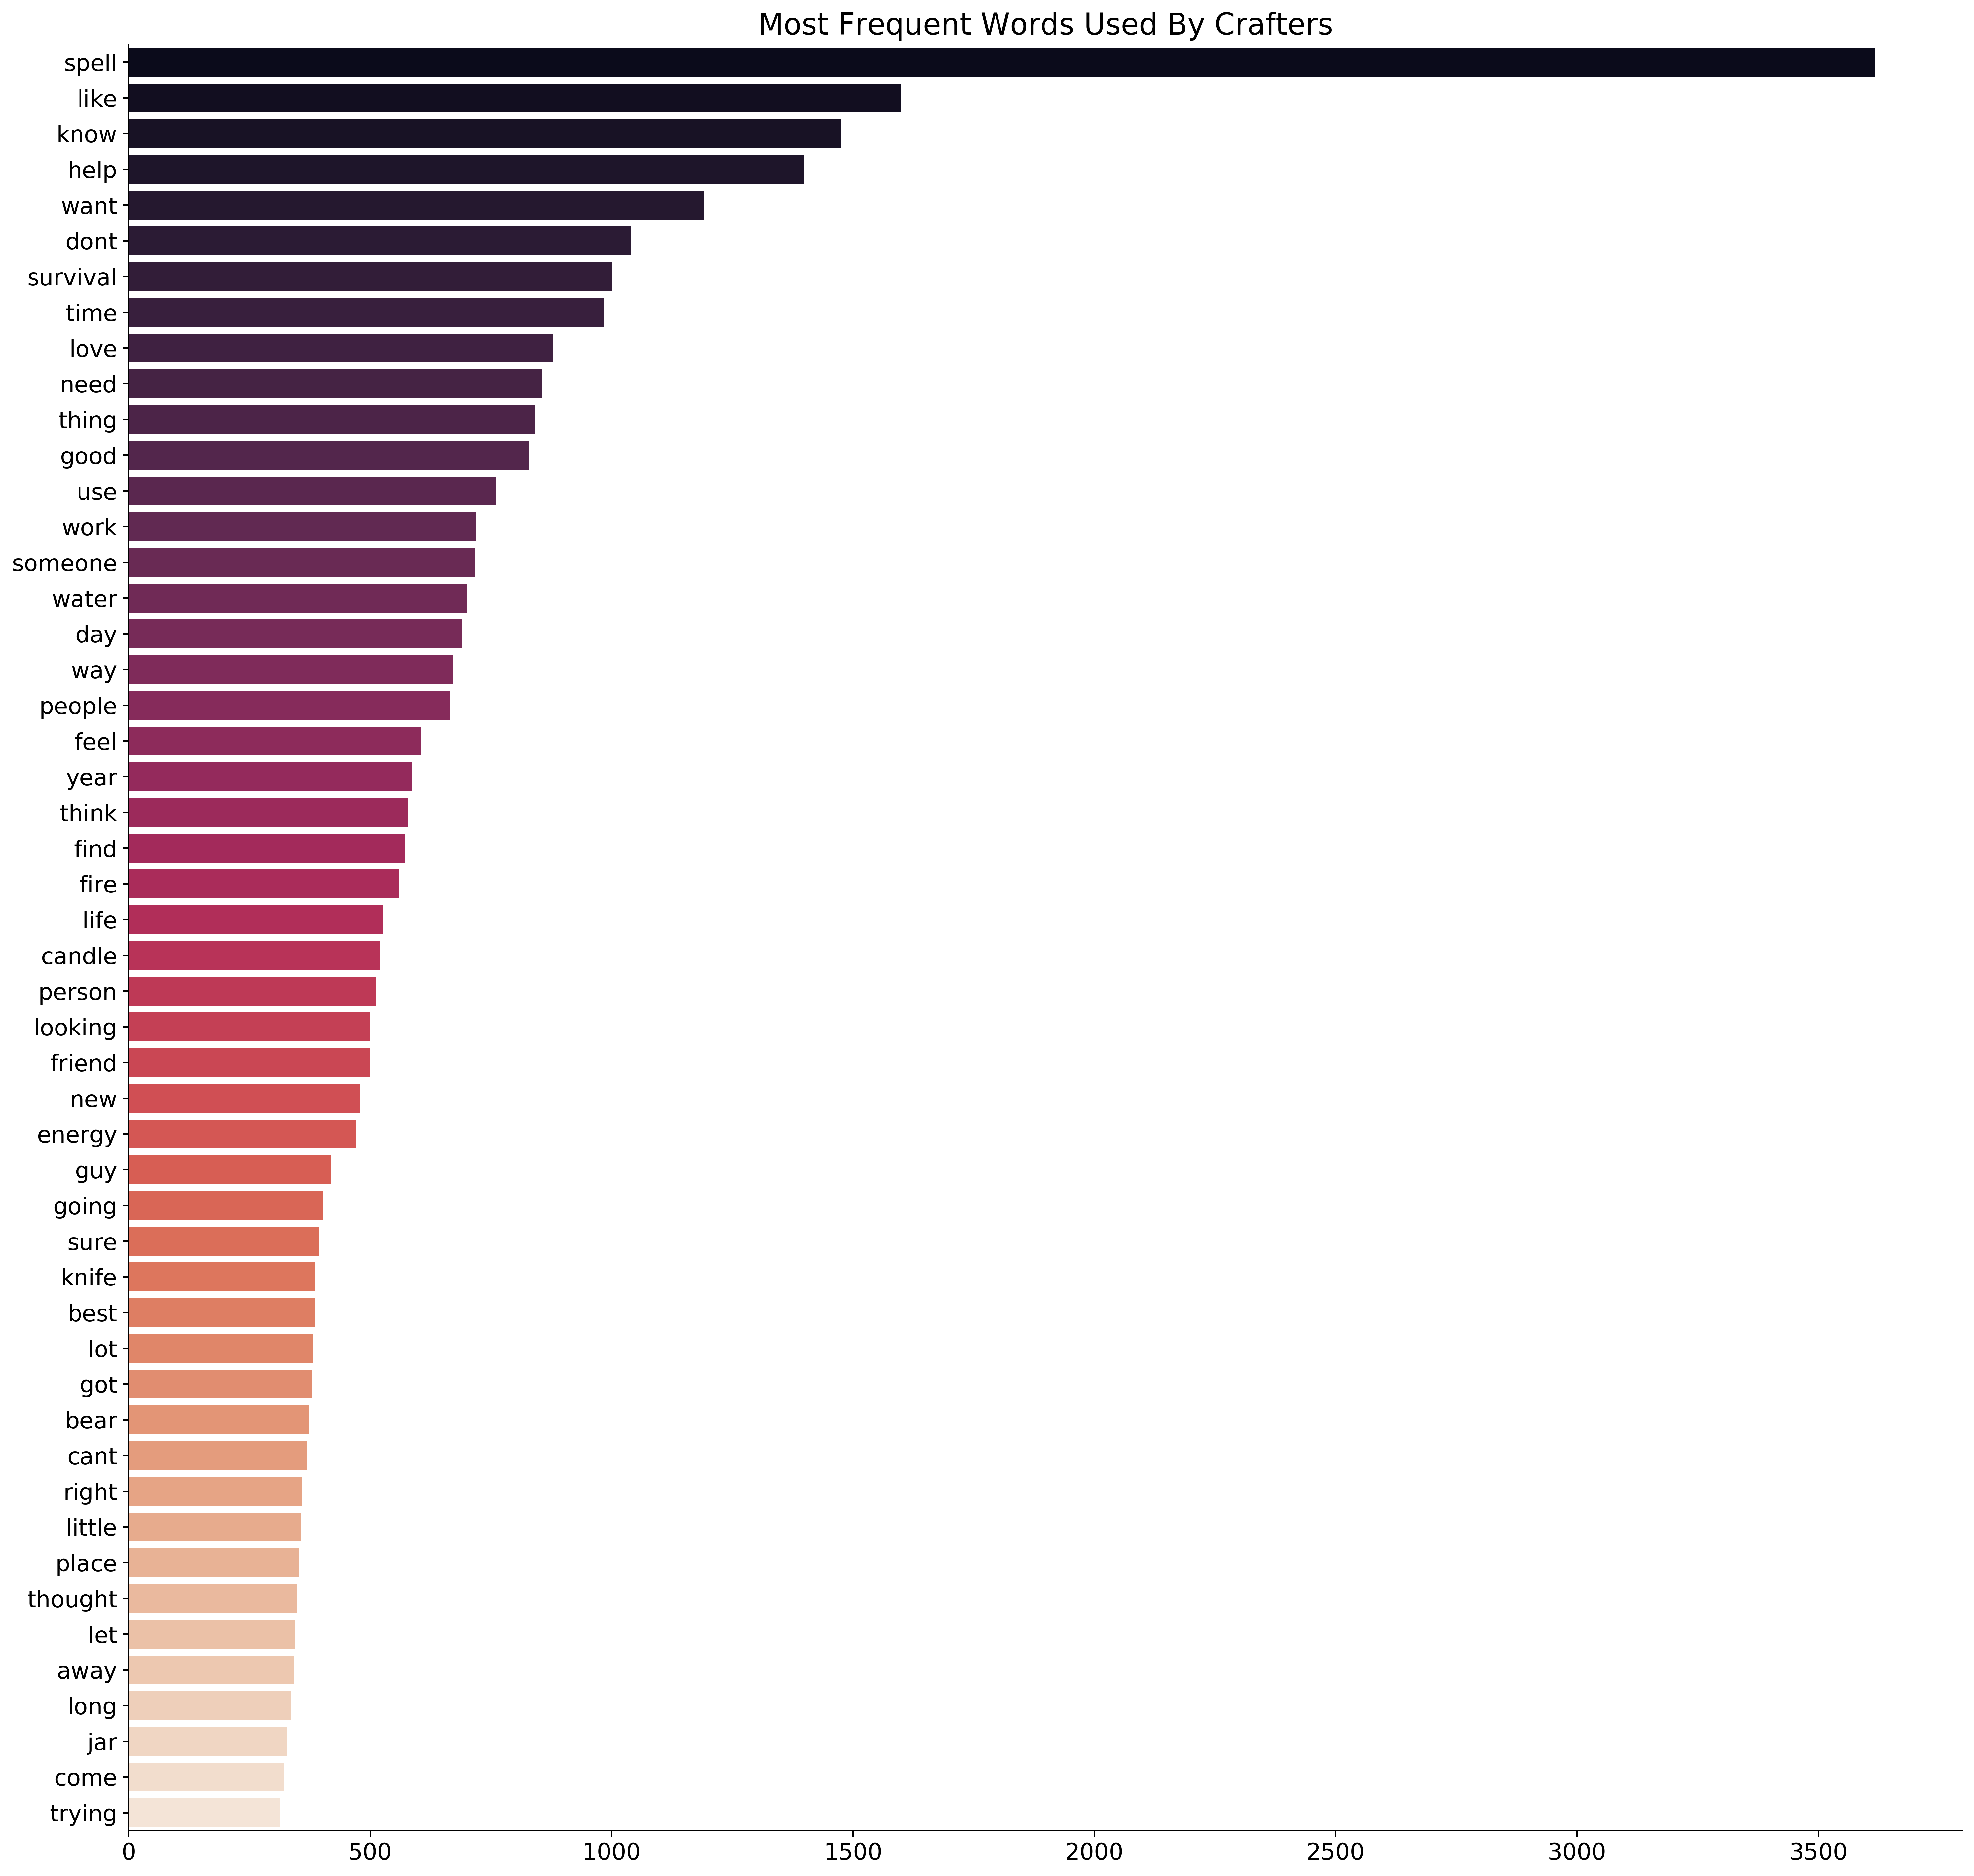

In [108]:
barplot(words=common_words_all, words_counts=common_words_counts_all, title='Most Frequent Words Used By Crafters', gpallet = 'rocket')

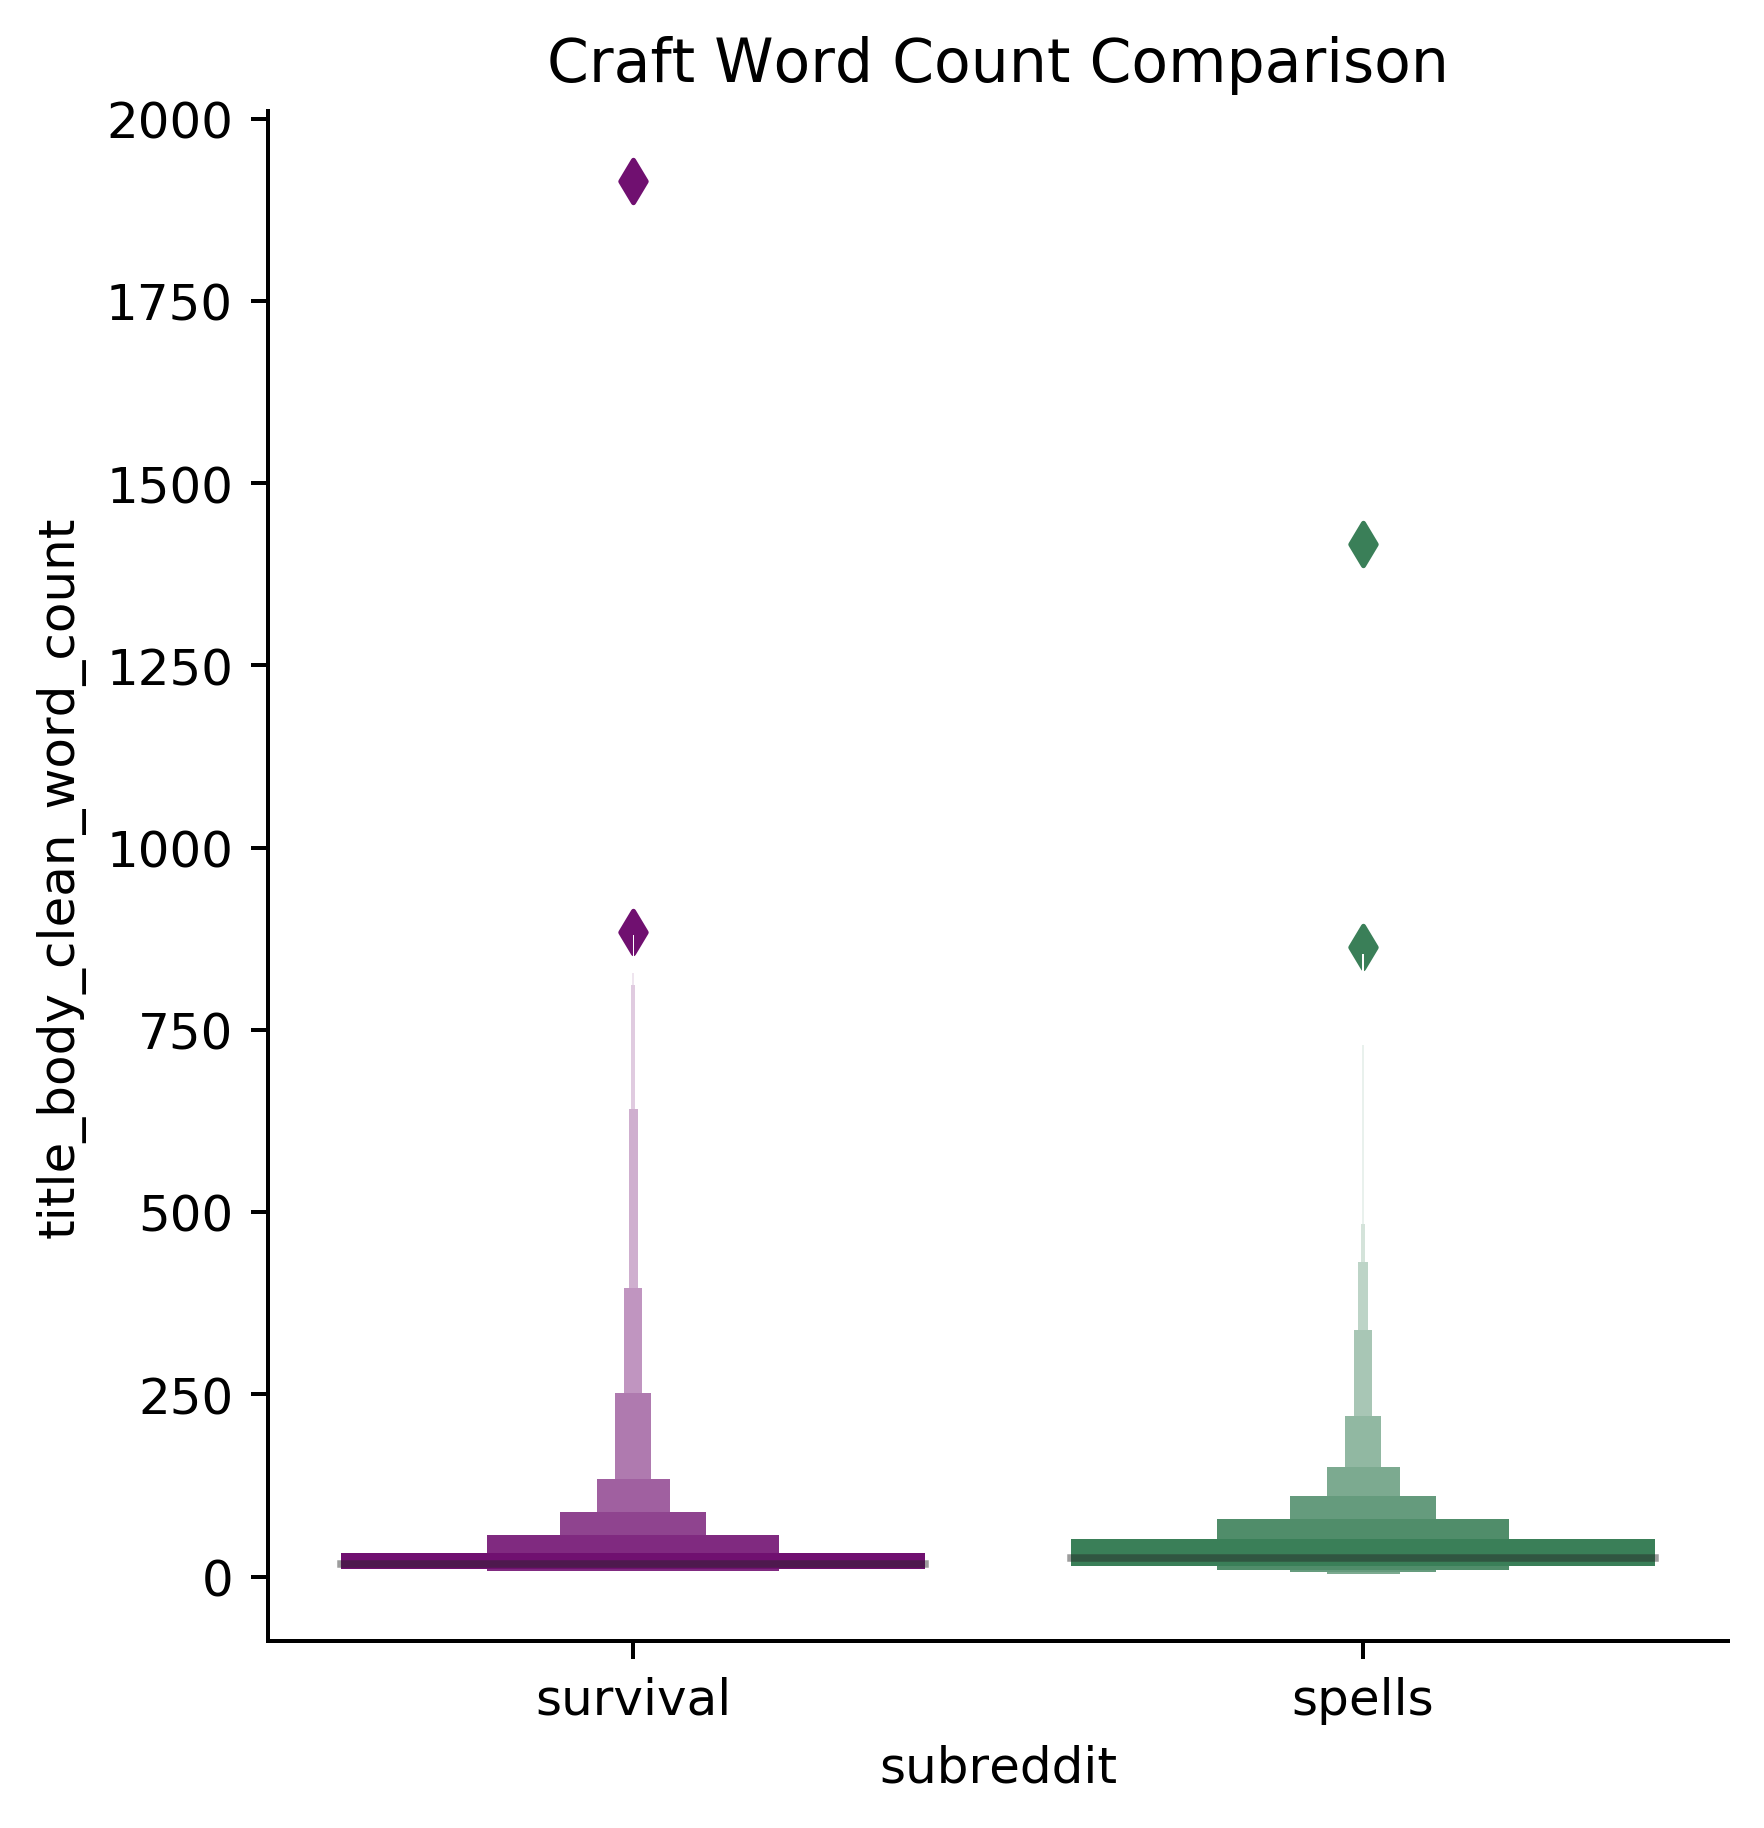

In [109]:
sns.catplot(x= 'subreddit', y= 'title_body_clean_word_count', palette=sns.color_palette(['purple', 'seagreen']), data = df, kind='boxen');

    
plt.title('Craft Word Count Comparison');
plt.show();

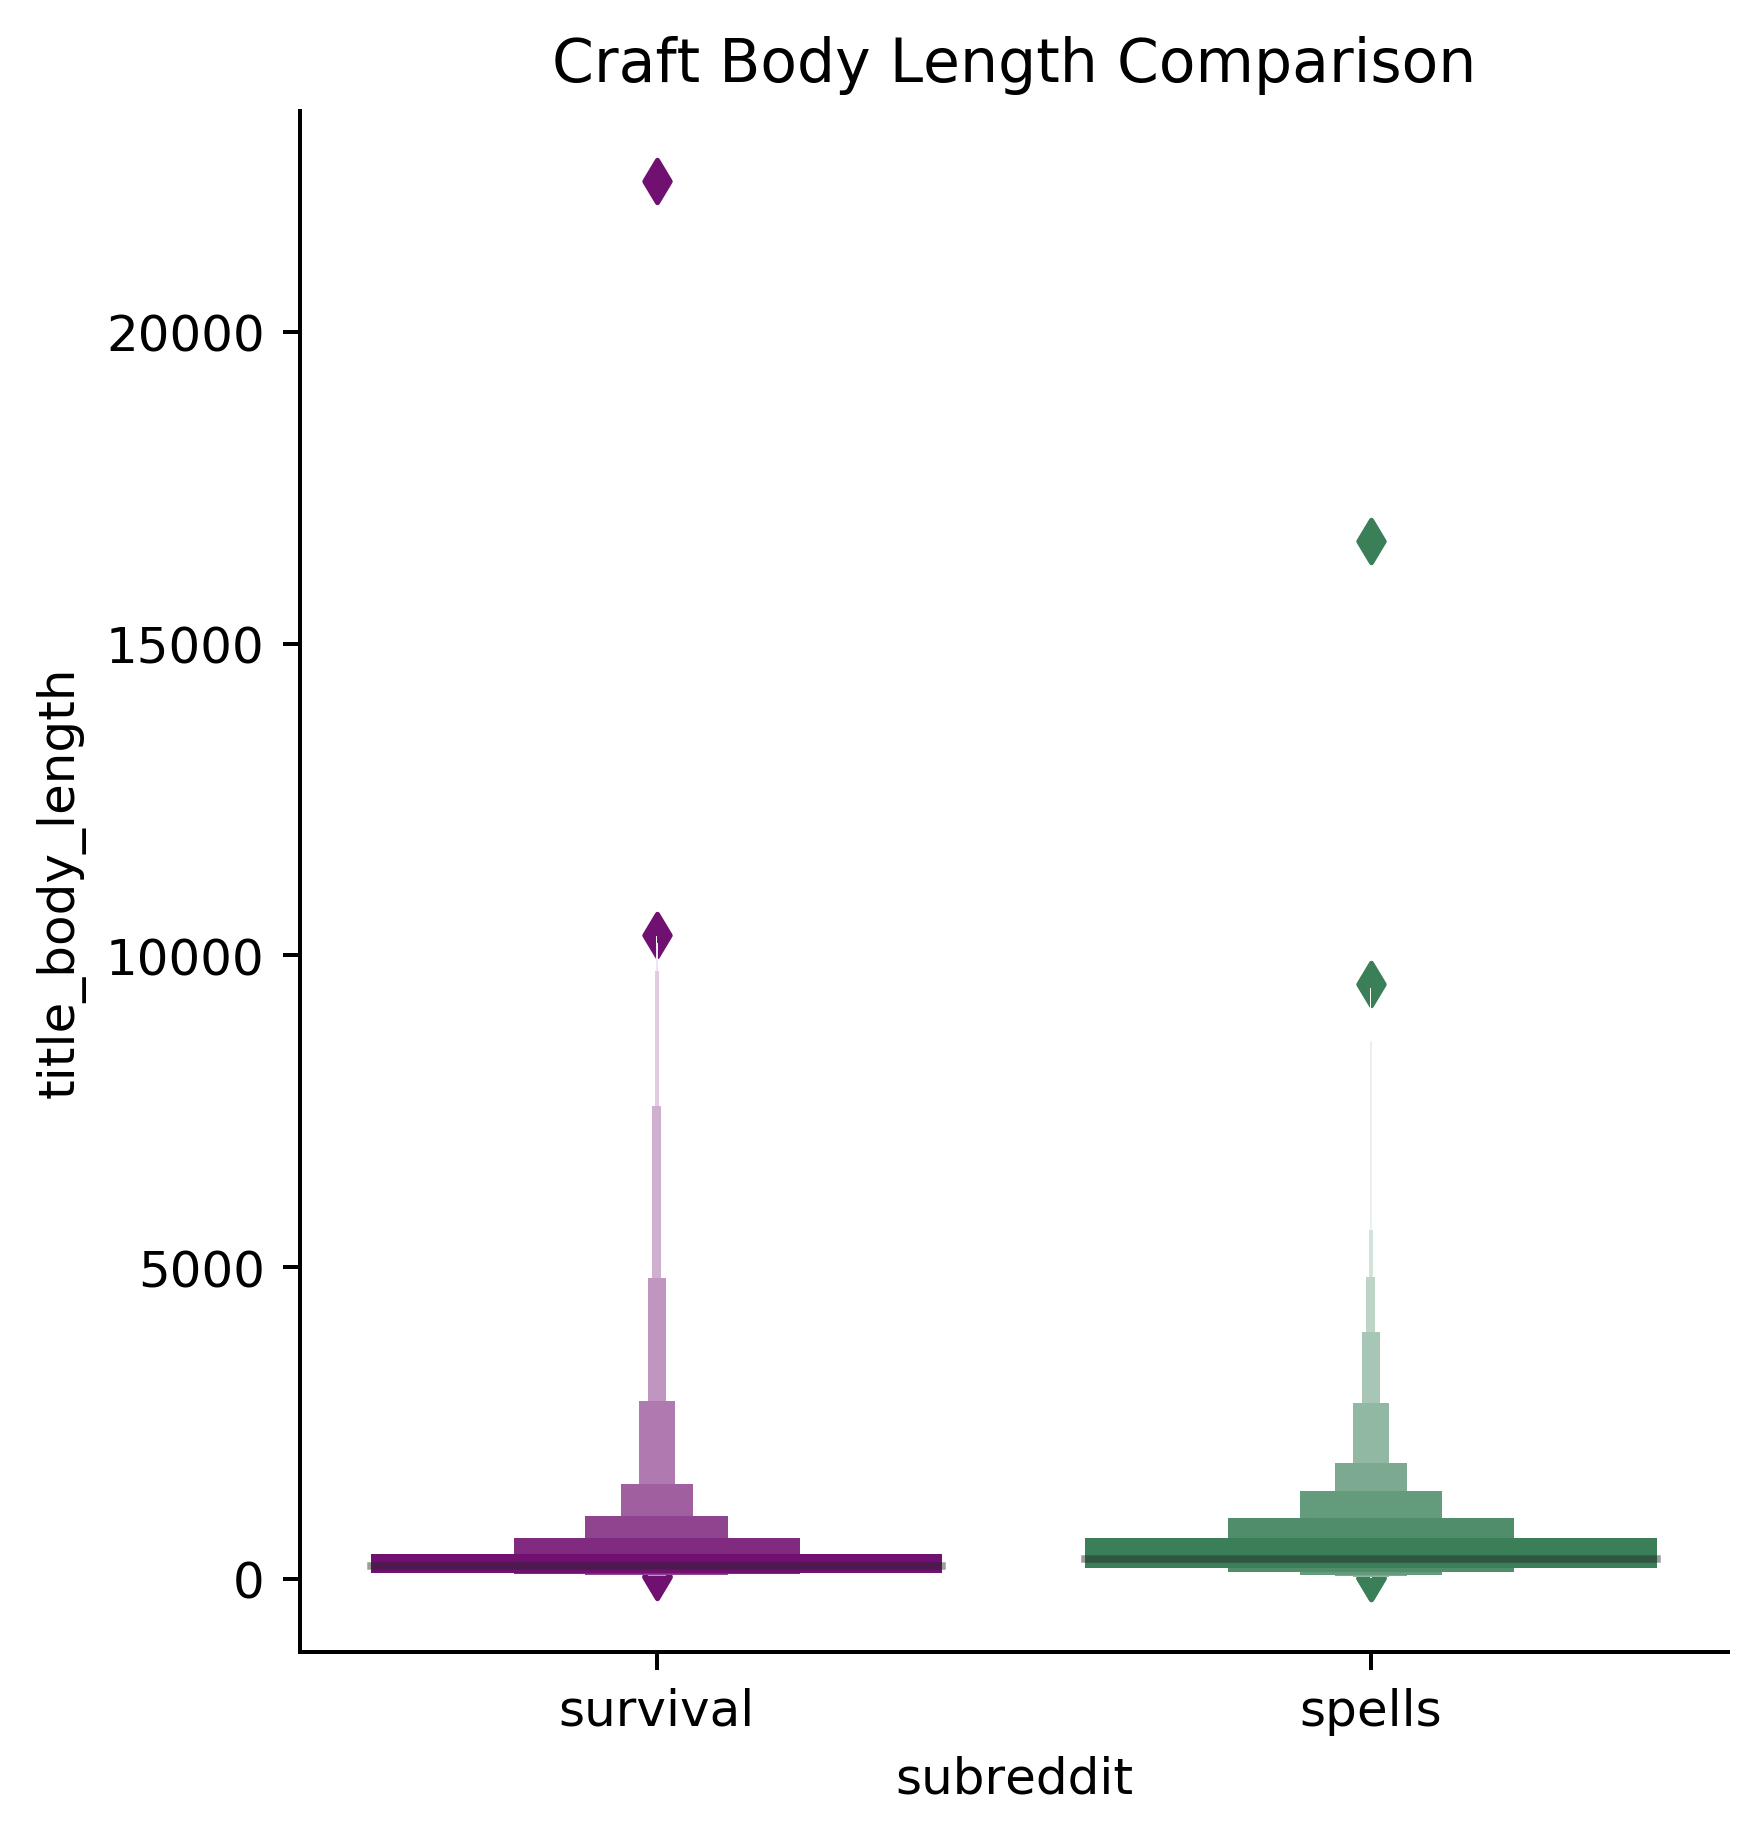

In [110]:
sns.catplot(x= 'subreddit', y= 'title_body_length', palette=sns.color_palette(['purple', 'seagreen']), data = df, kind='boxen');

    
plt.title('Craft Body Length Comparison');
plt.show();

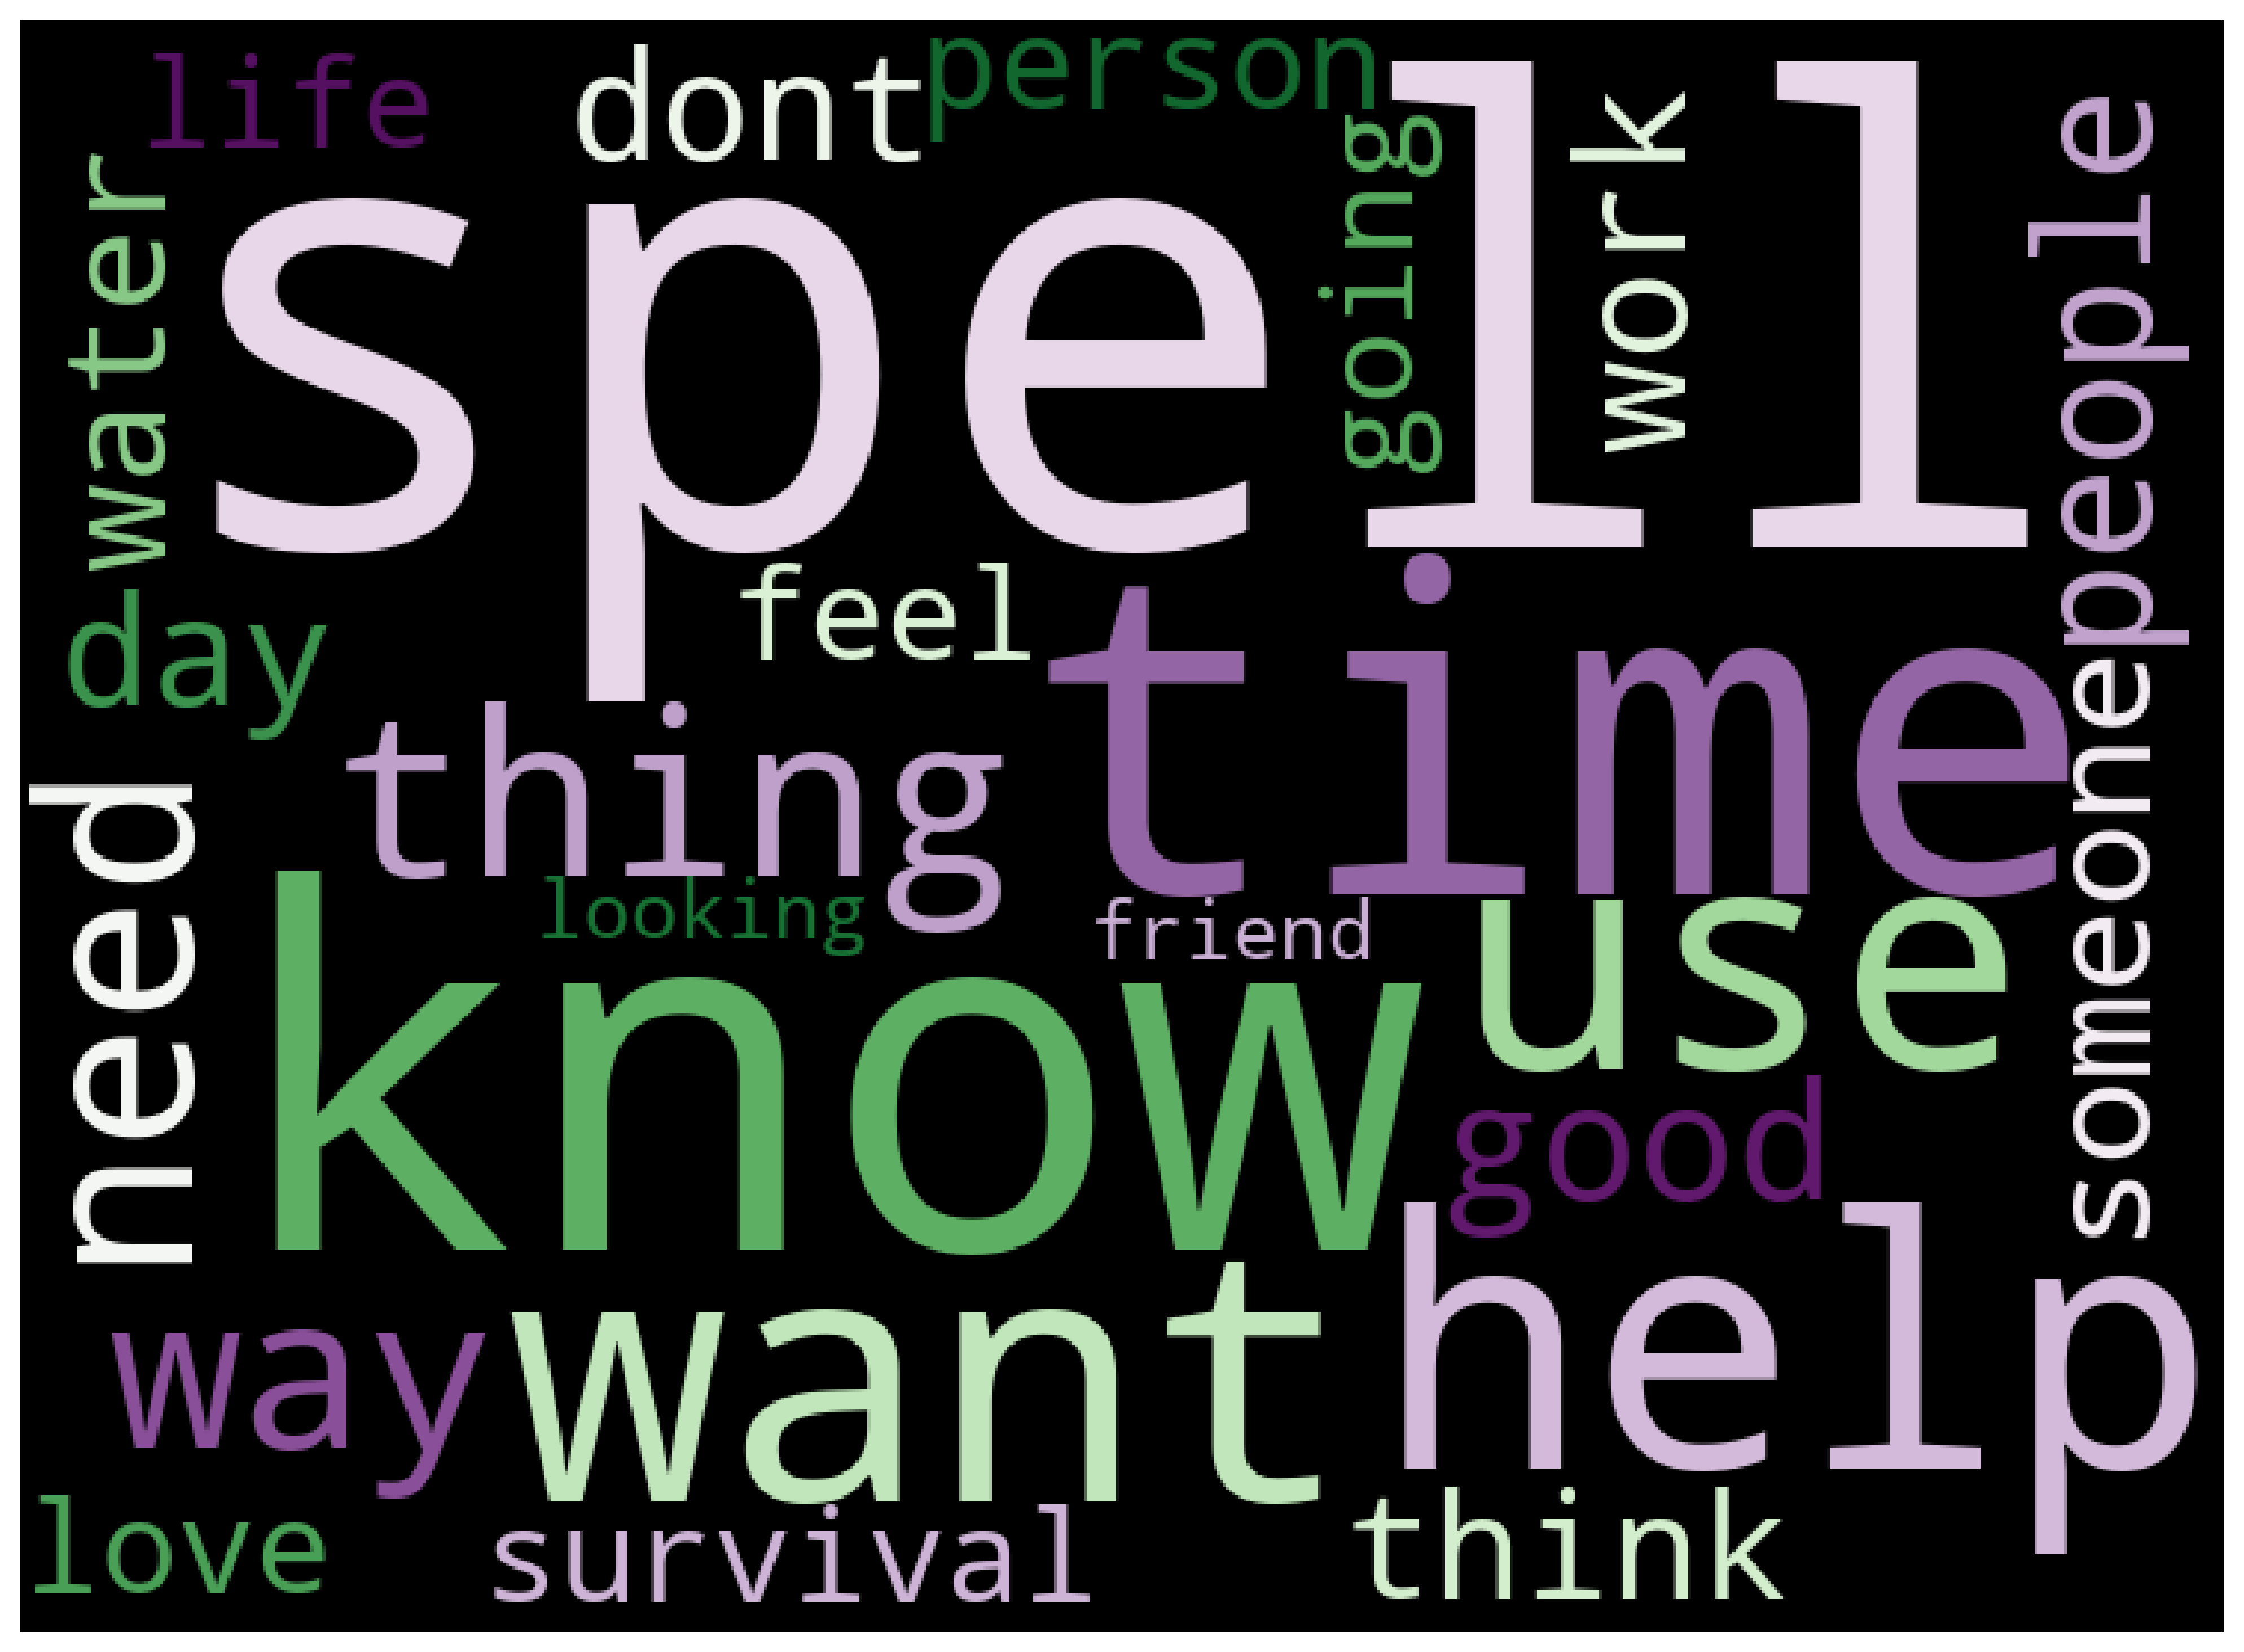

In [111]:
wc = WordCloud(max_words= 25,
                      width = 744, 
                      height = 544,
                      background_color ='black', 
                      contour_width=3, 
                      colormap= 'PRGn',
                      min_font_size = 10).generate(' '.join(df['cleaned_title_body_str'])) 

                
plt.figure(figsize = (14, 14)) 
plt.imshow(wc, interpolation="bilinear")
plt.imshow(wc) 
plt.axis("off");

#### 2nd round of stop words elleminating shared most frequent

In [112]:
stop = stopwords.words("english") 

new_new_words=('like', 'know','help', 'want','dont','time','thing','good','use',
           'work', 'day', 'way', 'people', 'year','think', 'find', 'person',
           'looking','new', 'guy', 'going', 'sure', 'lot', 'got','little', 
           'place','need',)

for i in new_new_words:
    stop.append(i)


#Code inspiration from:
#https://medium.com/@tusharsri/remove-add-stop-words-7e2994c19c67

In [113]:
def stopw(words):
    
    stop_words = [item for item in words if item not in stop]
    
    return stop_words

df['title_body_stop2_list']= df['cleaned_title_body_list'].apply(stopw)
#df['cbodyST']= df['cbody'].apply(stopw)
#df['ctitleST']= df['ctitle'].apply(stopw)

In [114]:
df['title_body_stop2_str'] = df['title_body_stop2_list'].apply(lambda x: ','.join(map(str, x)))
df['title_body_stop2_str'] = df['title_body_stop2_str'].str.replace(","," ")

In [115]:
aggregate_counter = Counter()
for row_index,row in df.iterrows():
    c = Counter(row['title_body_stop2_str'].split())
    aggregate_counter += c

common_words_all = [word[0] for word in aggregate_counter.most_common(50)]
common_words_counts_all = [word[1] for word in aggregate_counter.most_common(50)]

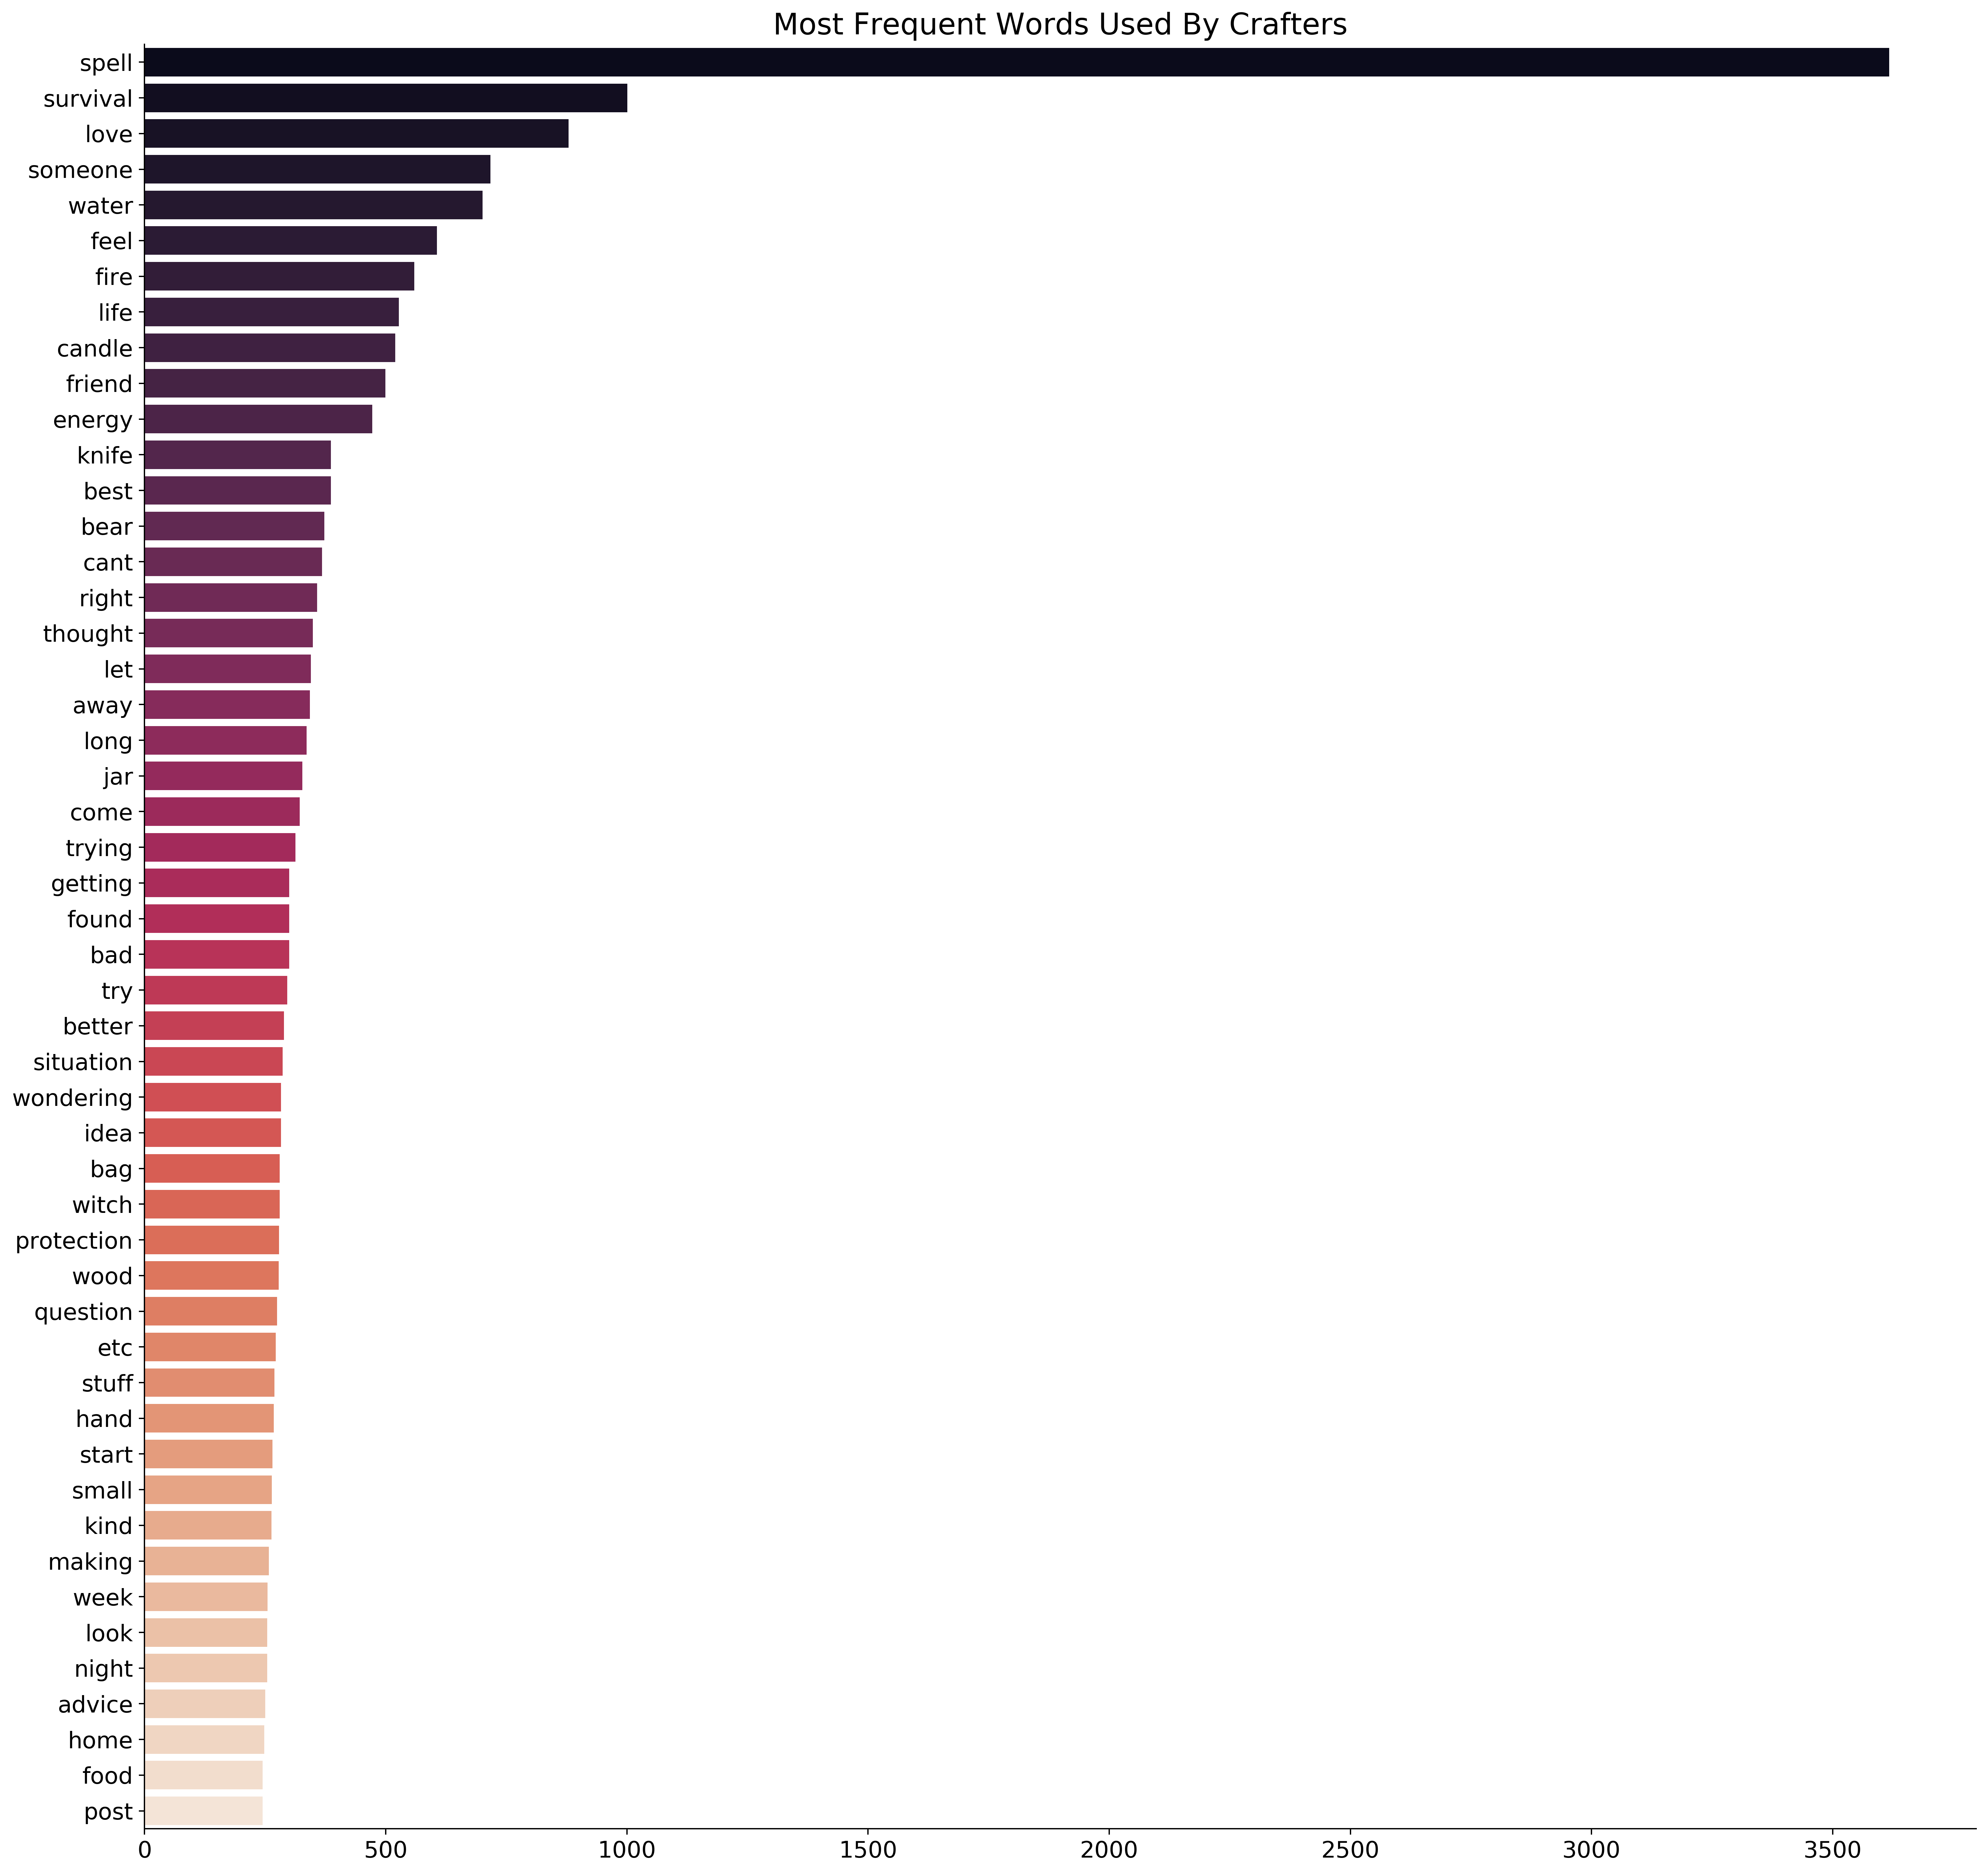

In [116]:
barplot(words=common_words_all, words_counts=common_words_counts_all, title='Most Frequent Words Used By Crafters', gpallet = 'rocket')

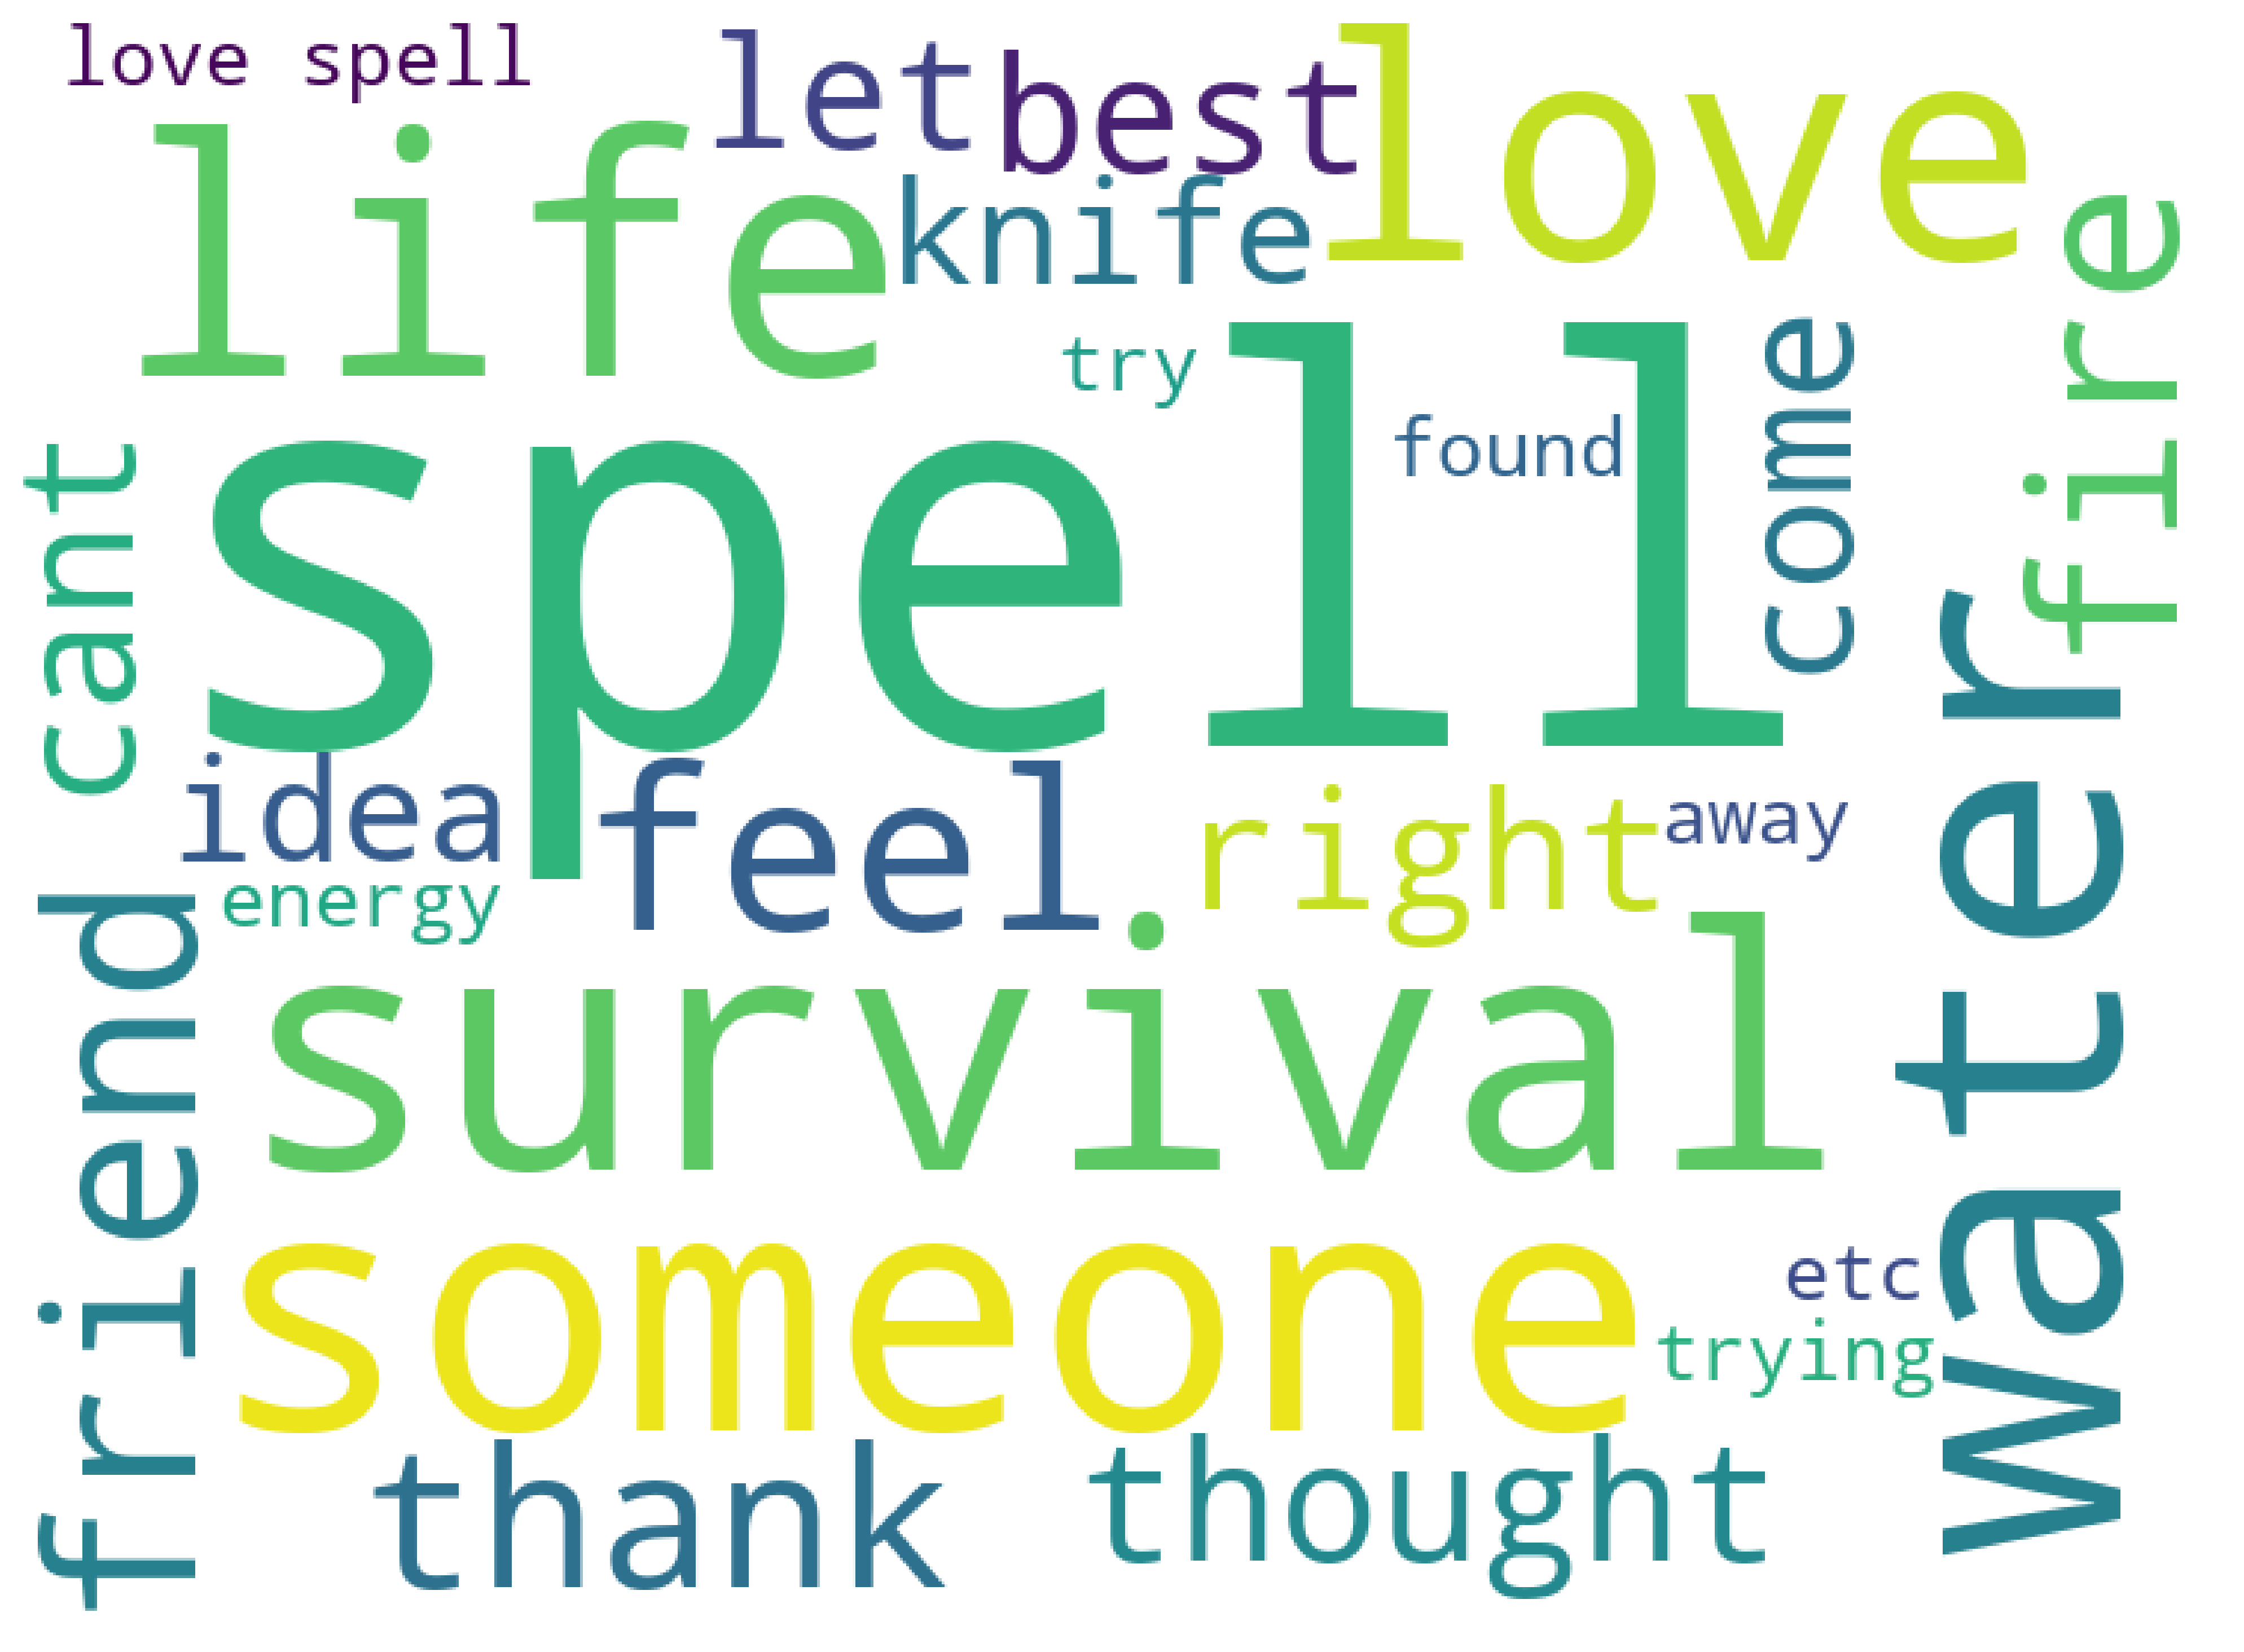

In [117]:
wc = WordCloud(max_words= 25,
                      width = 744, 
                      height = 544,
                      background_color ='white', 
                      contour_width=3, 
                      contour_color= 'green', 
                      min_font_size = 10).generate(' '.join(df['title_body_stop2_str'])) 
                
plt.figure(figsize = (14, 14)) 
plt.imshow(wc, interpolation="bilinear")
plt.imshow(wc) 
plt.axis("off");

#Code inspiration:
##https://towardsdatascience.com/create-word-cloud-into-any-shape-you-want-using-python-d0b88834bc32

In [118]:
df = df.reindex(['id','created','title','body',
            'title_body_no_punc_list','title_body_no_punc_str',
            'cleaned_title_body_list','cleaned_title_body_str',
            'title_body_stop2_list', 'title_body_stop2_str',
            'title_body_length','title_body_word_count','title_body_clean_word_count',
            'subreddit','num_subreddit',
           ],axis=1)

In [119]:
dfwitch = df[df['num_subreddit'] == 0]
dfbush = df[df['num_subreddit'] == 1]

#### Vectorizing Witch Text

In [120]:
body = dfwitch['title_body_stop2_str']

cv = CountVectorizer()

body_cv = cv.fit_transform(body)

print(cv.get_feature_names()[:10])

['10', '100', '1000', '10003000', '101', '1012', '104pm', '10ml', '11', '1130']


In [121]:
body_df_witch = pd.DataFrame(body_cv.todense(), columns=cv.get_feature_names())

In [122]:
body_df_witch.sum().sort_values(ascending=False).head(20)

spell         3617
love           784
someone        620
feel           526
candle         500
energy         450
friend         415
life           403
jar            321
witch          279
protection     264
let            253
bad            242
cant           241
right          240
cast           235
ritual         235
job            209
away           206
come           201
dtype: int64

In [141]:
body_df_witch['water'].sum()

180

In [142]:
body_df_bush['water'].sum()

521

In [144]:
body_df_witch['fire'].sum()

90

In [146]:
body_df_witch['candle'].sum()

500

In [145]:
body_df_bush['fire'].sum()

469

In [147]:
body_df_witch['jar'].sum()

321

In [148]:
body_df_bush['jar'].sum()

6

In [149]:
body_df_witch['bag'].sum()

39

In [150]:
body_df_bush['bag'].sum()

241

#### Vectorizing Survive Text

In [124]:
body = dfbush['title_body_stop2_str']

cv = CountVectorizer()

body_cv = cv.fit_transform(body)

print(cv.get_feature_names()[:10])

['000', '001', '015', '01oct2016', '025', '030', '041', '046', '060', '0600']


In [125]:
body_df_bush = pd.DataFrame(body_cv.todense(), columns=cv.get_feature_names())

In [126]:
body_df_bush.sum().sort_values(ascending=False).head(20)

survival      996
water         521
fire          469
knife         378
bear          367
wood          264
bag           241
kit           237
best          233
food          226
small         189
long          185
skill         179
thought       176
area          176
book          174
better        170
wilderness    167
found         165
situation     164
dtype: int64

#### Word Comparisons

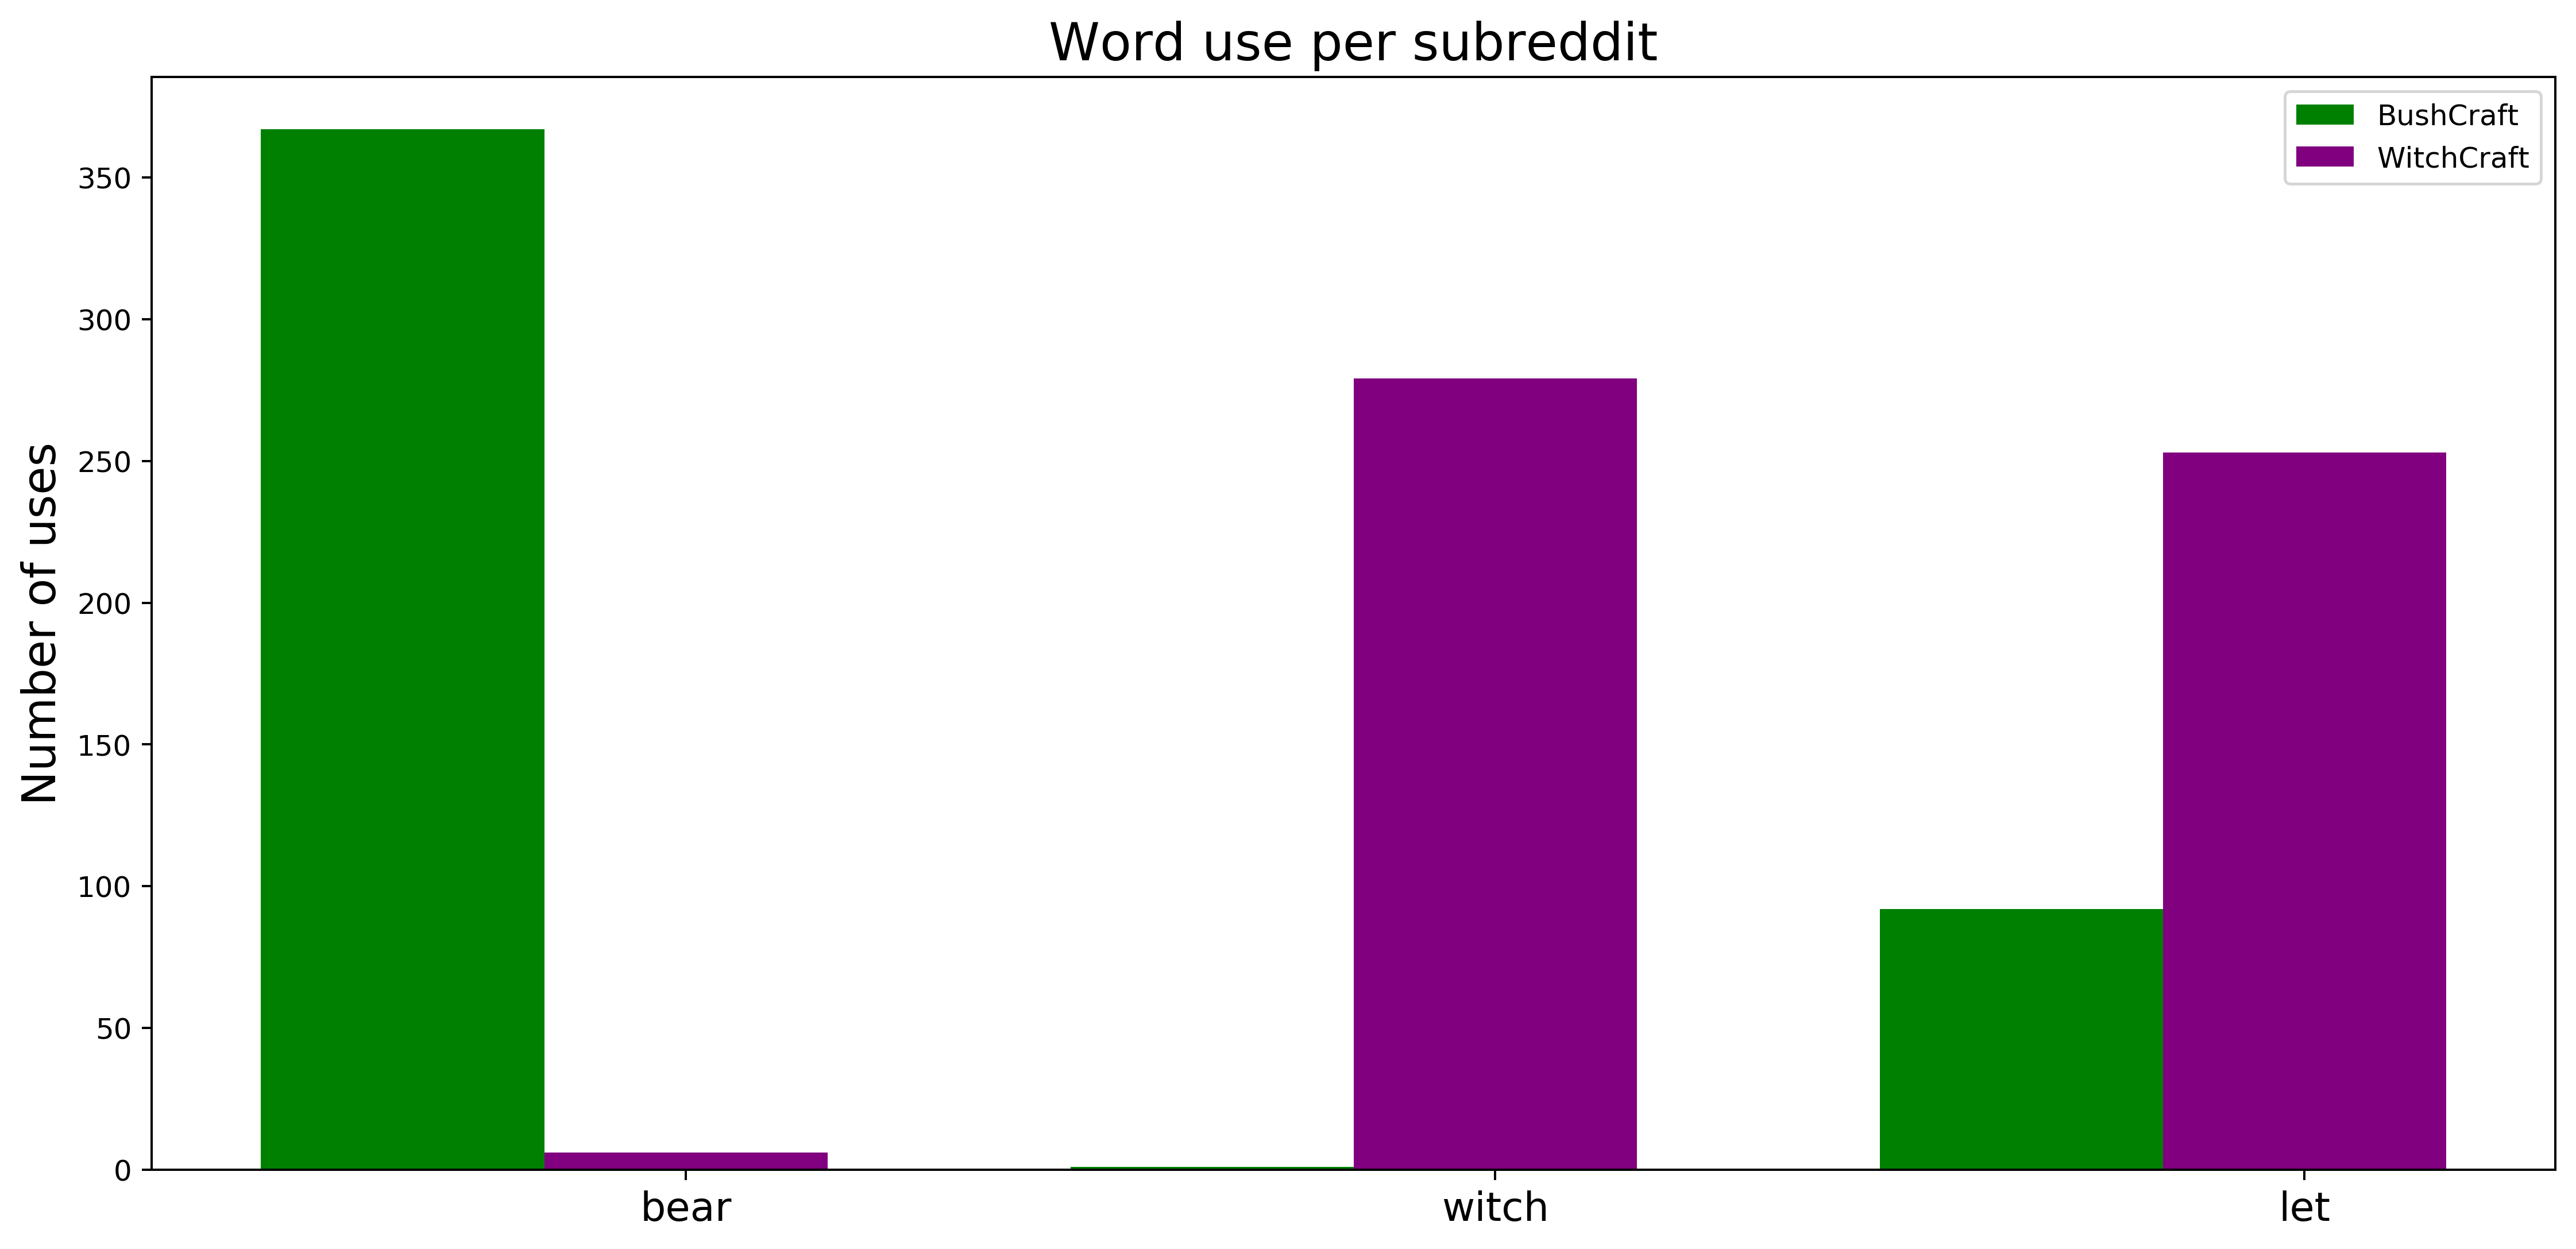

In [130]:
bush_sums_wt = body_df_bush['bear'].sum(), body_df_bush['witch'].sum(), body_df_bush['let'].sum(), 

witch_sums_wt = body_df_witch['bear'].sum(), body_df_witch['witch'].sum(), body_df_witch['let'].sum(), 

n = len(bush_sums_wt)
ind = np.arange(n)
width = 0.35

plt.figure(figsize = (15,7))
plt.bar(ind, bush_sums_wt, width, label='BushCraft', color='Green')
plt.bar(ind + width, witch_sums_wt, width, label='WitchCraft', color='Purple')

plt.ylabel('Number of uses', fontsize=16)
plt.title('Word use per subreddit', fontsize=18)
plt.xticks(ind + width, ('bear', 'witch', 'let'), fontsize=14)
plt.legend(loc='best')
plt.show()

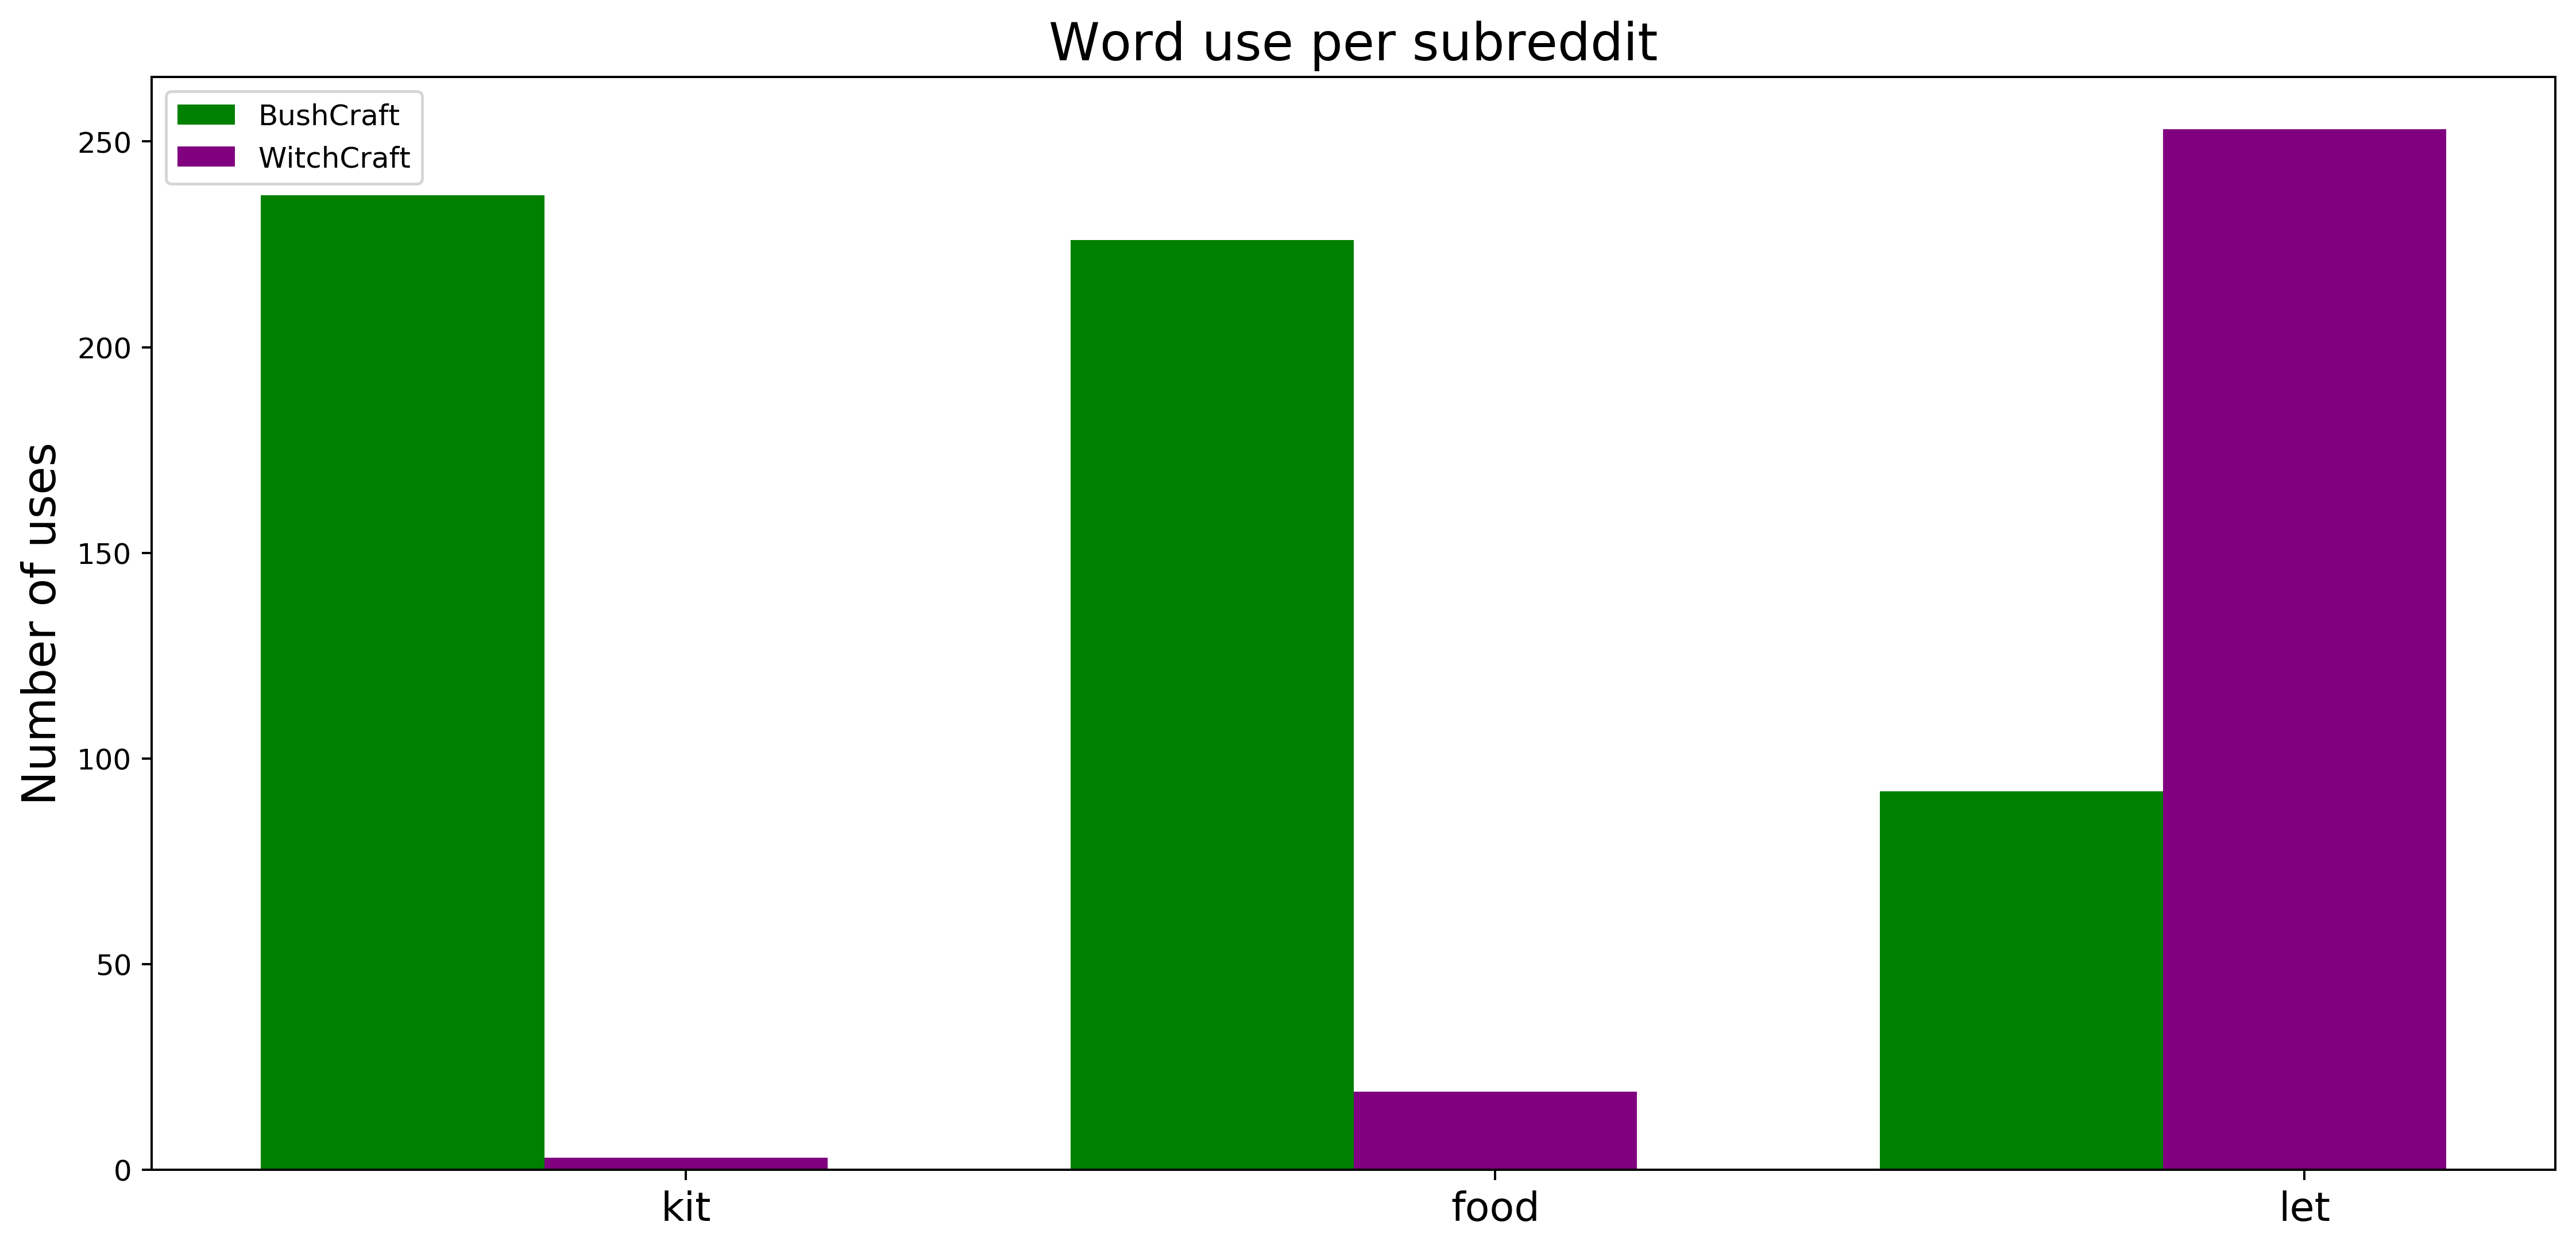

In [131]:
bush_sums_wt = body_df_bush['kit'].sum(), body_df_bush['food'].sum(), body_df_bush['let'].sum(), 

witch_sums_wt = body_df_witch['kit'].sum(), body_df_witch['food'].sum(), body_df_witch['let'].sum(), 

n = len(bush_sums_wt)
ind = np.arange(n)
width = 0.35

plt.figure(figsize = (15,7))
plt.bar(ind, bush_sums_wt, width, label='BushCraft', color='Green')
plt.bar(ind + width, witch_sums_wt, width, label='WitchCraft', color='Purple')

plt.ylabel('Number of uses', fontsize=16)
plt.title('Word use per subreddit', fontsize=18)
plt.xticks(ind + width, ('kit', 'food', 'let'), fontsize=14)
plt.legend(loc='best')
plt.show()

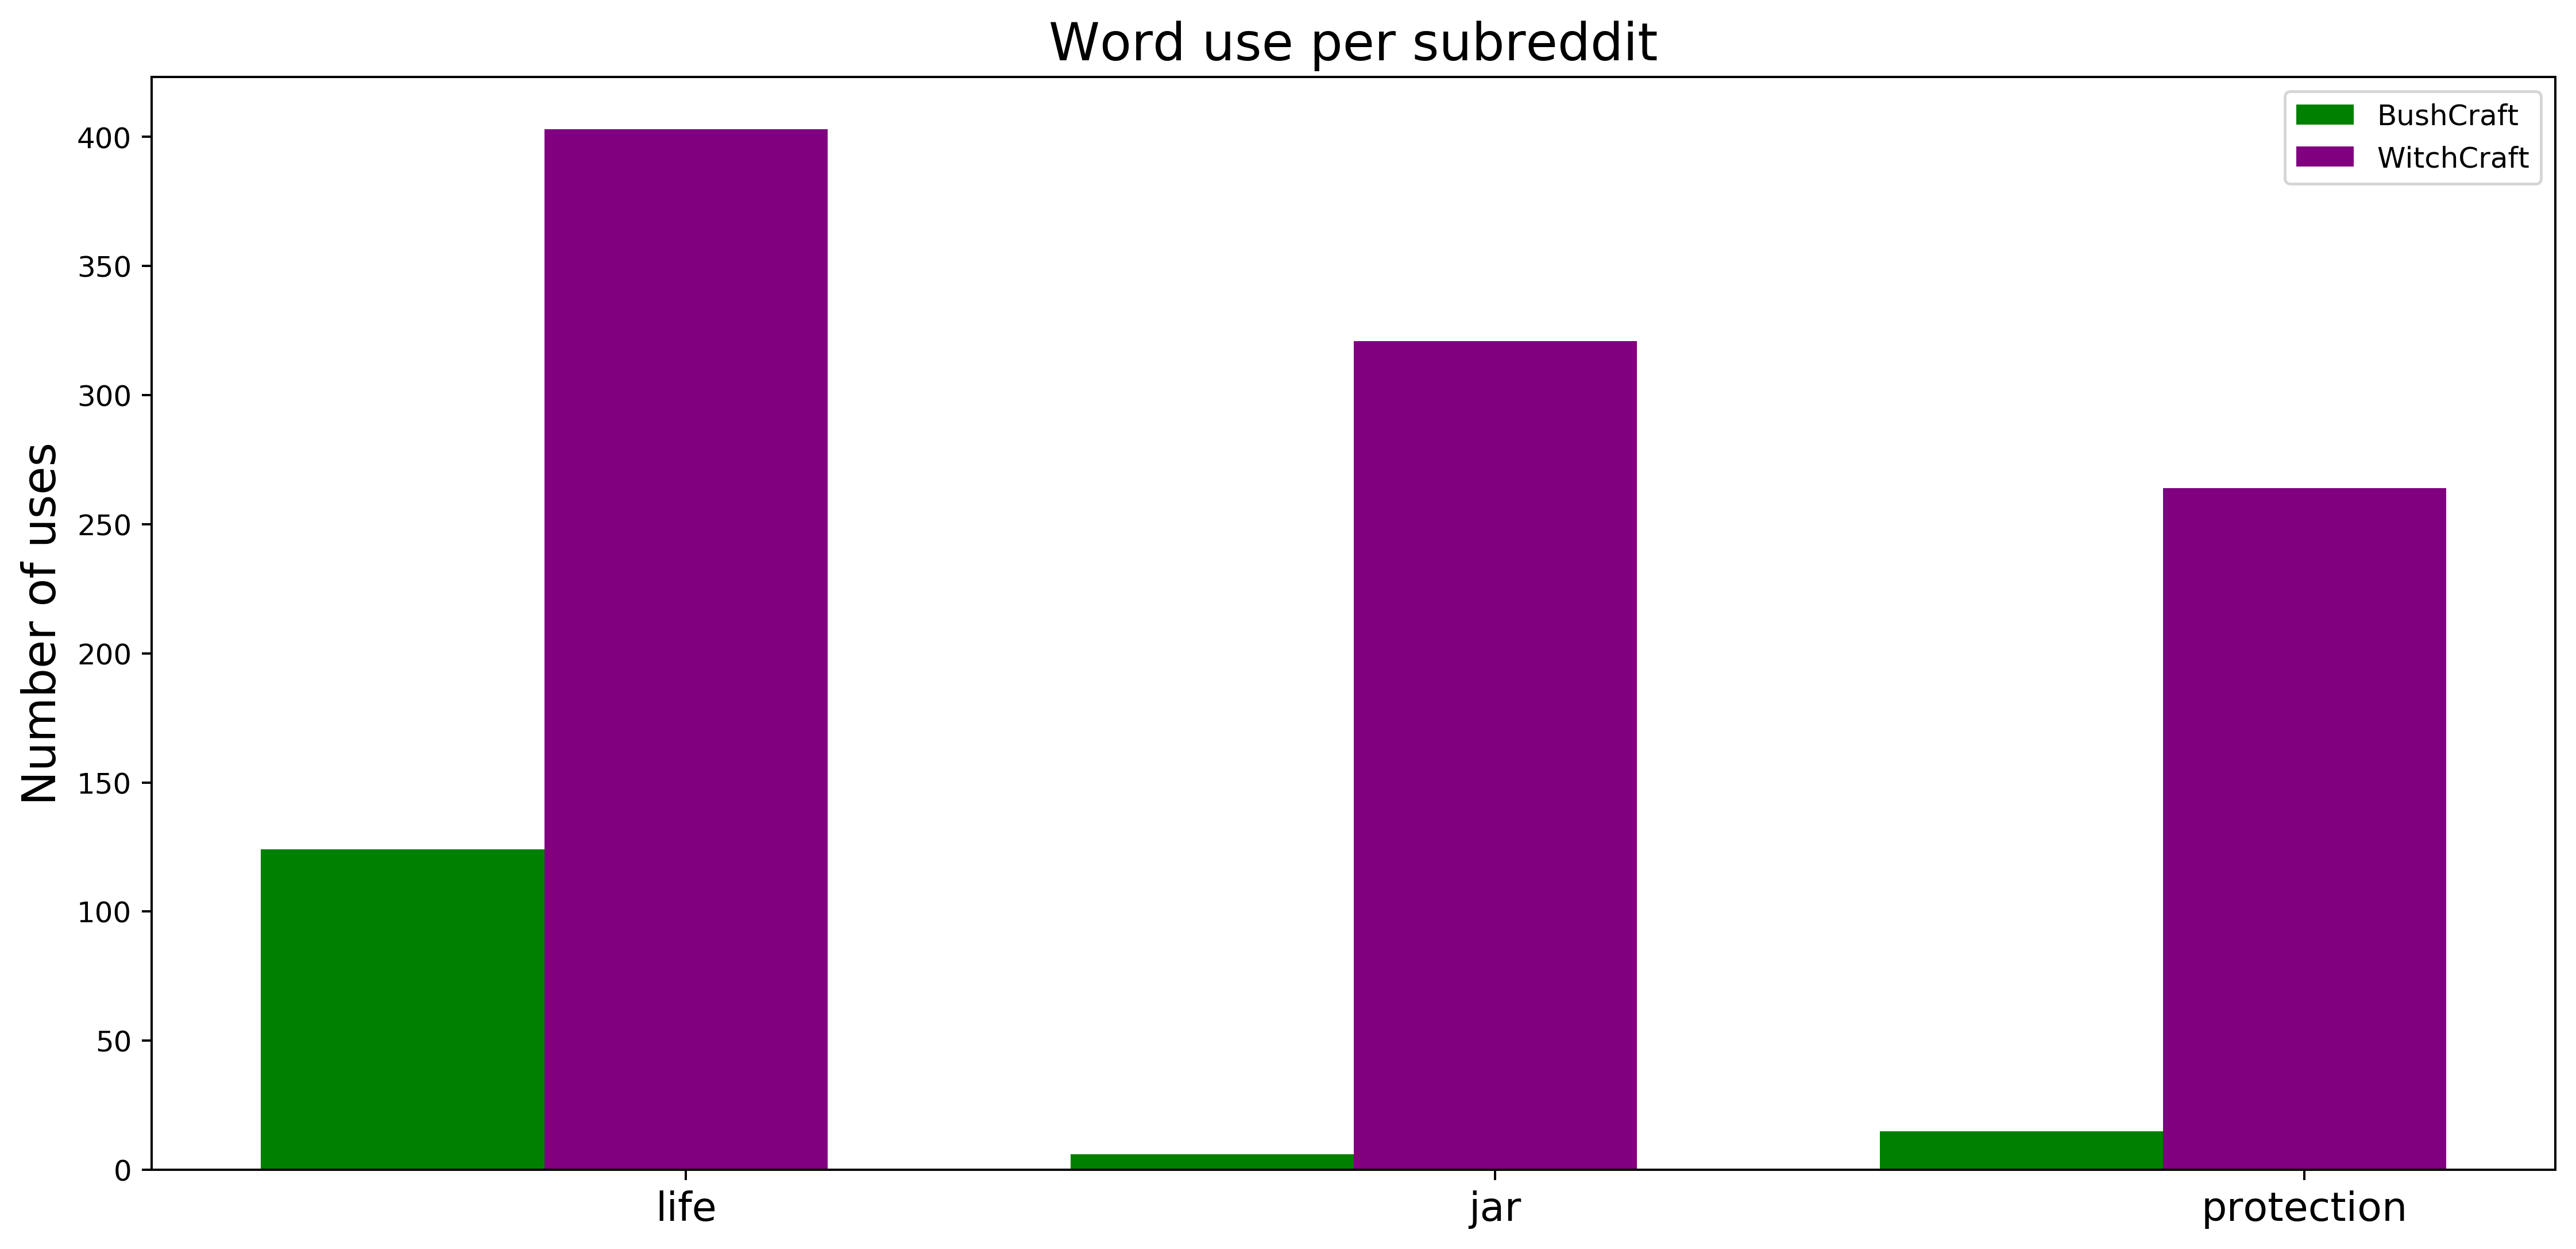

In [132]:
bush_sums_wt = body_df_bush['life'].sum(), body_df_bush['jar'].sum(), body_df_bush['protection'].sum(), 

witch_sums_wt = body_df_witch['life'].sum(), body_df_witch['jar'].sum(), body_df_witch['protection'].sum(), 

n = len(bush_sums_wt)
ind = np.arange(n)
width = 0.35

plt.figure(figsize = (15,7))
plt.bar(ind, bush_sums_wt, width, label='BushCraft', color='Green')
plt.bar(ind + width, witch_sums_wt, width, label='WitchCraft', color='Purple')

plt.ylabel('Number of uses', fontsize=16)
plt.title('Word use per subreddit', fontsize=18)
plt.xticks(ind + width, ('life', 'jar', 'protection'), fontsize=14)
plt.legend(loc='best')
plt.show()

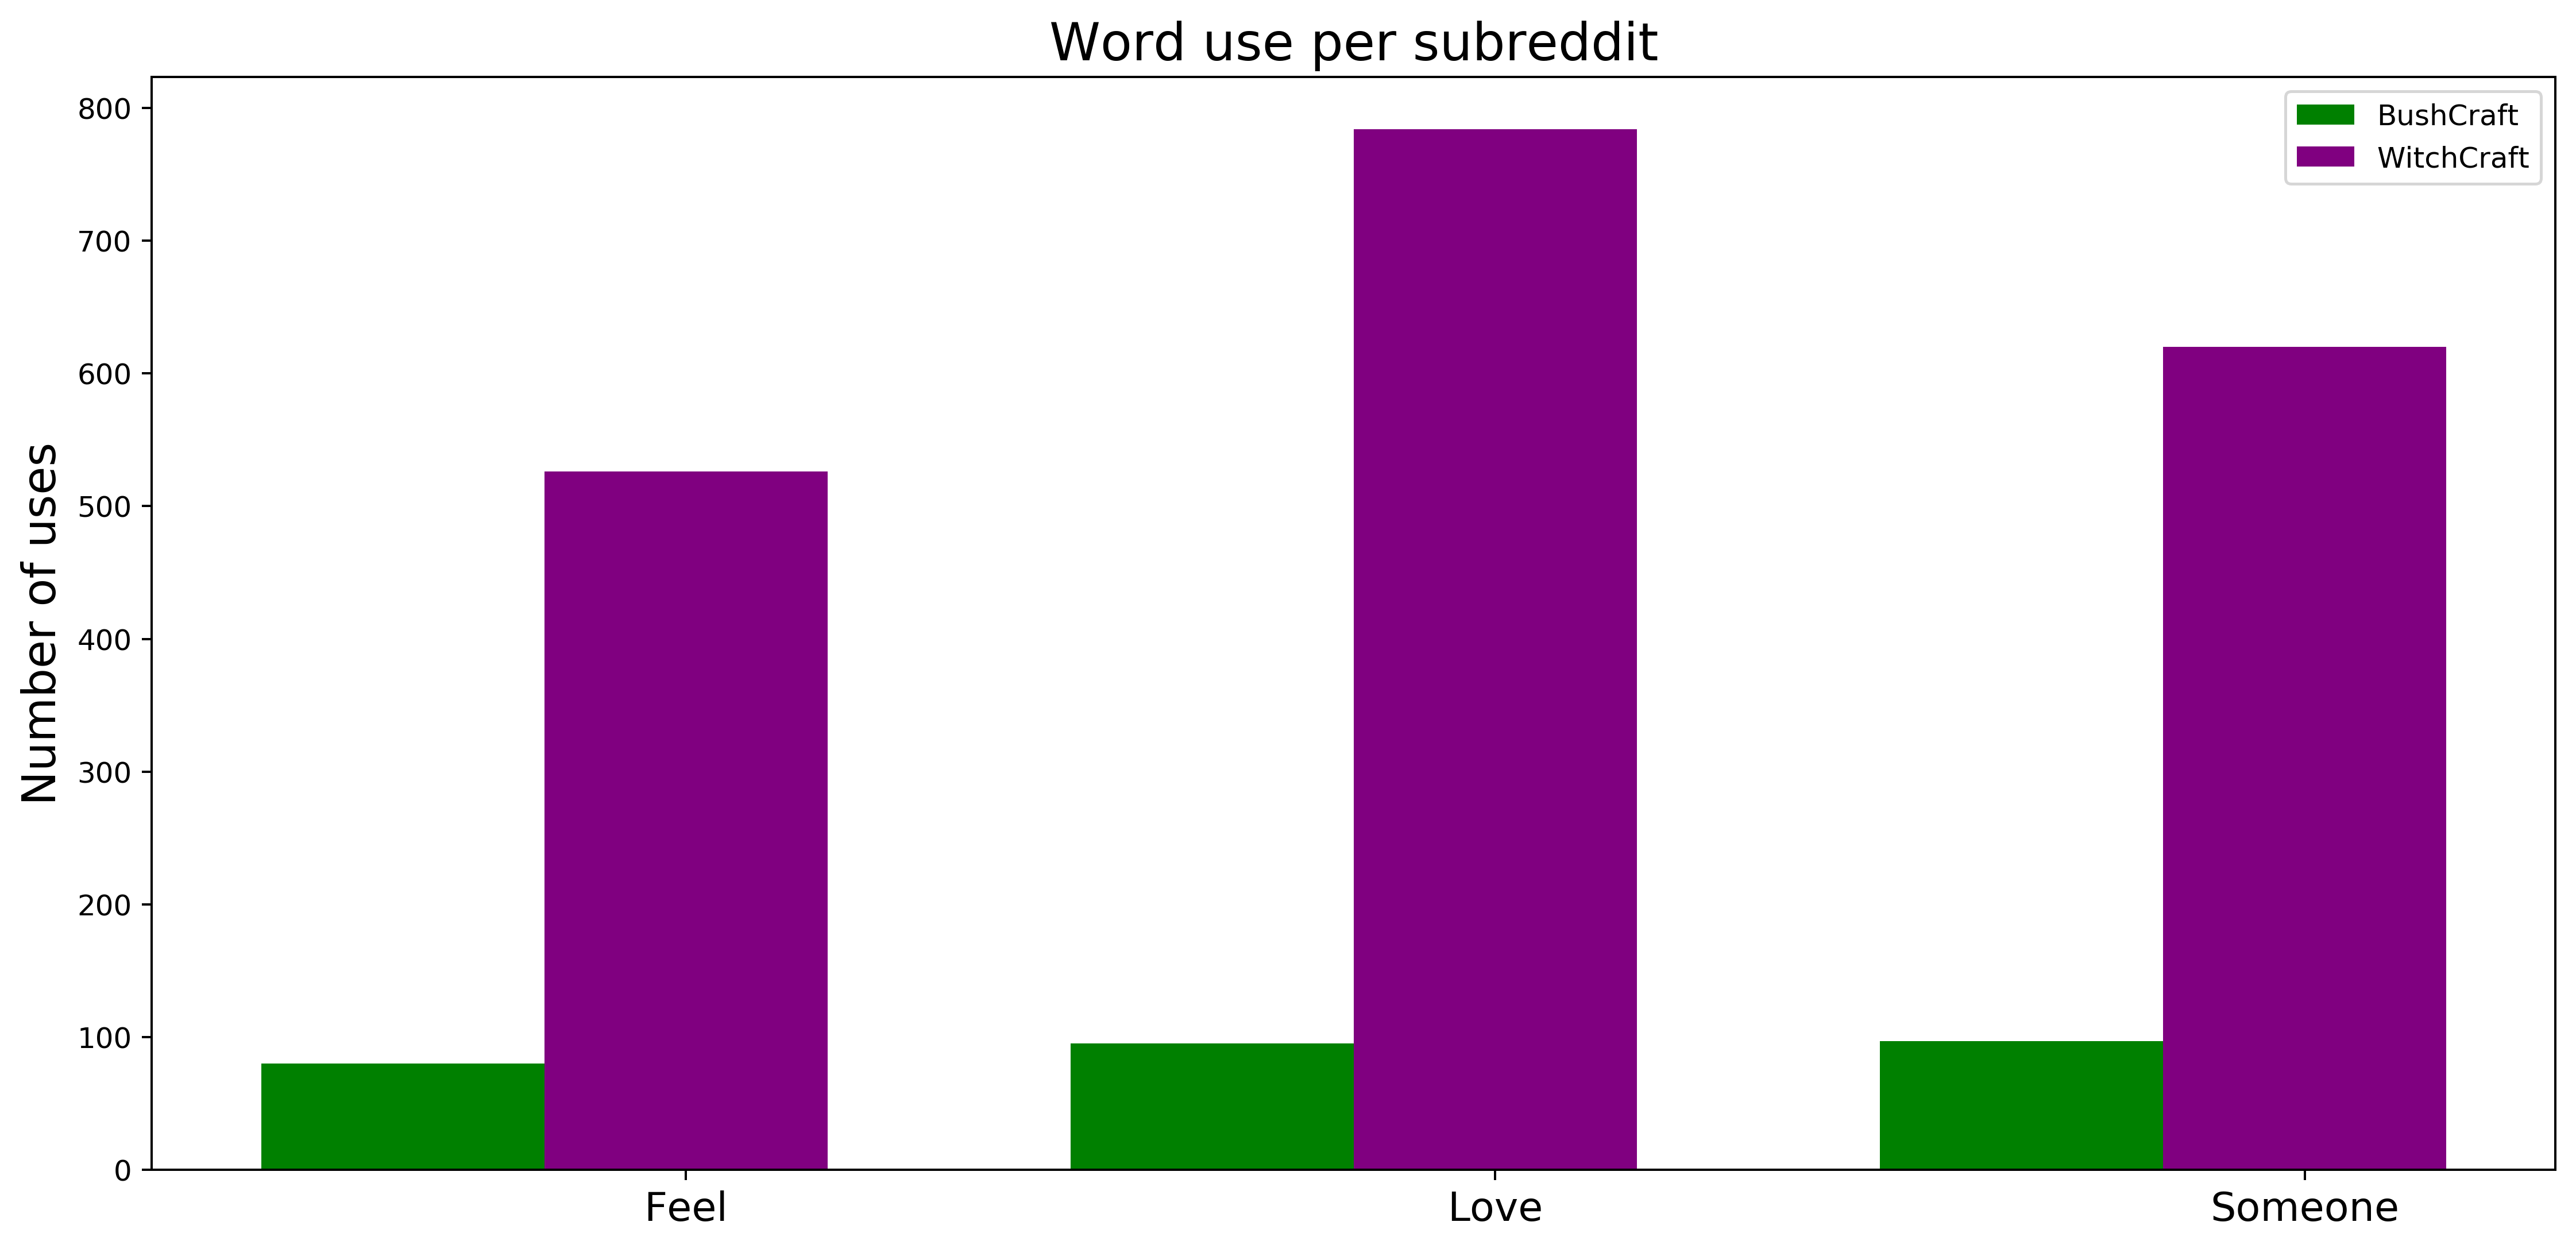

In [133]:
bush_sums_wt = body_df_bush['feel'].sum(), body_df_bush['love'].sum(), body_df_bush['someone'].sum(), 

witch_sums_wt = body_df_witch['feel'].sum(), body_df_witch['love'].sum(), body_df_witch['someone'].sum(), 

n = len(bush_sums_wt)
ind = np.arange(n)
width = 0.35

plt.figure(figsize = (15,7))
plt.bar(ind, bush_sums_wt, width, label='BushCraft', color='Green')
plt.bar(ind + width, witch_sums_wt, width, label='WitchCraft', color='Purple')

plt.ylabel('Number of uses', fontsize=16)
plt.title('Word use per subreddit', fontsize=18)
plt.xticks(ind + width, ('Feel', 'Love', 'Someone'), fontsize=14)
plt.legend(loc='best')
plt.show()

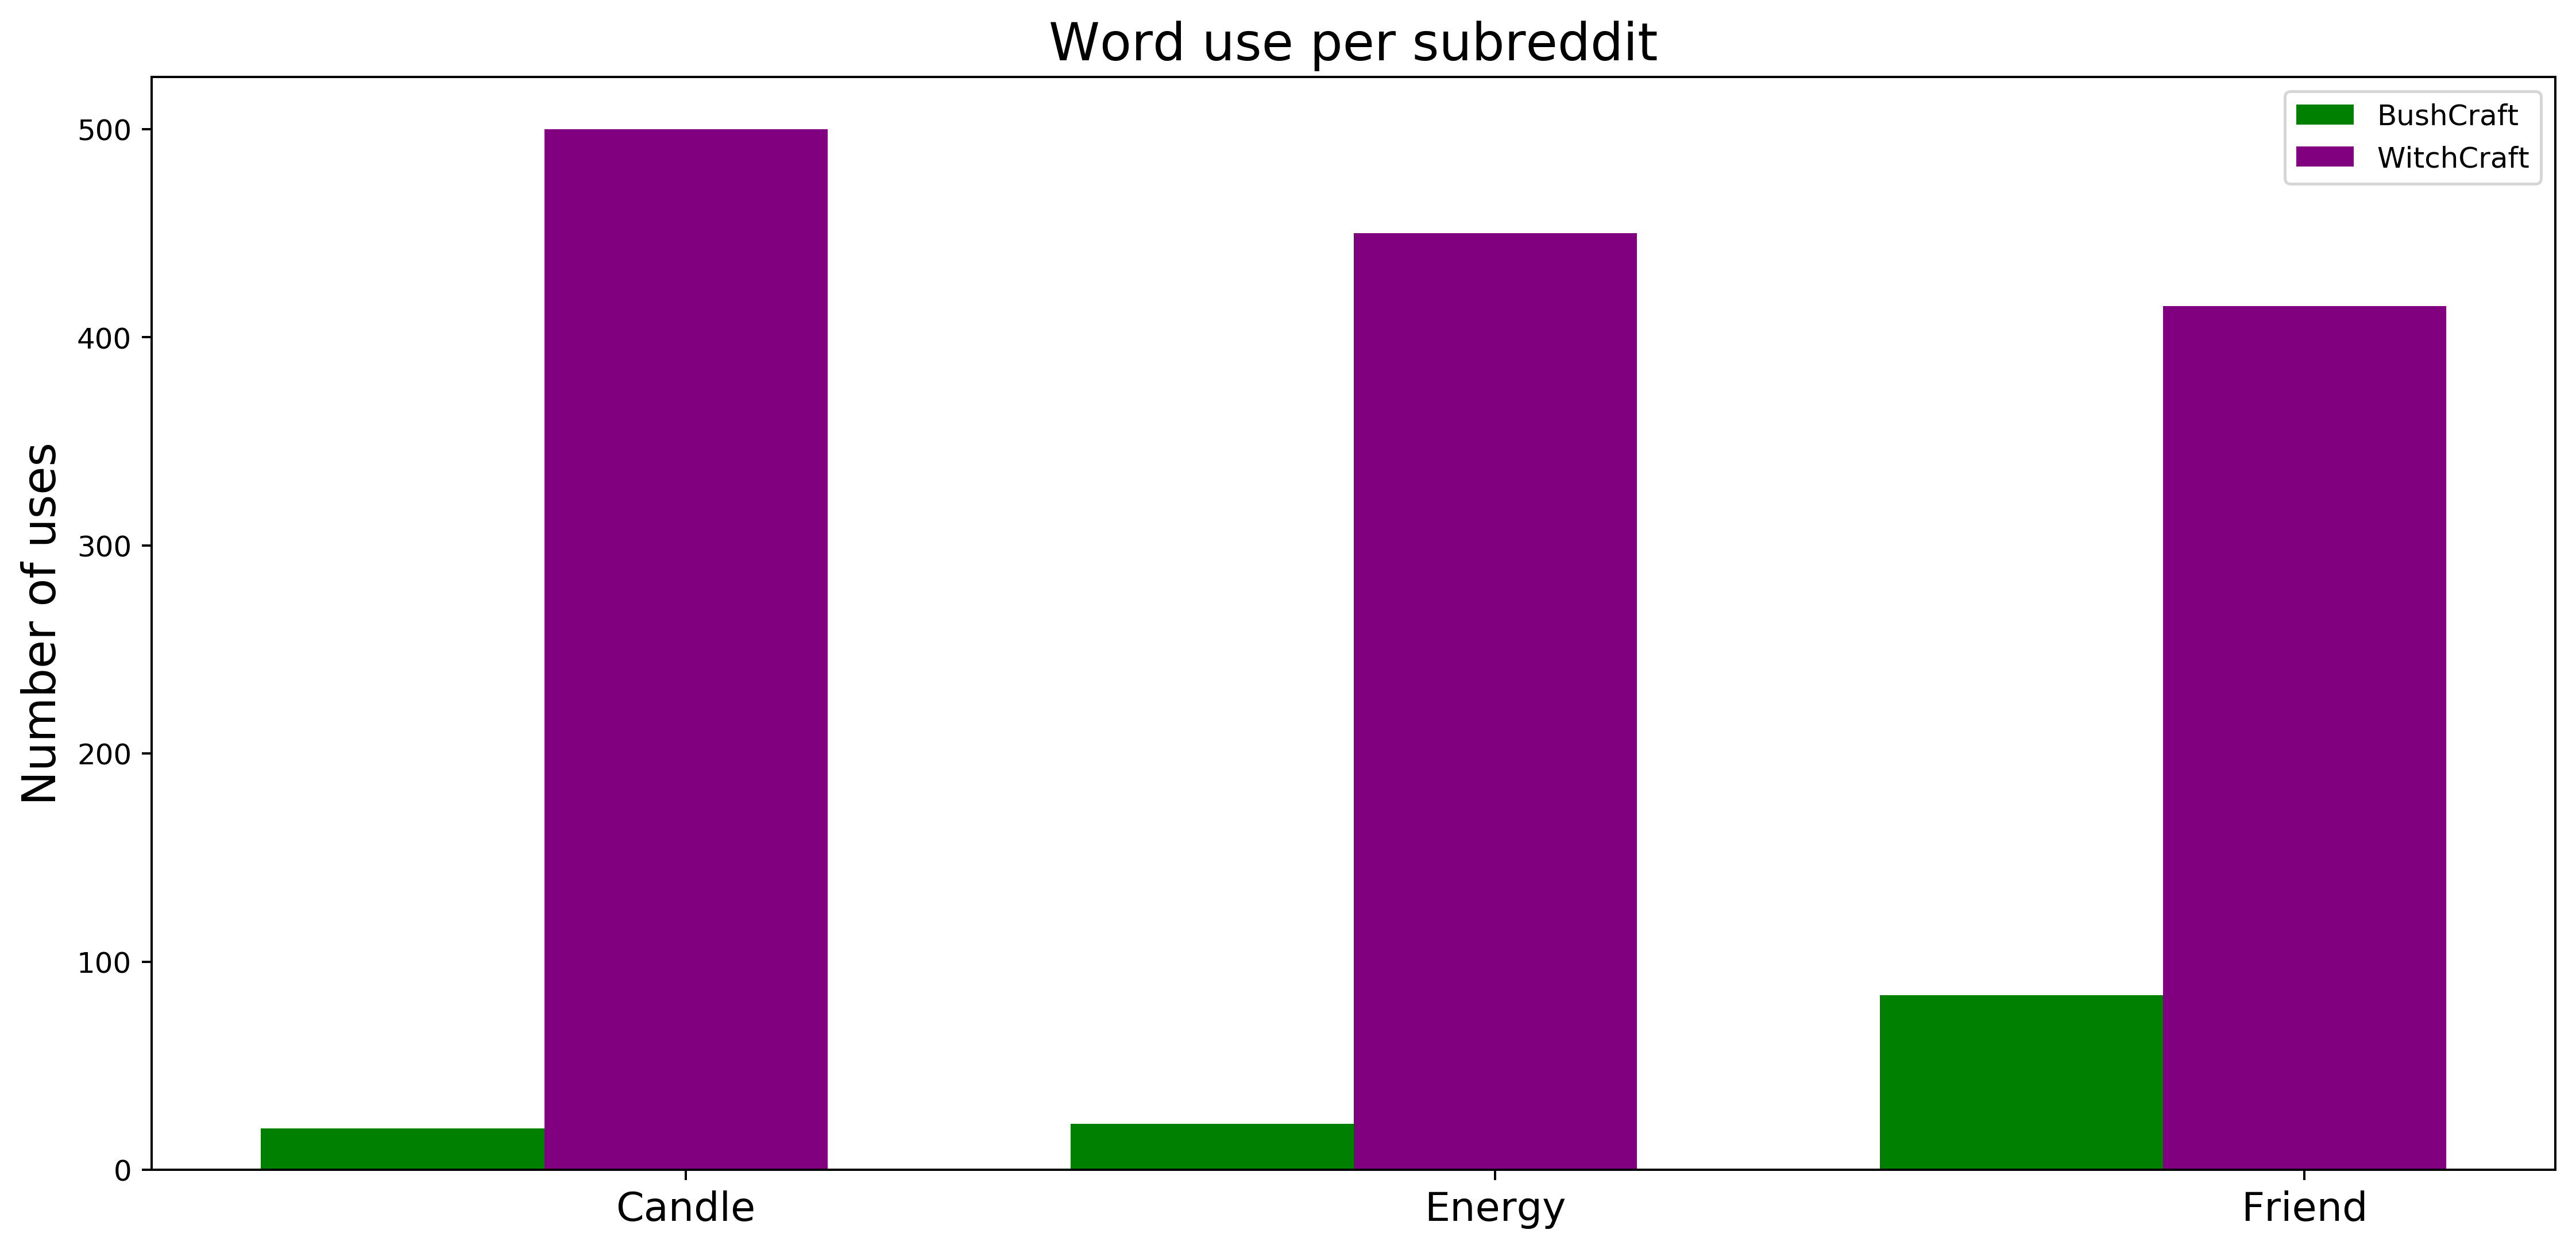

In [134]:
bush_sums_wt = body_df_bush['candle'].sum(), body_df_bush['energy'].sum(), body_df_bush['friend'].sum(), 

witch_sums_wt = body_df_witch['candle'].sum(), body_df_witch['energy'].sum(), body_df_witch['friend'].sum(), 

n = len(bush_sums_wt)
ind = np.arange(n)
width = 0.35

plt.figure(figsize = (15,7))
plt.bar(ind, bush_sums_wt, width, label='BushCraft', color='Green')
plt.bar(ind + width, witch_sums_wt, width, label='WitchCraft', color='Purple')

plt.ylabel('Number of uses', fontsize=16)
plt.title('Word use per subreddit', fontsize=18)
plt.xticks(ind + width, ('Candle', 'Energy', 'Friend'), fontsize=14)
plt.legend(loc='best')
plt.show()


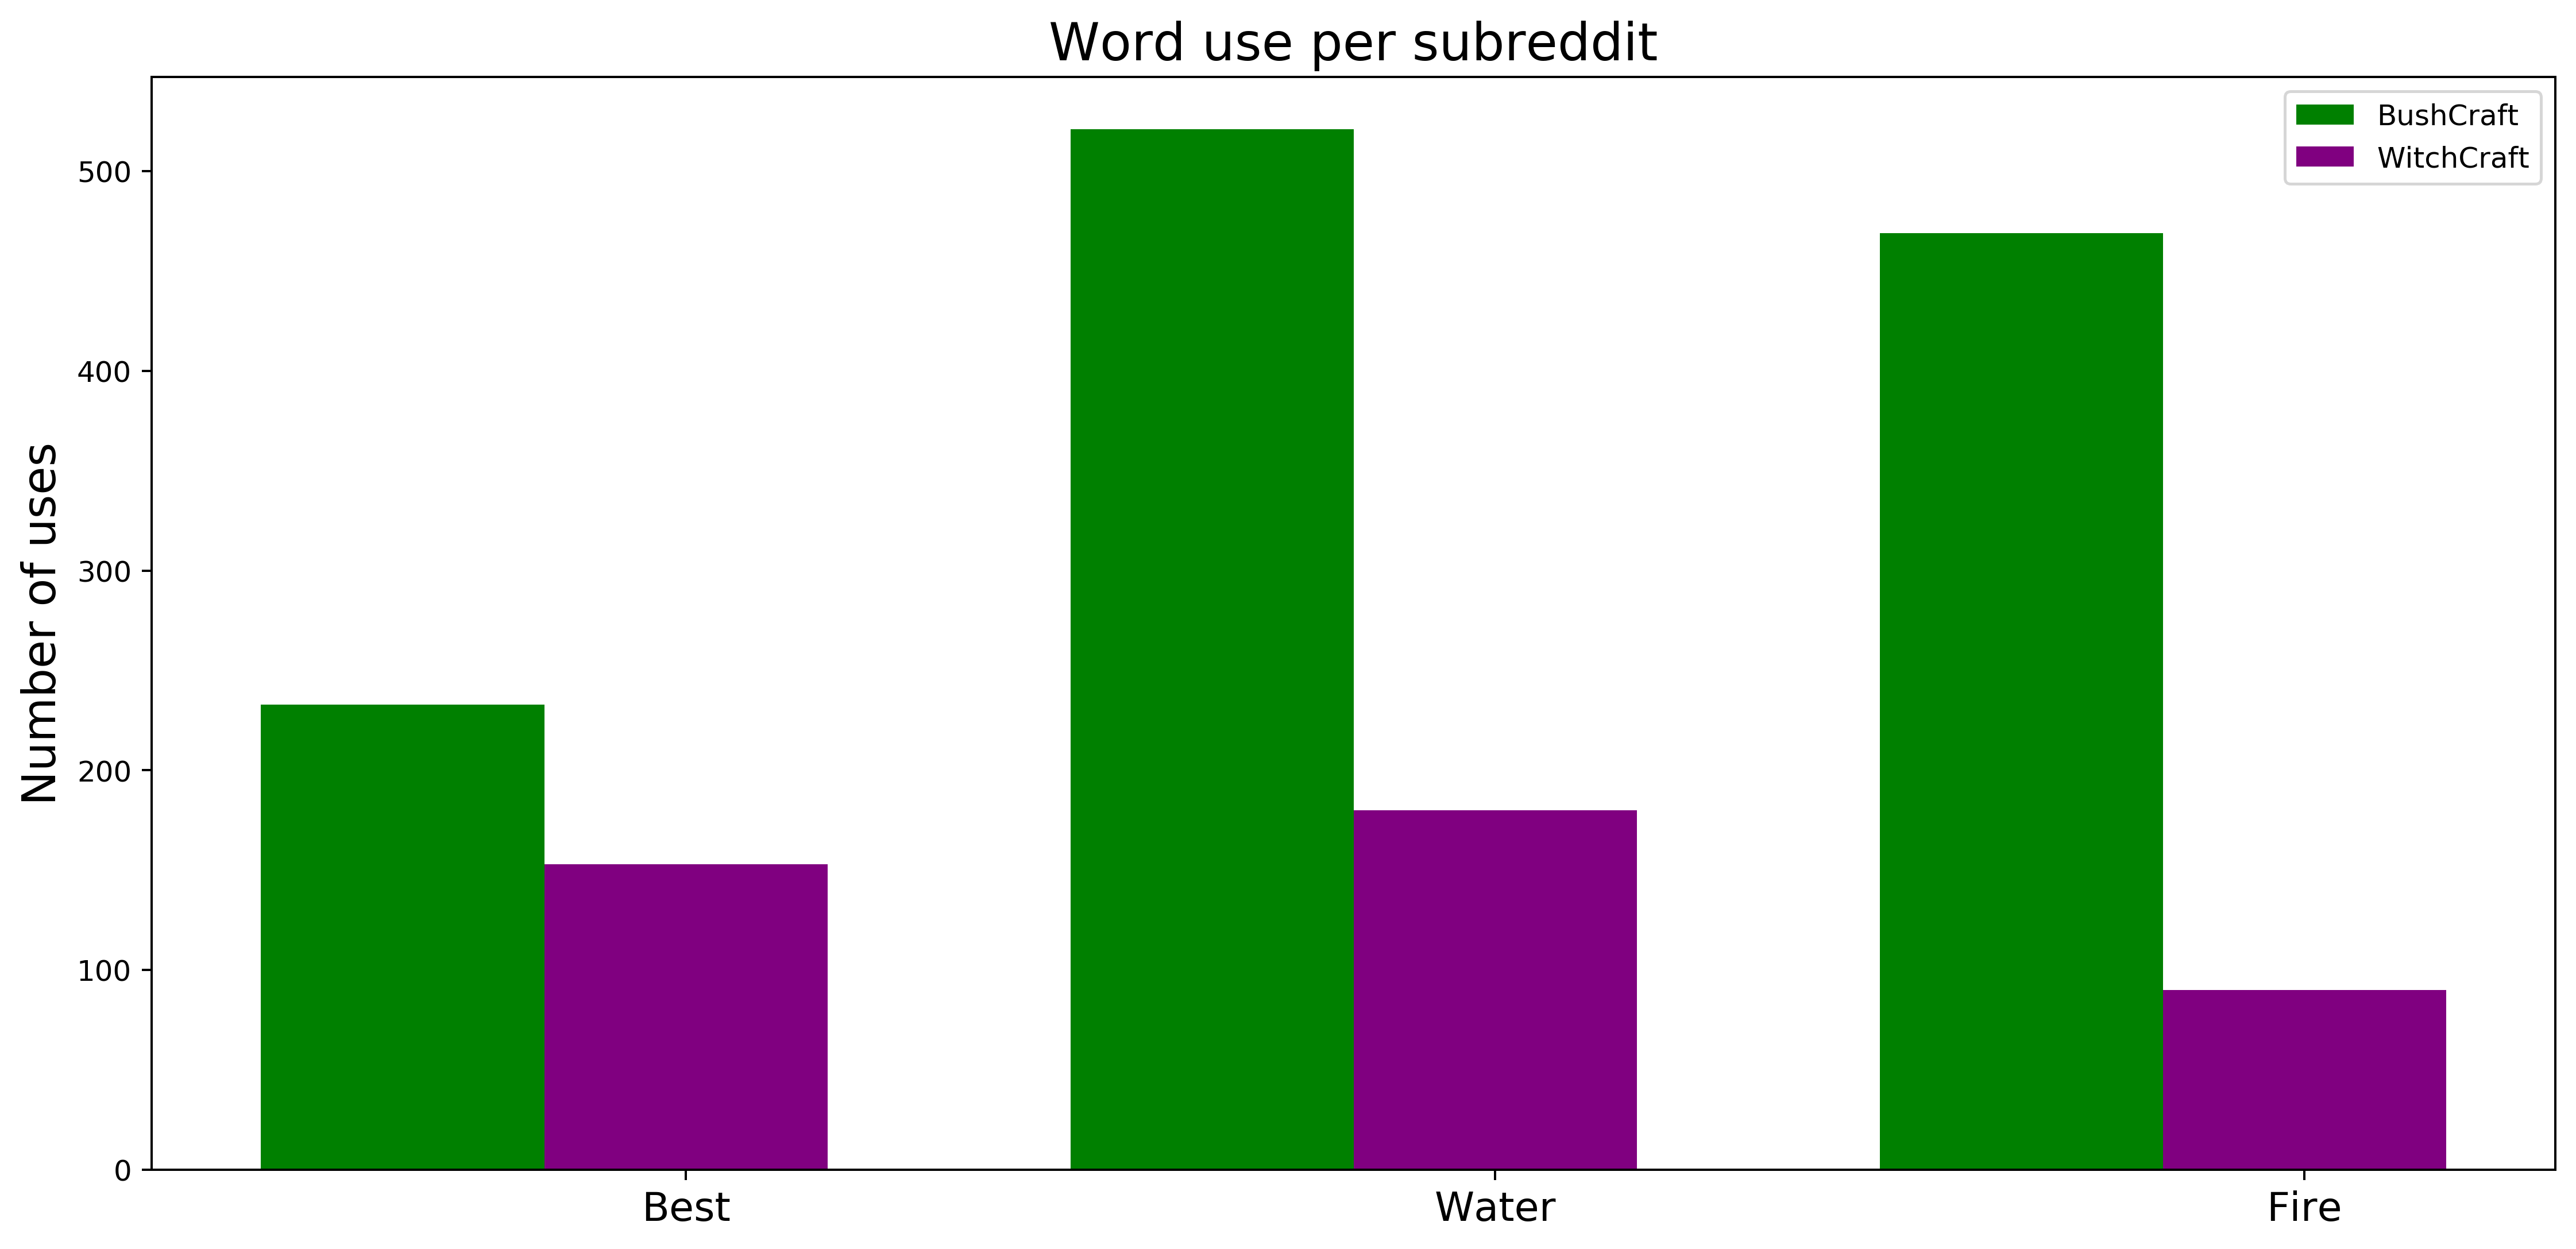

In [135]:
bush_sums_bt = body_df_bush['best'].sum(), body_df_bush['water'].sum(), body_df_bush['fire'].sum(), 

witch_sums_bt = body_df_witch['best'].sum(), body_df_witch['water'].sum(), body_df_witch['fire'].sum(), 

n = len(bush_sums_bt)
ind = np.arange(n)
width = 0.35

plt.figure(figsize = (15,7))
plt.bar(ind, bush_sums_bt, width, label='BushCraft', color='Green')
plt.bar(ind + width, witch_sums_bt, width, label='WitchCraft', color='Purple')

plt.ylabel('Number of uses', fontsize=16)
plt.title('Word use per subreddit', fontsize=18)
plt.xticks(ind + width, ('Best', 'Water', 'Fire'), fontsize=14)
plt.legend(loc='best')
plt.show()

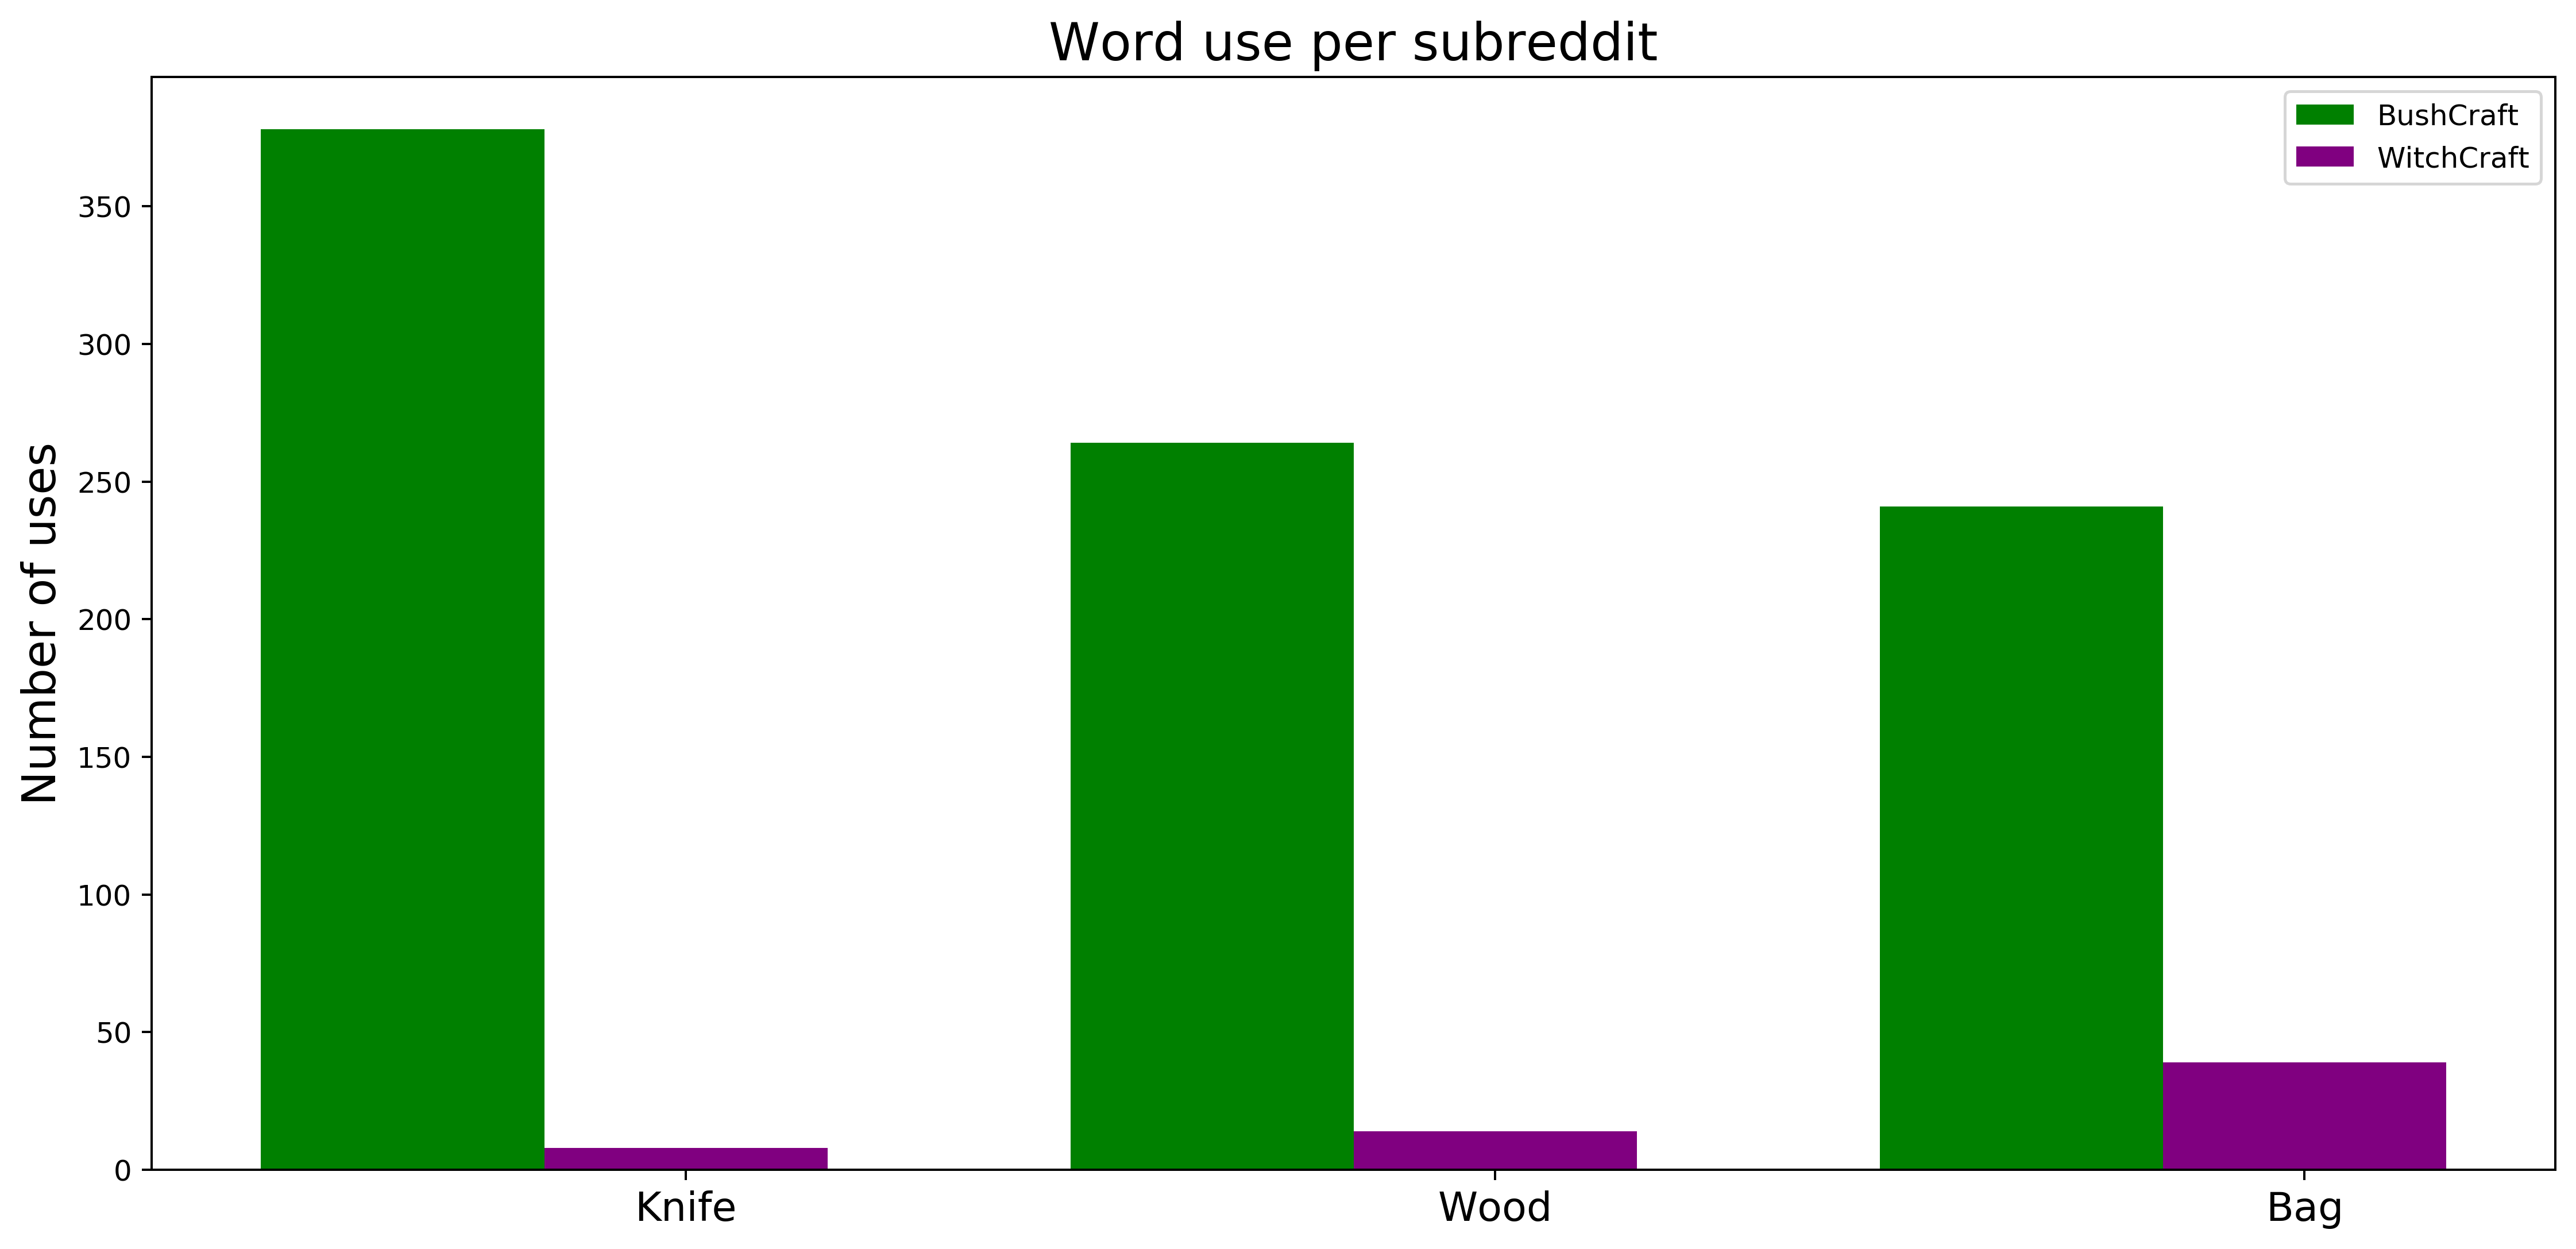

In [136]:
bush_sums_bt =  body_df_bush['knife'].sum(),body_df_bush['wood'].sum(),body_df_bush['bag'].sum()

witch_sums_bt = body_df_witch['knife'].sum(),body_df_witch['wood'].sum(),body_df_witch['bag'].sum()

n = len(bush_sums_bt)
ind = np.arange(n)
width = 0.35

plt.figure(figsize = (15,7))
plt.bar(ind, bush_sums_bt, width, label='BushCraft', color='Green')
plt.bar(ind + width, witch_sums_bt, width, label='WitchCraft', color='Purple')

plt.ylabel('Number of uses', fontsize=16)
plt.title('Word use per subreddit', fontsize=18)
plt.xticks(ind + width, ('Knife', 'Wood', 'Bag'), fontsize=14)
plt.legend(loc='best')
plt.show()

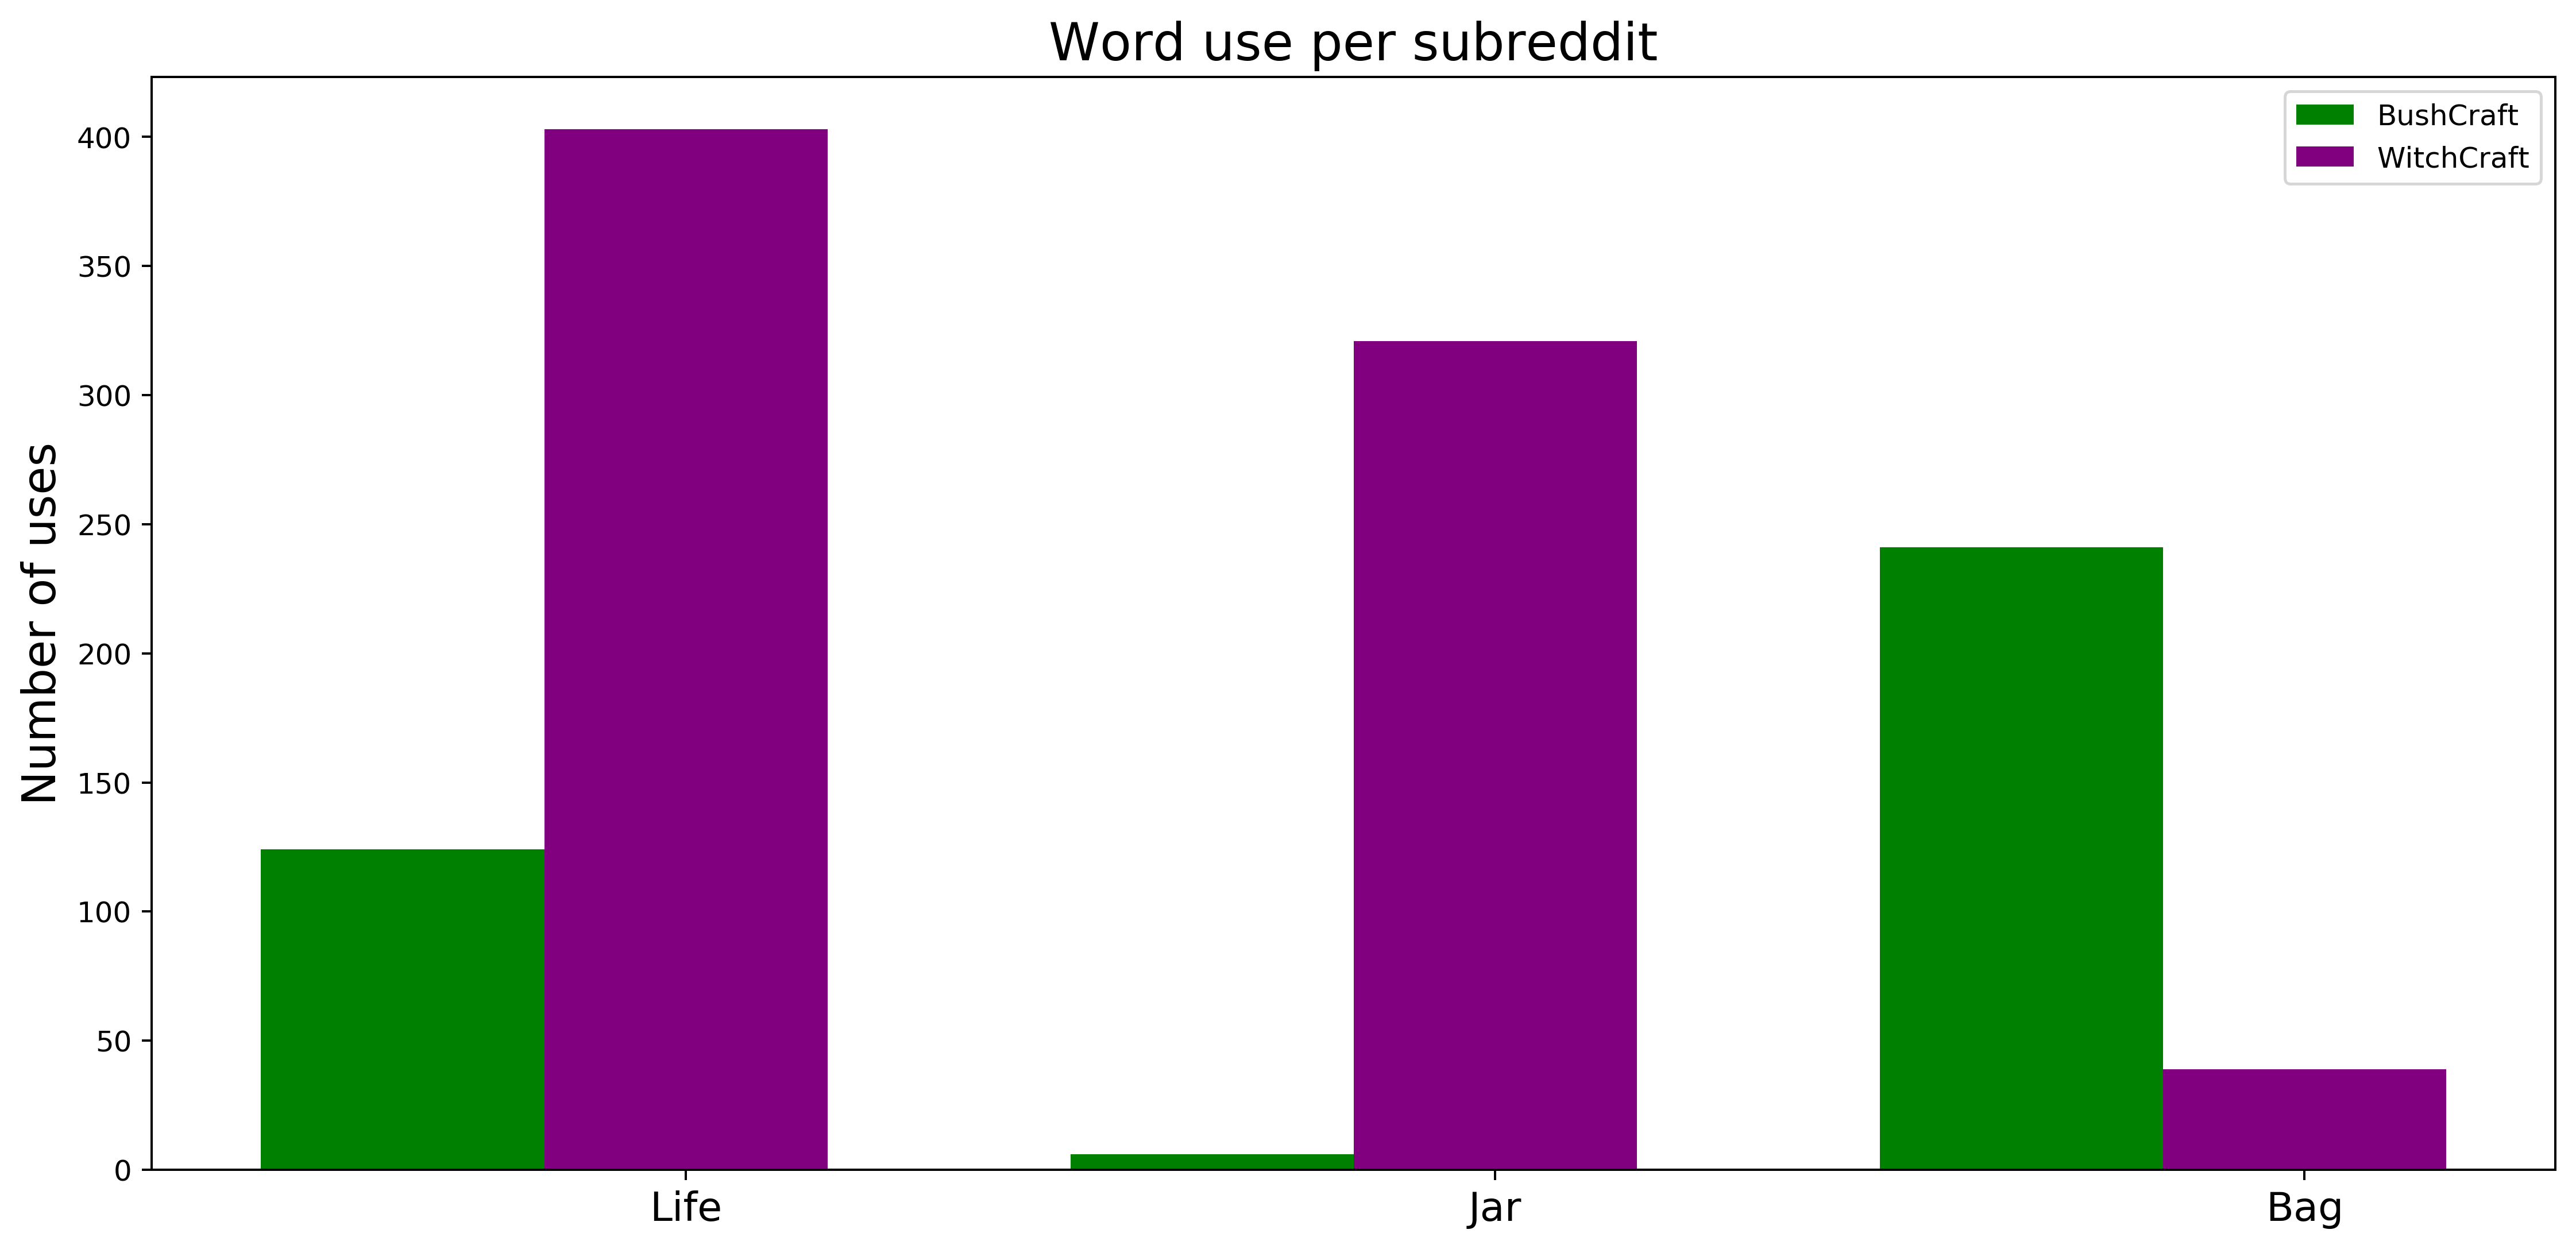

In [143]:
bush_sums_bt =  body_df_bush['life'].sum(),body_df_bush['jar'].sum(),body_df_bush['bag'].sum()

witch_sums_bt = body_df_witch['life'].sum(),body_df_witch['jar'].sum(),body_df_witch['bag'].sum()

n = len(bush_sums_bt)
ind = np.arange(n)
width = 0.35

plt.figure(figsize = (15,7))
plt.bar(ind, bush_sums_bt, width, label='BushCraft', color='Green')
plt.bar(ind + width, witch_sums_bt, width, label='WitchCraft', color='Purple')

plt.ylabel('Number of uses', fontsize=16)
plt.title('Word use per subreddit', fontsize=18)
plt.xticks(ind + width, ('Life', 'Jar', 'Bag'), fontsize=14)
plt.legend(loc='best')
plt.show()

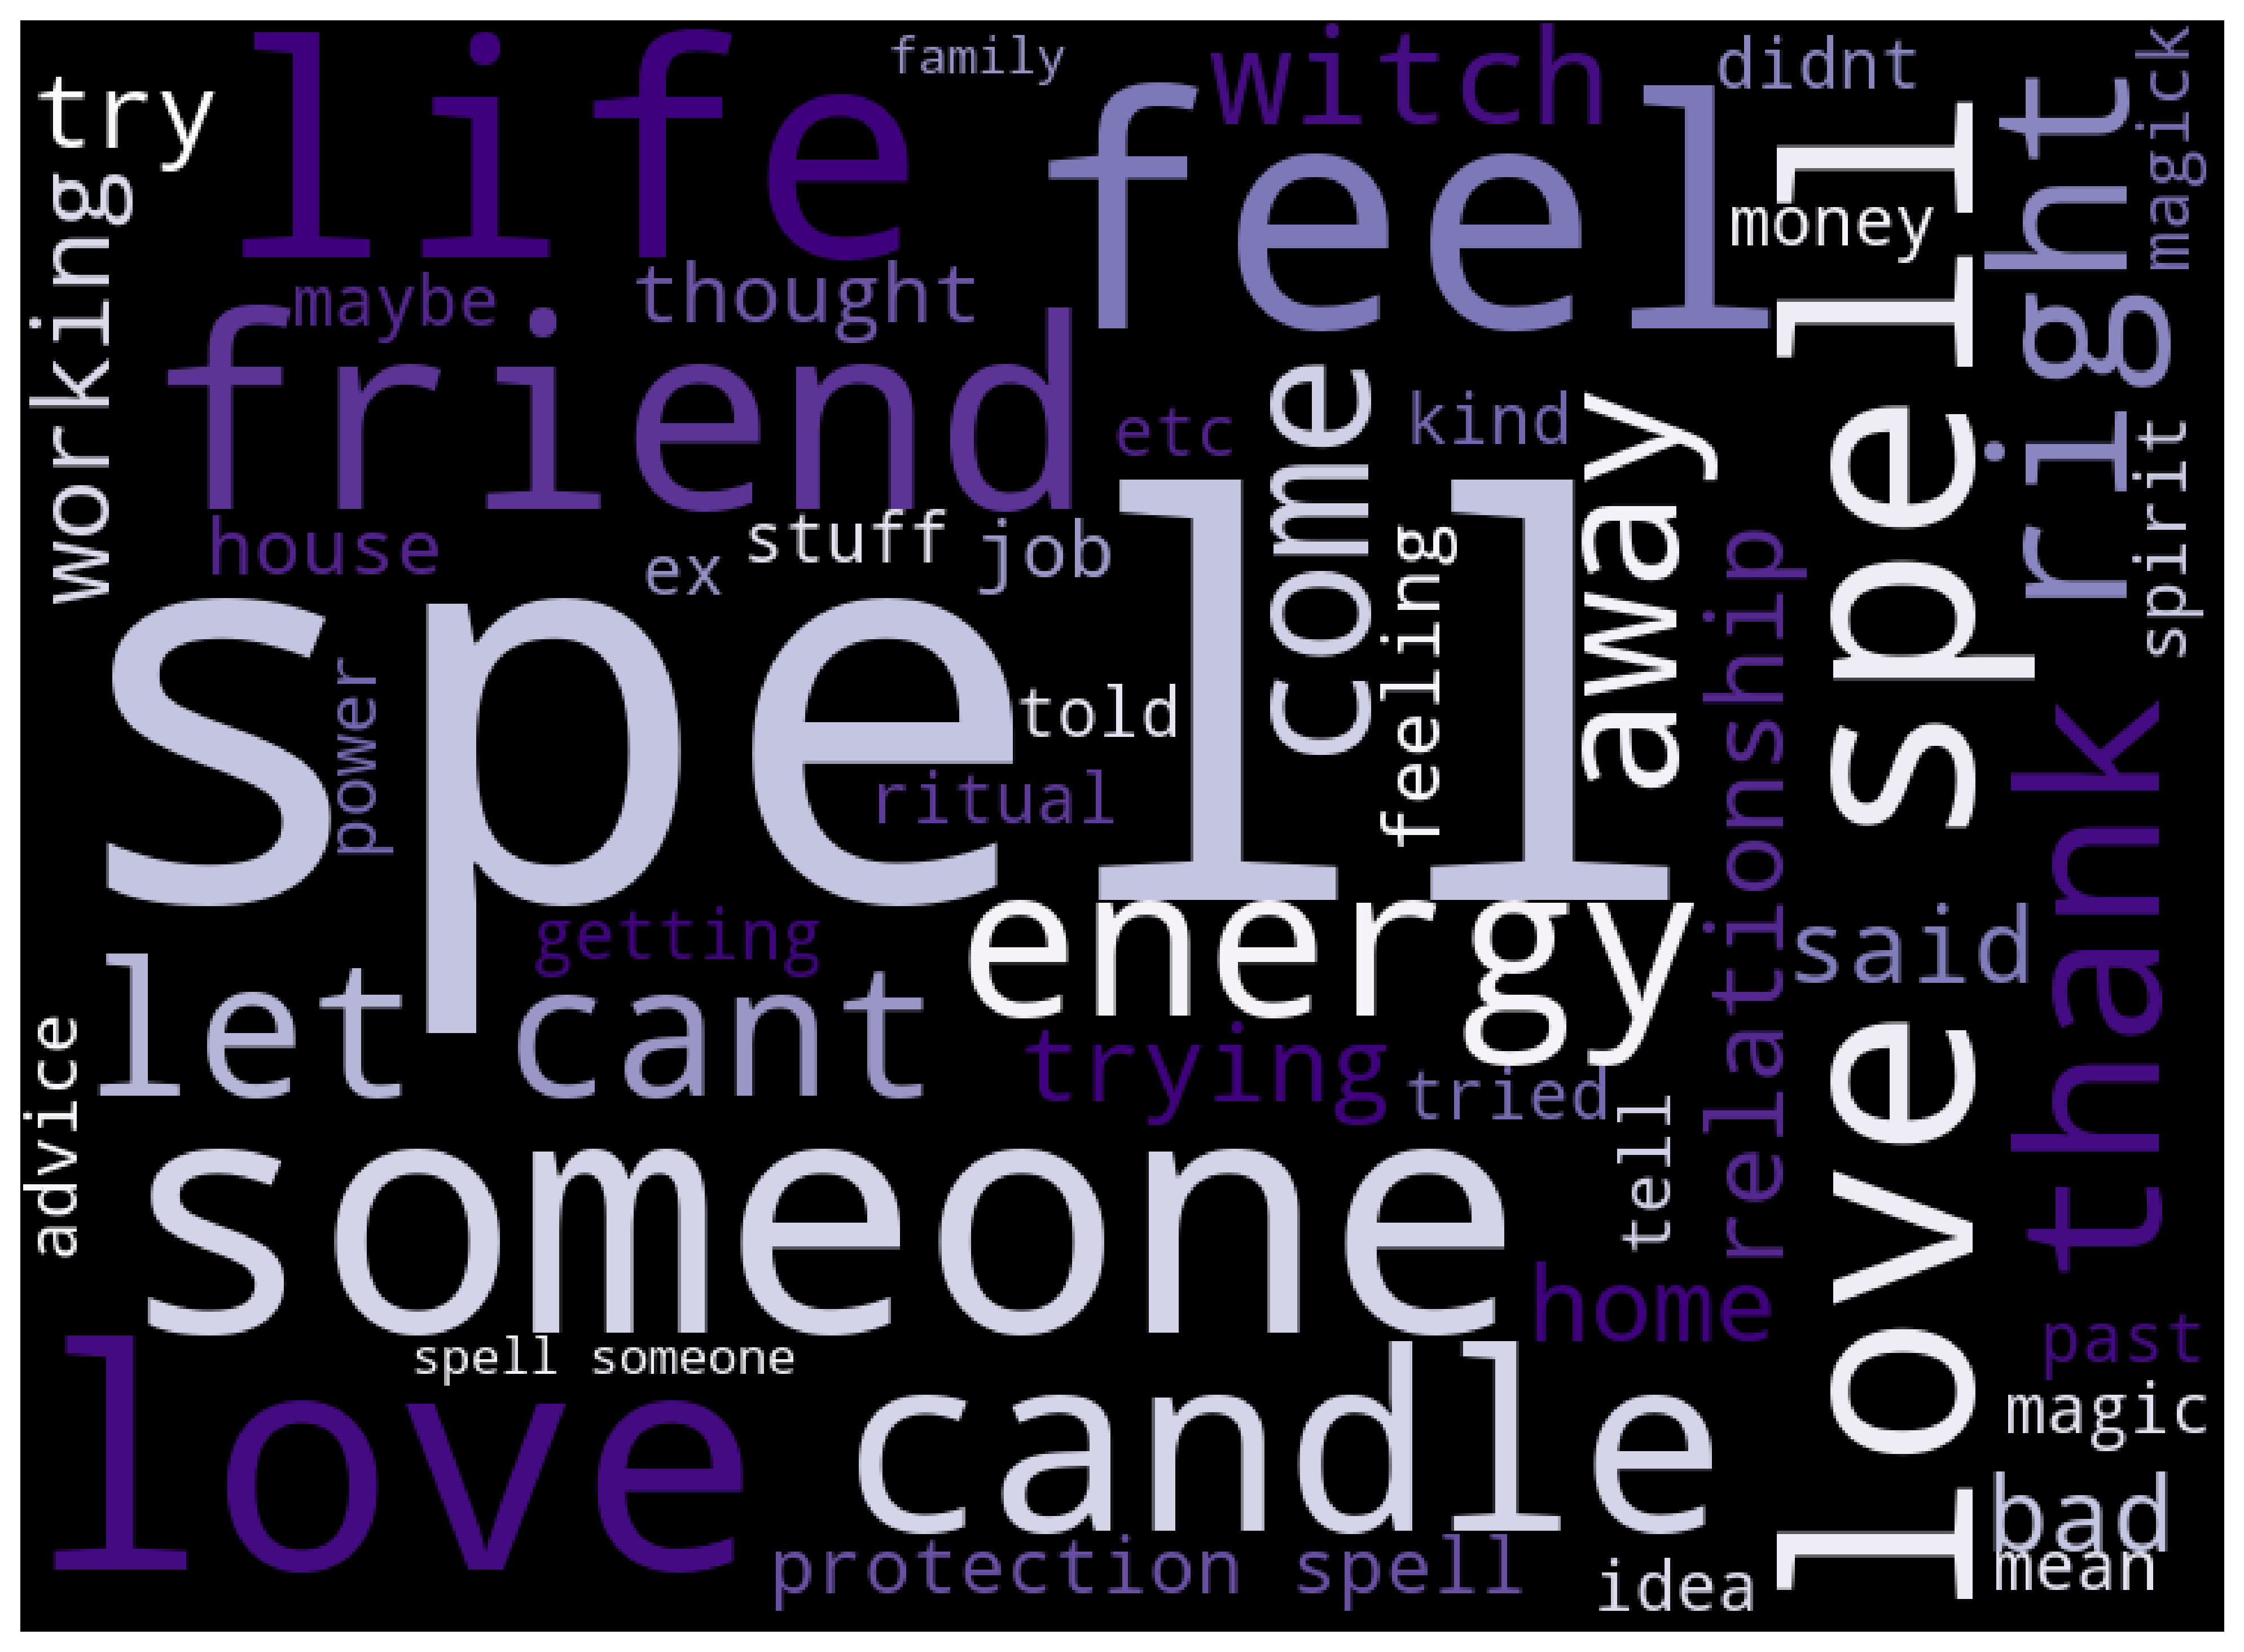

In [138]:
wc = WordCloud(max_words= 50,
                      width = 744, 
                      height = 544,
                      background_color ='black', 
                      contour_width=3, 
                      colormap= 'Purples',
                      min_font_size = 10).generate(' '.join(dfwitch['title_body_stop2_str'])) 
                      
plt.figure(figsize = (14, 14)) 
plt.imshow(wc, interpolation="bilinear")
plt.imshow(wc) 
plt.axis("off");

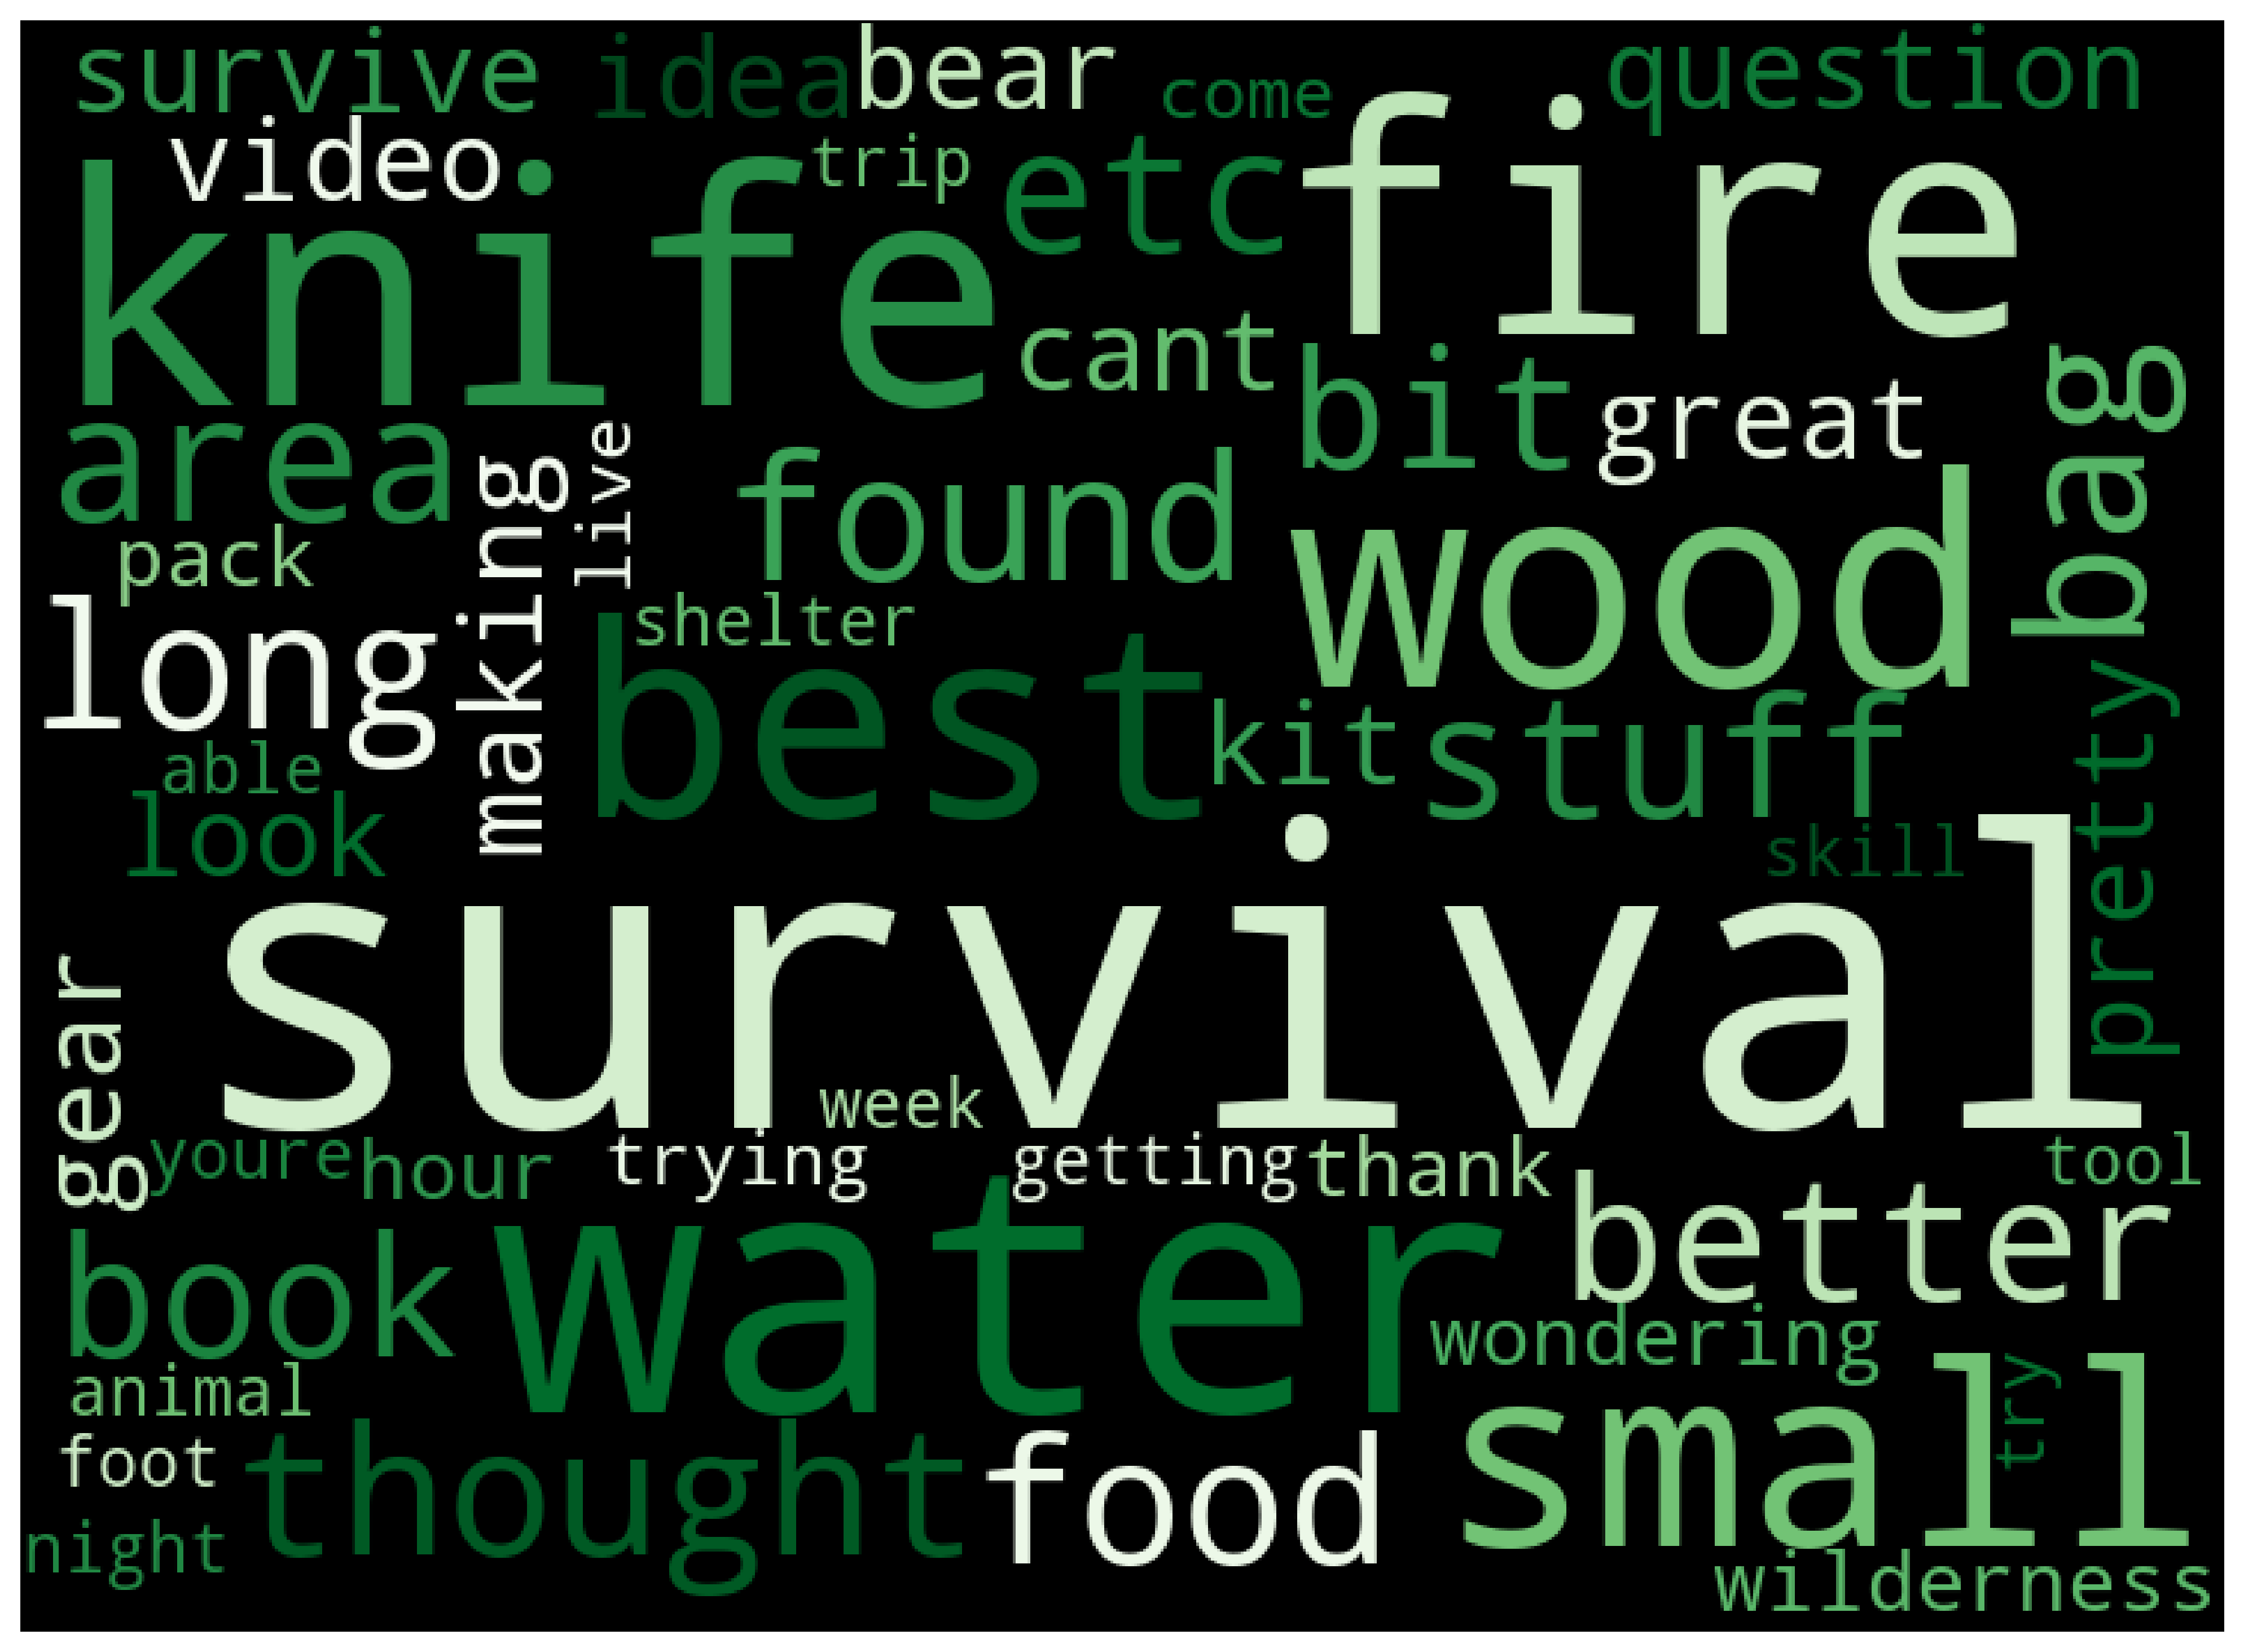

In [139]:
wc = WordCloud(max_words= 50,
                      width = 744, 
                      height = 544,
                      background_color ='black', 
                      contour_width=3, 
                      colormap= 'Greens',
                      min_font_size = 10).generate(' '.join(dfbush['title_body_stop2_str'])) 
                      
plt.figure(figsize = (14, 14)) 
plt.imshow(wc, interpolation="bilinear")
plt.imshow(wc) 
plt.axis("off");

## Exporting Preprocessed CSV for Modeling

In [ ]:
# dfwitch.to_csv('witch_processed.csv', index = False)
# dfbush.to_csv('bush_processed.csv', index = False)
df.to_csv('df_processed.csv', index = False)